# # 🎮 Twitch Game Data Analysis
# *by Munira*

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pandas.api.types import CategoricalDtype
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import STL


In [ ]:
!pip install numpy==1.23.5 pmdarima==2.0.4 pandas scikit-learn statsmodels prophet tensorflow orbit-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.9/446.9 kB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of xarray to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of xarray to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install tensorflow==2.12.0 statsmodels==0.14.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
!pip install orbit-ml

In [ ]:
import orbit
from orbit.models import DLT

print(orbit.__version__)

1.1.4.9


In [ ]:
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

In [ ]:
!pip install catboost
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from prophet import Prophet

# <h1 style='text-align:center ; color : yellow '>Загрузка и первый анализ *_* </h1>

In [ ]:
# Загрузка данных
data = pd.read_csv('clean_twitch_data.csv', encoding_errors='ignore')

In [ ]:
data.head()

Rank               Game  Hours_watched  Hours_streamed  Peak_viewers  \
0     1  League of Legends     94377226.0       1362044.0        530270   
1     2     Counter-Strike     47832863.0        830105.0        372654   
2     3             Dota 2     45185893.0        433397.0        315083   
3     4  Super Mario Maker      3057789.0         27512.0        232989   
4     9         Bloodborne      1300353.0         86384.0        199060   

   Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
0           2903     129172       127021          1833             69.29   
1           2197     120849        64378          1117             57.62   
2           1100      44074        60815           583            104.26   
3             77       2288         4115            37            111.14   
4            257      17349         1750           116             15.05   

   Month  Year  
0      1  2016  
1      1  2016  
2      1  2016  
3      1  2016  
4      1  2016

In [ ]:
print(data.shape)
print(data.columns)

(14049, 12)
Index(['Rank', 'Game', 'Hours_watched', 'Hours_streamed', 'Peak_viewers',
       'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels',
       'Avg_viewer_ratio', 'Month', 'Year'],
      dtype='object')


In [ ]:
data.dtypes

Rank                  int64
Game                 object
Hours_watched       float64
Hours_streamed      float64
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
Month                 int64
Year                  int64
dtype: object

In [ ]:
data.isnull().sum()

Rank                0
Game                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
Month               0
Year                0
dtype: int64

In [ ]:
import numpy as np

data['Game'].value_counts()

Game
Warframe                    112
Games + Demos               112
Music                       111
Minecraft                   111
League of Legends           110
                           ... 
FTL: Faster Than Light       43
Trash                        43
For Honor                    43
Super Mario Odyssey          43
Summoners War: Sky Arena     42
Name: count, Length: 200, dtype: int64

In [ ]:
data.sort_values(by=['Year', 'Month'], ascending=False)

Rank                      Game  Hours_watched  Hours_streamed  \
13941     1             Just Chatting    283317332.0       3254195.0   
13942     2            Special Events     11422836.0         65492.0   
13943     3         League of Legends     87555899.0       1295203.0   
13944     4                  VALORANT     60355046.0       2308154.0   
13945     5            Counter-Strike     80003124.0       1258583.0   
...     ...                       ...            ...             ...   
74      449            The Last of Us       298704.0         37203.0   
75      461  The Witcher 3: Wild Hunt       466001.0         55249.0   
76      463                  RimWorld        62125.0          2164.0   
77      477             Path of Exile      1701987.0         63038.0   
78      499                Brawlhalla       104251.0          9708.0   

       Peak_viewers  Peak_channels  Streamers  Avg_viewers  Avg_channels  \
13941        908265           7239     446483       381315          4379   
13942        852437           1785       8999        15373            88   
13943        707351           2747     119874       117841          1743   
13944        649053           4924     253922        81231          3106   
13945        630242           3847     158865       107675          1693   
...             ...            ...        ...          ...           ...   
74             6089            106       6900          402            50   
75             5797            147      10895          627            74   
76             5698             10        299           83             2   
77             5337            157       5160         2290            84   
78             4926             37       3080          140            13   

       Avg_viewer_ratio  Month  Year  
13941             87.06      3  2025  
13942            174.42      3  2025  
13943             67.60      3  2025  
13944             26.15      3  2025  
13945             63.57      3  2025  
...                 ...    ...   ...  
74                 8.03      1  2016  
75                 8.43      1  2016  
76                28.71      1  2016  
77                27.00      1  2016  
78                10.74      1  2016  

[14049 rows x 12 columns]

In [ ]:
data["Year"].value_counts()

Year
2021    1774
2020    1758
2019    1665
2022    1633
2023    1561
2018    1519
2024    1378
2017    1289
2016    1154
2025     318
Name: count, dtype: int64

In [ ]:
data[data['Game'] == 'Dota 2'].sort_values(by=['Year', 'Month'], ascending=False)

Rank    Game  Hours_watched  Hours_streamed  Peak_viewers  \
13948    12  Dota 2     44643262.0        721768.0        314552   
13824     3  Dota 2     46363824.0        696210.0        823762   
13738    19  Dota 2     39509765.0        800334.0        251940   
13626    17  Dota 2     31846644.0        748292.0        211958   
13507    17  Dota 2     41963589.0        793924.0        220528   
...     ...     ...            ...             ...           ...   
367       4  Dota 2     46816065.0        310231.0        321688   
268       3  Dota 2     42691310.0        319832.0        341103   
172       3  Dota 2     42565423.0        363215.0        339020   
80        2  Dota 2     41174229.0        384500.0        241065   
2         3  Dota 2     45185893.0        433397.0        315083   

       Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
13948           2041      55871        60085           971             61.85   
13824           2263      56716        69096          1037             66.59   
13738           2202      61583        53175          1077             49.37   
13626           2043      58086        42862          1007             42.56   
13507           2212      56842        58363          1104             52.86   
...              ...        ...          ...           ...               ...   
367              778      31165        63009           417            150.91   
268              815      30056        59375           444            133.48   
172              952      34612        57288           488            117.19   
80              1015      36912        59243           553            107.09   
2               1100      44074        60815           583            104.26   

       Month  Year  
13948      3  2025  
13824      2  2025  
13738      1  2025  
13626     12  2024  
13507     11  2024  
...      ...   ...  
367        5  2016  
268        4  2016  
172        3  2016  
80         2  2016  
2          1  2016  

[110 rows x 12 columns]

Columns ^_^

🔢 Rank
→ Позиция игры в рейтинге по просмотрам за месяц.

🎮 Game
→ Название игры или категории на Twitch.

📅 Month
→ Месяц, за который собраны данные.

📆 Year
→ Год, соответствующий месяцу.

👀 Метрики популярности:
⏳ Hours_watched
→ Общее количество часов, которые зрители провели, смотря стримы этой игры за месяц.


🎥 Hours_streamed
→ Общее количество часов, которые стримеры провели в эфире, стримя эту игру.

📈 Peak_viewers
→ Пиковое количество зрителей, смотрящих эту игру одновременно в один момент в течение месяца.

То есть: максимальный онлайн.

🔝 Peak_channels
→ Максимальное количество стримеров, одновременно стримящих эту игру в какой-то момент месяца.

👤 Активность стримеров:
👨‍💻 Streamers
→ Общее количество уникальных стримеров, которые хотя бы раз за месяц стримили эту игру.

📊 Avg_viewers
→ Среднее количество зрителей, которые смотрели эту игру в любой момент времени (усреднённое по всему месяцу).

🧑‍💻 Avg_channels
→ Среднее количество активных каналов (стримеров), стримящих эту игру в любой момент времени.

📊 Avg_viewer_ratio
→ Это:
📈 Avg_viewers ÷ 🧑‍💻 Avg_channels

То есть: среднее число зрителей на одного стримера.
Чем выше — тем популярнее игра у зрителей, не только у стримеров.

In [ ]:
data['Game'].nunique()

200

In [ ]:
data.describe().T

count          mean           std      min        25%  \
Rank              14049.0  1.908880e+02  1.456243e+02     1.00      56.00   
Hours_watched     14049.0  7.890366e+06  2.413883e+07  2529.00  352744.00   
Hours_streamed    14049.0  2.391694e+05  6.784756e+05     6.00   13695.00   
Peak_viewers      14049.0  7.976095e+04  1.867535e+05  2308.00   15050.00   
Peak_channels     14049.0  8.062839e+02  3.155955e+03     1.00      56.00   
Streamers         14049.0  2.966780e+04  8.563063e+04     0.00    2334.00   
Avg_viewers       14049.0  1.081886e+04  3.310847e+04     3.00     484.00   
Avg_channels      14049.0  3.274523e+02  9.299363e+02     0.00      18.00   
Avg_viewer_ratio  14049.0  6.001454e+01  1.640049e+02     2.33      16.62   
Month             14049.0  6.437255e+00  3.459299e+00     1.00       3.00   
Year              14049.0  2.020259e+03  2.520085e+00  2016.00    2018.00   

                         50%         75%           max  
Rank                  167.00      306.00  5.000000e+02  
Hours_watched     1167136.00  4226386.00  3.445520e+08  
Hours_streamed      42948.00   130622.00  1.024570e+07  
Peak_viewers        29125.00    63864.00  3.915488e+06  
Peak_channels         146.00      428.00  1.298600e+05  
Streamers            6022.00    15543.00  1.728322e+06  
Avg_viewers          1593.00     5776.00  4.792090e+05  
Avg_channels           58.00      179.00  1.378900e+04  
Avg_viewer_ratio       28.78       56.14  5.566880e+03  
Month                   6.00        9.00  1.200000e+01  
Year                 2020.00     2022.00  2.025000e+03

## Обработка данных

In [ ]:
df = data.copy()
df = df.dropna(subset=['Game'])
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

In [ ]:
duplicates = df.groupby(['ds', 'Game']).size().reset_index(name='count')
print("Дубликаты по 'ds' и 'Game' до агрегирования:")
print(duplicates[duplicates['count'] > 1])

Дубликаты по 'ds' и 'Game' до агрегирования:
              ds                                               Game  count
98    2016-02-01                                         Diablo III      2
188   2016-03-01                                         Diablo III      2
1247  2017-02-01                              ARK: Survival Evolved      2
1249  2017-02-01                           American Truck Simulator      2
1250  2017-02-01                                       Black Desert      2
1260  2017-02-01                                     DARK SOULS III      2
1261  2017-02-01                                         Dark Souls      2
1269  2017-02-01                                      Games + Demos      2
1270  2017-02-01                                        Garry's Mod      2
1271  2017-02-01                                  Hearts of Iron IV      2
1273  2017-02-01                   Keep Talking and Nobody Explodes      2
1274  2017-02-01  Lineage II: The Chaotic Throne - The 

In [ ]:
# Определяем столбцы для агрегирования
first_cols = ['Month', 'Year', 'Rank']  # Столбцы, для которых берём первое значение
mean_cols = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

agg_dict = {}
for col in df.columns:
    if col in first_cols:
        agg_dict[col] = 'first'
    elif col in mean_cols:
        agg_dict[col] = 'mean'

# Группируем данные по 'ds' и 'Game'
df = df.groupby(['ds', 'Game']).agg(agg_dict).reset_index()

# Определяем цели и игры
targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()

In [ ]:
duplicates = df.groupby(['ds', 'Game']).size().reset_index(name='count')
print("Дубликаты по 'ds' и 'Game' до агрегирования:")
print(duplicates[duplicates['count'] > 1])

Дубликаты по 'ds' и 'Game' до агрегирования:
Empty DataFrame
Columns: [ds, Game, count]
Index: []


In [ ]:
df.tail()

ds               Game  Rank  Hours_watched  Hours_streamed  \
13992 2025-03-01     World of Tanks    63      9232530.0        117978.0   
13993 2025-03-01  World of Warcraft    17     47612606.0        910414.0   
13994 2025-03-01  World of Warships   496      1300102.0         33592.0   
13995 2025-03-01          Wreckfest   435        82008.0          5693.0   
13996 2025-03-01         skribbl.io   185        92552.0          1752.0   

       Peak_viewers  Avg_viewers  Avg_viewer_ratio  Month  Year  
13992       66550.0      12426.0             78.26      3  2025  
13993      183171.0      64081.0             52.30      3  2025  
13994       13474.0       1749.0             38.70      3  2025  
13995       15538.0        110.0             14.41      3  2025  
13996       34142.0        124.0             52.83      3  2025

In [ ]:
top_games = df.groupby('Game')['Avg_viewers'].sum().sort_values(ascending=False).head(10)
top_games

Game
Just Chatting            21997024.0
League of Legends        16141501.0
Grand Theft Auto V       11035395.0
Fortnite                  8971275.0
Counter-Strike            7562609.0
VALORANT                  6823835.0
Dota 2                    6467066.0
Minecraft                 4588687.0
World of Warcraft         4316955.0
Call of Duty: Warzone     3883722.0
Name: Avg_viewers, dtype: float64

## <h1 style= 'text-align: center; color :purple' >Graphics @_@ </h1>

In [ ]:
top_games_list = top_games.index.to_list()
top_games_list

['Just Chatting',
 'League of Legends',
 'Grand Theft Auto V',
 'Fortnite',
 'Counter-Strike',
 'VALORANT',
 'Dota 2',
 'Minecraft',
 'World of Warcraft',
 'Call of Duty: Warzone']

In [ ]:
df_top = df[df['Game'].isin(top_games_list)]
df_top.head(10)

ds                Game  Rank  Hours_watched  Hours_streamed  \
9   2016-01-01      Counter-Strike     2     47832863.0        830105.0   
15  2016-01-01              Dota 2     3     45185893.0        433397.0   
21  2016-01-01  Grand Theft Auto V   189      4014296.0        407172.0   
25  2016-01-01   League of Legends     1     94377226.0       1362044.0   
31  2016-01-01           Minecraft   151     10231056.0        490002.0   
75  2016-01-01   World of Warcraft   155      8771452.0        342978.0   
94  2016-02-01      Counter-Strike     3     44933218.0        754901.0   
100 2016-02-01              Dota 2     2     41174229.0        384500.0   
108 2016-02-01  Grand Theft Auto V    26      3216017.0        342897.0   
112 2016-02-01   League of Legends     1     93154772.0       1266715.0   

     Peak_viewers  Avg_viewers  Avg_viewer_ratio  Month  Year  
9        372654.0      64378.0             57.62      1  2016  
15       315083.0      60815.0            104.26      1  2016  
21        32724.0       5402.0              9.86      1  2016  
25       530270.0     127021.0             69.29      1  2016  
31        64432.0      13769.0             20.88      1  2016  
75        46130.0      11805.0             25.57      1  2016  
94       235027.0      64652.0             59.52      2  2016  
100      241065.0      59243.0            107.09      2  2016  
108       40319.0       4627.0              9.38      2  2016  
112      475784.0     134035.0             73.54      2  2016

In [ ]:
font_path = 'Orbitron-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)

fig = px.line(df_top, x='ds', y='Avg_viewers', color='Game', title='Avg_viewers for top 10 games')
fig.update_layout(
    plot_bgcolor='#1a0033',
    paper_bgcolor='#0d001a',
    font=dict(size=14, color='#ffffff', family='Orbitron'),
    title=dict(font=dict(color='#ff00ff')),
    xaxis=dict(title='Date', tickfont=dict(color='#00ffff'), gridcolor='#00ffff'),
    yaxis=dict(title='Avg_viewers', tickfont=dict(color='#00ffff'), gridcolor='#00ffff'),
    legend=dict(bgcolor='#0d001a', bordercolor='#ff00ff', font=dict(color='#ffffff', family='Orbitron')),
)
fig.show()

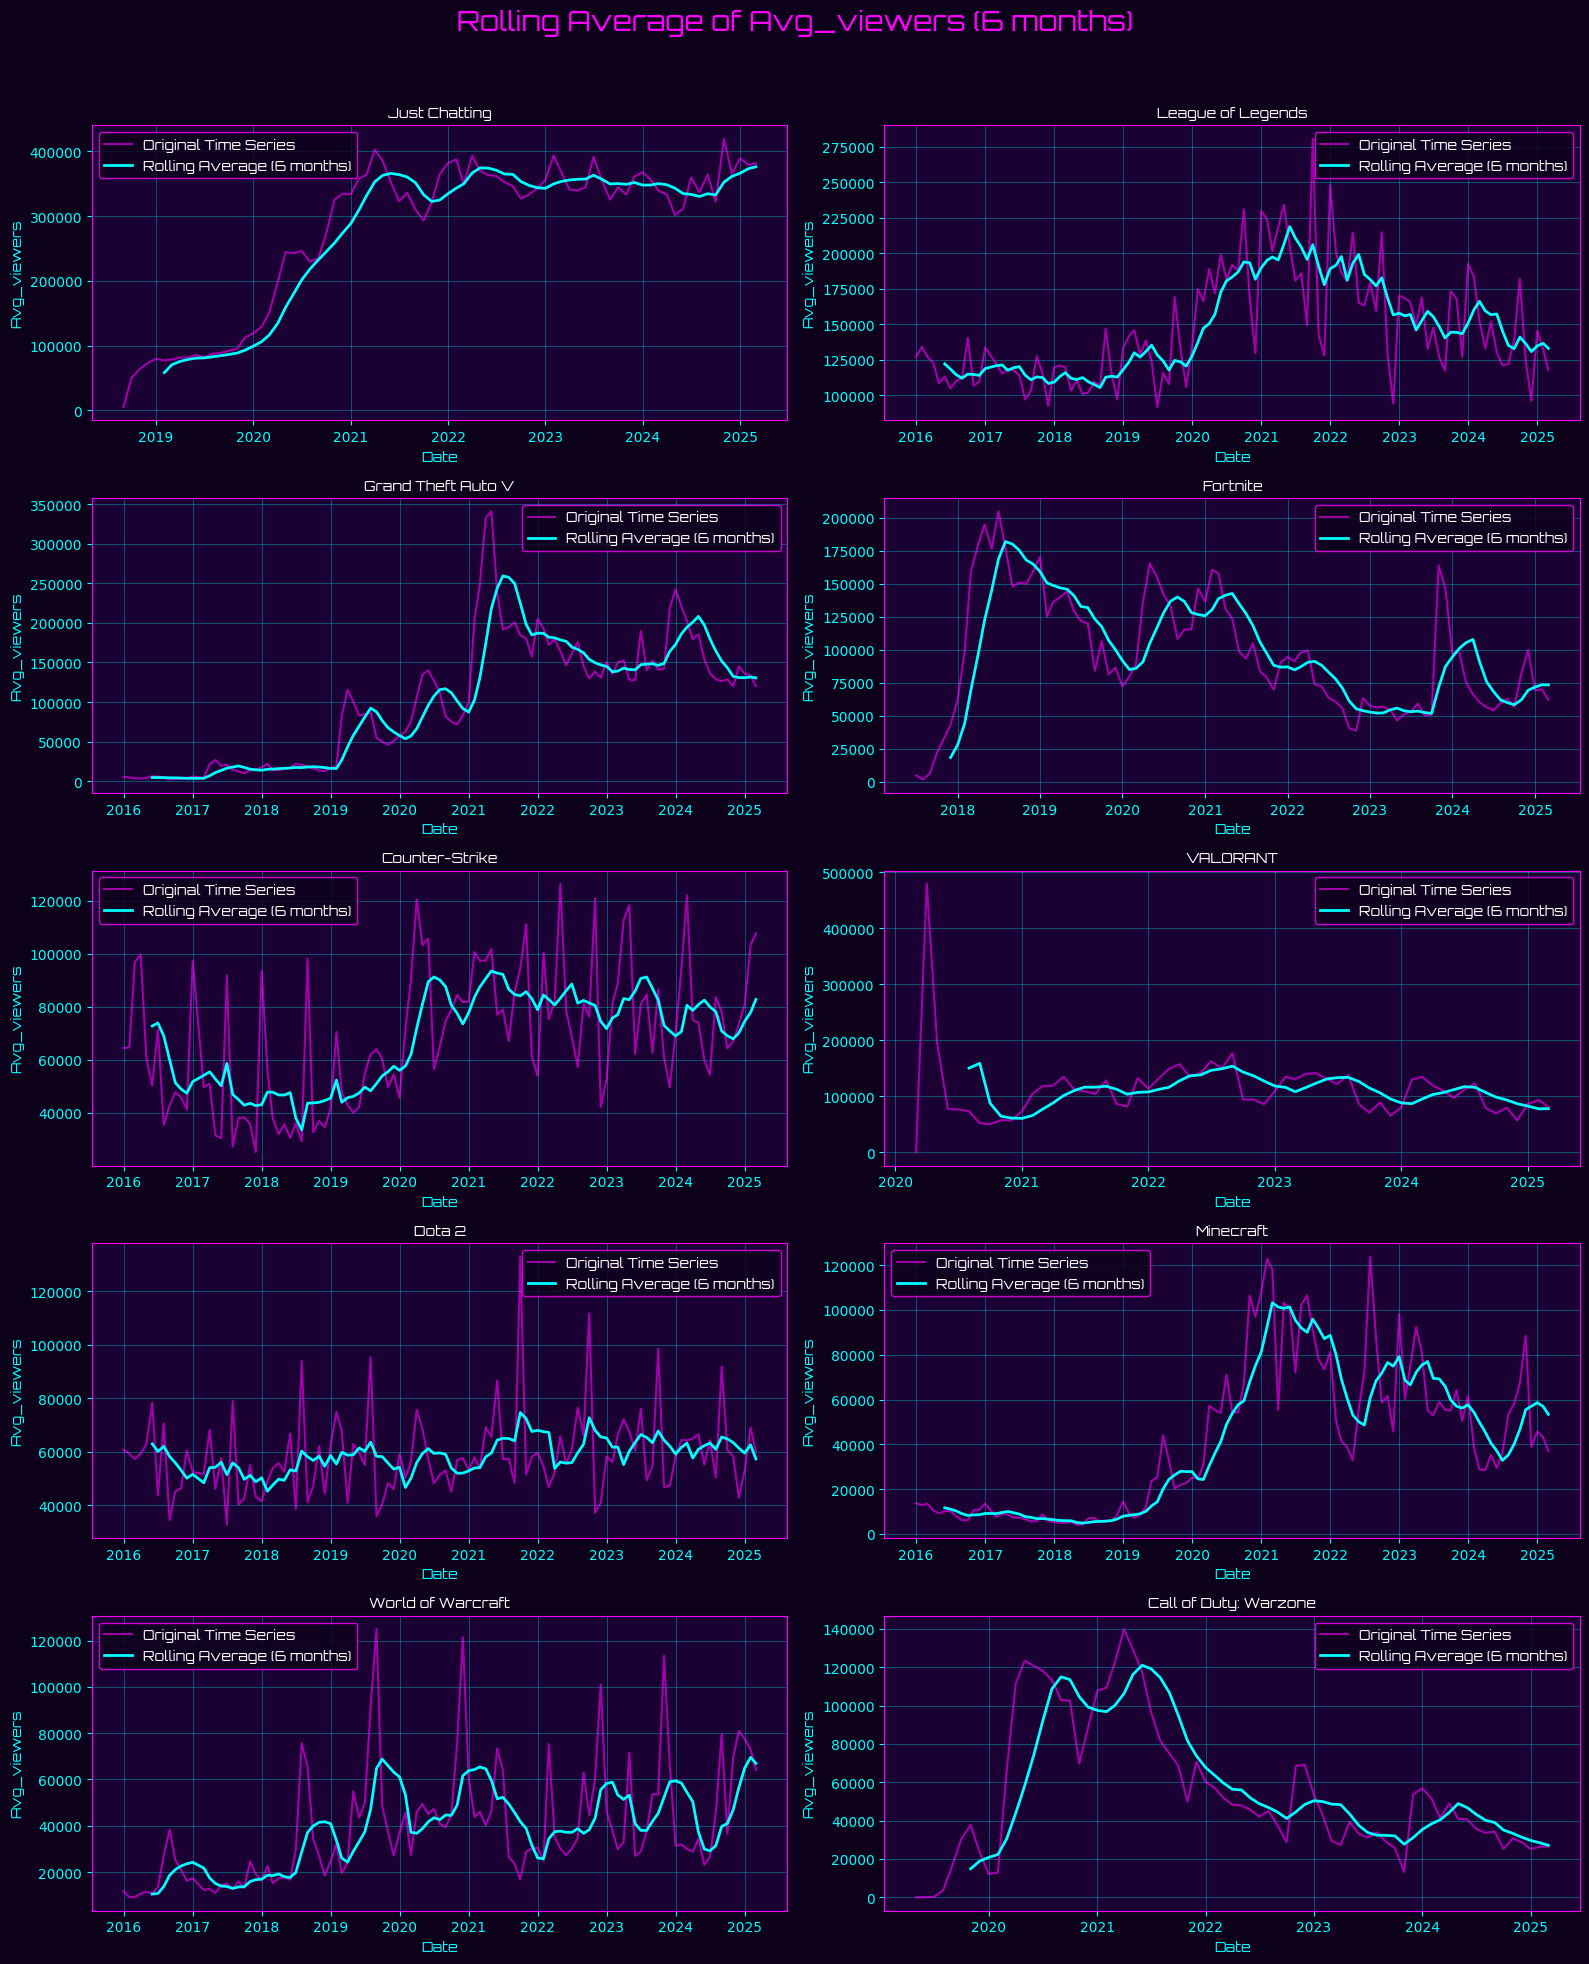

In [ ]:
#Скользящее среднее (окно = 6 месяцев для полугодового тренда:)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20), facecolor='#0d001a')  # 5x2 сетка для 10 игр
fig.suptitle('Rolling Average of Avg_viewers (6 months)', fontsize=20, color='#ff00ff', fontproperties=font_prop)

cyber_colors = {'original': '#ff00ff', 'rolling': '#00ffff'}
for i, game in enumerate(top_games_list):

    game_data = df_top[df_top['Game'] == game].sort_values('ds').set_index('ds')

    rolling_avg = game_data['Avg_viewers'].rolling(window=6).mean()

    ax = axes[i // 2, i % 2]
    ax.plot(game_data.index, game_data['Avg_viewers'], label='Original Time Series', color=cyber_colors['original'],
            alpha=0.6)
    ax.plot(game_data.index, rolling_avg, label='Rolling Average (6 months)', color=cyber_colors['rolling'],
            linewidth=2)

    ax.set_title(game, fontsize=12, color='#ffffff', fontproperties=font_prop)
    ax.set_xlabel('Date', fontsize=10, color='#00ffff', fontproperties=font_prop)
    ax.set_ylabel('Avg_viewers', fontsize=10, color='#00ffff', fontproperties=font_prop)
    ax.legend(facecolor='#0d001a', edgecolor='#ff00ff', labelcolor='#ffffff', prop=font_prop)
    ax.grid(True, color='#00ffff', alpha=0.3)
    ax.set_facecolor('#1a0033')
    ax.tick_params(colors='#00ffff')
    for spine in ax.spines.values():
        spine.set_color('#ff00ff')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
dflol = df[df["Game"] == "League of Legends"]
dfdota2 = df[df["Game"] == "Dota 2"]
dfcsgo = df[df["Game"] == "Counter-Strike: Global Offensive"]

In [ ]:
dflol.shape

(110, 10)

In [ ]:
from matplotlib import font_manager

font_path = "Orbitron-Regular.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Orbitron'

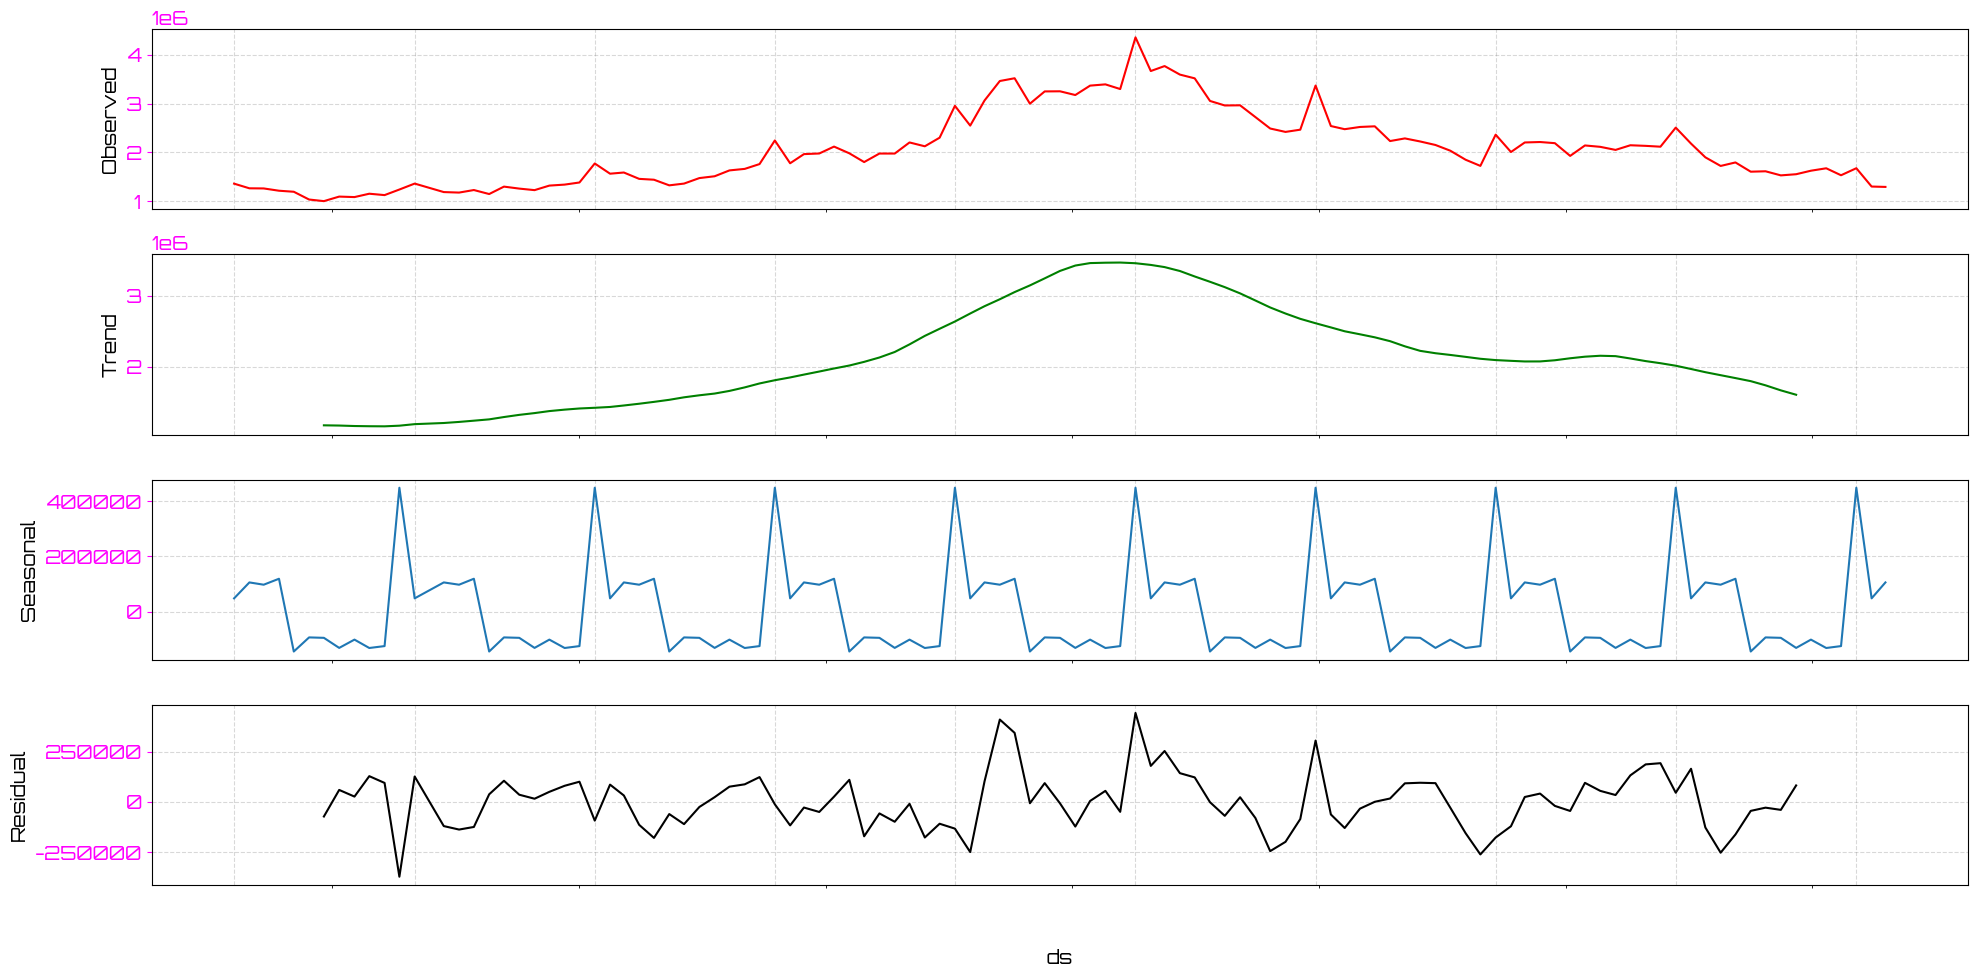

In [ ]:
game_example = 'League of Legends'
game_data = df_top[df_top['Game'] == game_example].set_index('ds')

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [20, 10]

res = sm.tsa.seasonal_decompose(game_data['Hours_streamed'], model='additive', period=12)
fig, axes = plt.subplots(4, 1, sharex=True)

res.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed', color='#000000')
axes[0].tick_params(axis='y', colors='#FF00FF')
res.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend', color='#000000')
axes[1].tick_params(axis='y', colors='#FF00FF')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal', color='#000000')
axes[2].tick_params(axis='y', colors='#FF00FF')
res.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual', color='#000000')
axes[3].tick_params(axis='y', colors='#FF00FF')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.tick_params(axis='x', colors='white')

plt.tight_layout()
plt.show()

['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

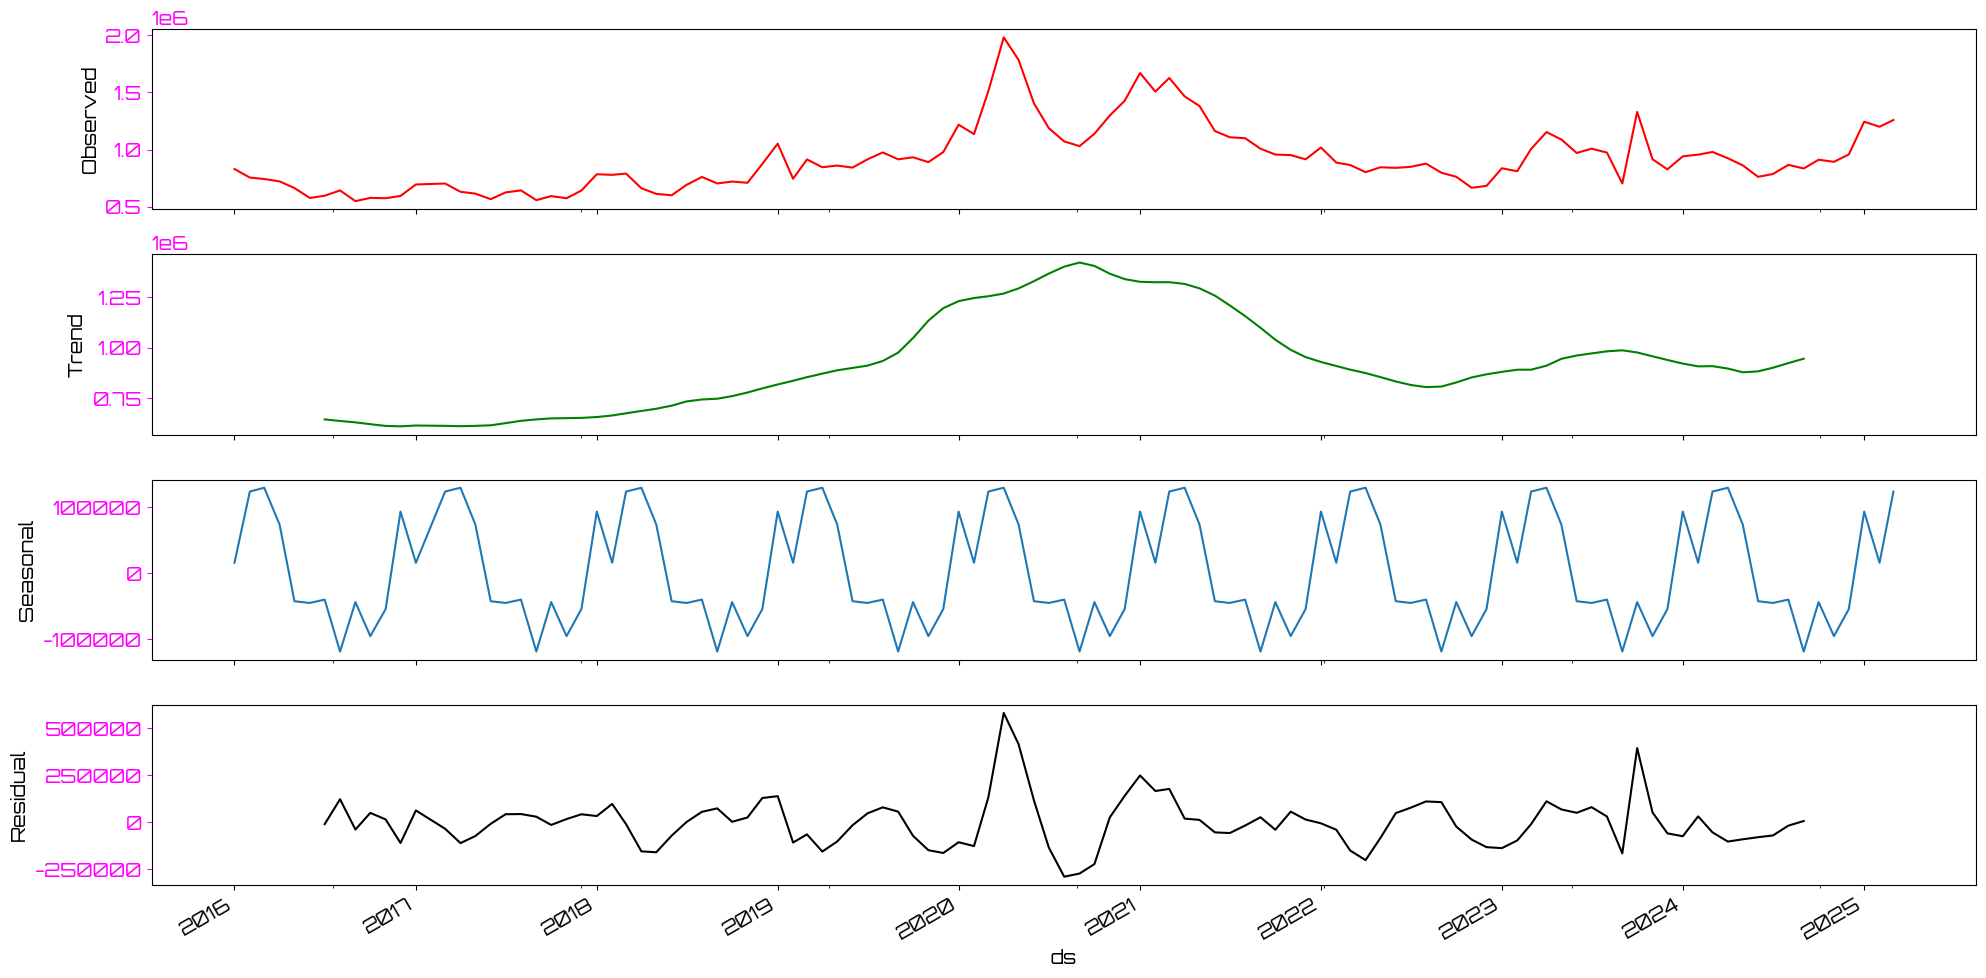

In [ ]:
game_example = 'Counter-Strike'
game_data = df_top[df_top['Game'] == game_example].set_index('ds')

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [20, 10]

res1 = sm.tsa.seasonal_decompose(game_data['Hours_streamed'], model='additive', period=12)
fig1, axes1 = plt.subplots(4, 1, sharex=True)

res1.observed.plot(ax=axes1[0], legend=False, color='r')
axes1[0].set_ylabel('Observed', color='#000000')
axes1[0].tick_params(axis='y', colors='#FF00FF')
res1.trend.plot(ax=axes1[1], legend=False, color='g')
axes1[1].set_ylabel('Trend', color='#000000')
axes1[1].tick_params(axis='y', colors='#FF00FF')
res1.seasonal.plot(ax=axes1[2], legend=False)
axes1[2].set_ylabel('Seasonal', color='#000000')
axes1[2].tick_params(axis='y', colors='#FF00FF')
res1.resid.plot(ax=axes1[3], legend=False, color='k')
axes1[3].set_ylabel('Residual', color='#000000')
axes1[3].tick_params(axis='y', colors='#FF00FF')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.tick_params(axis='x', colors='white')

plt.tight_layout()
plt.show()

In [ ]:
game_example = 'League of Legends'
game_data = df_top[df_top['Game'] == game_example].set_index('ds')
#['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

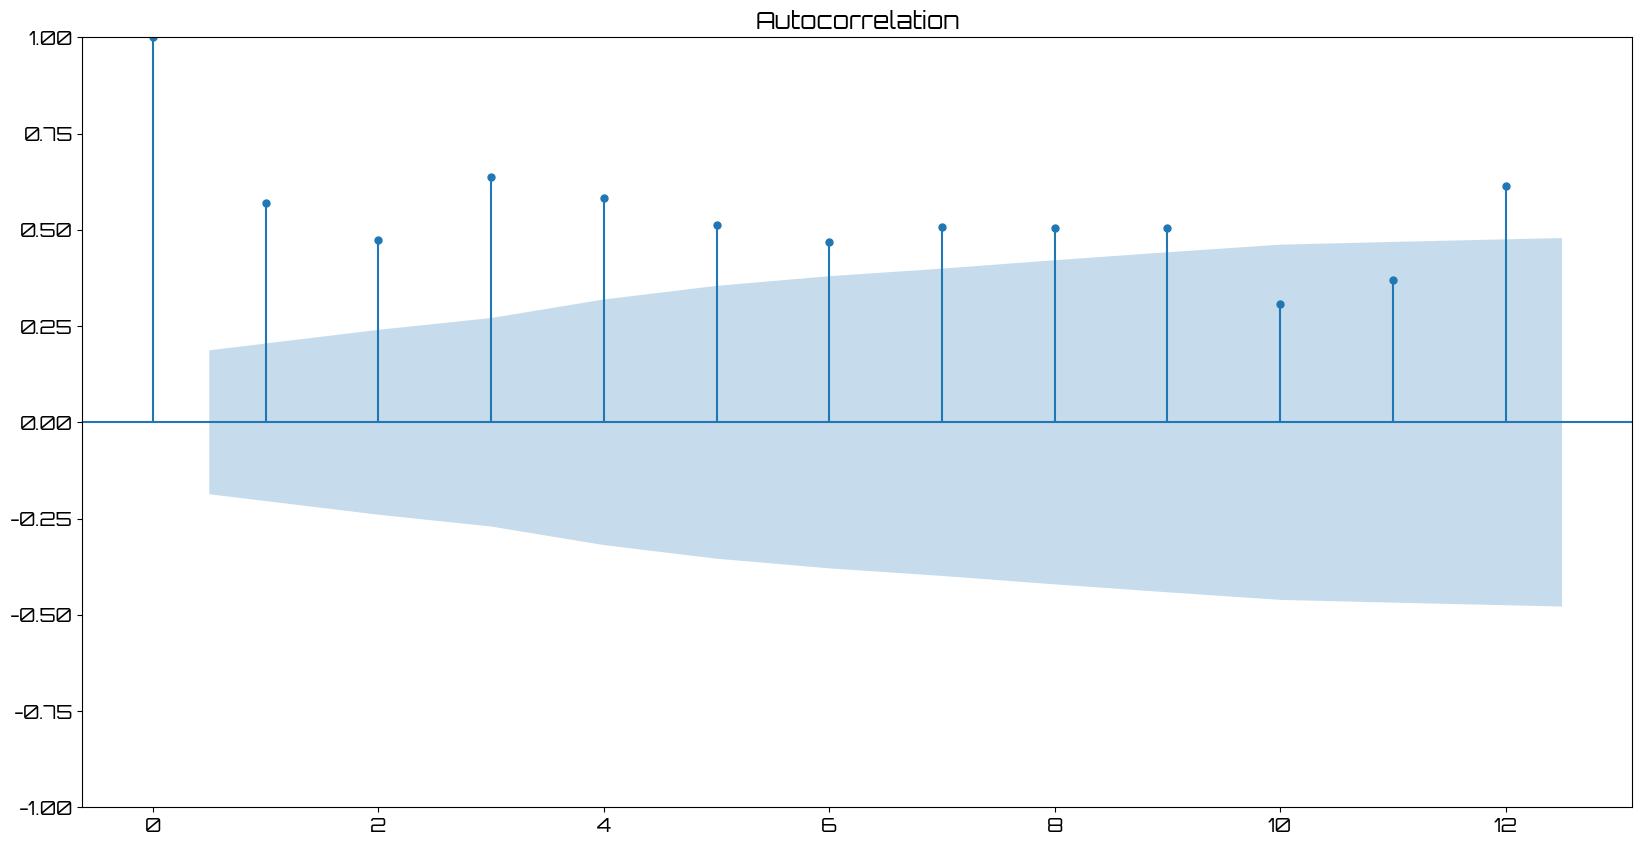

<Figure size 1400x800 with 0 Axes>

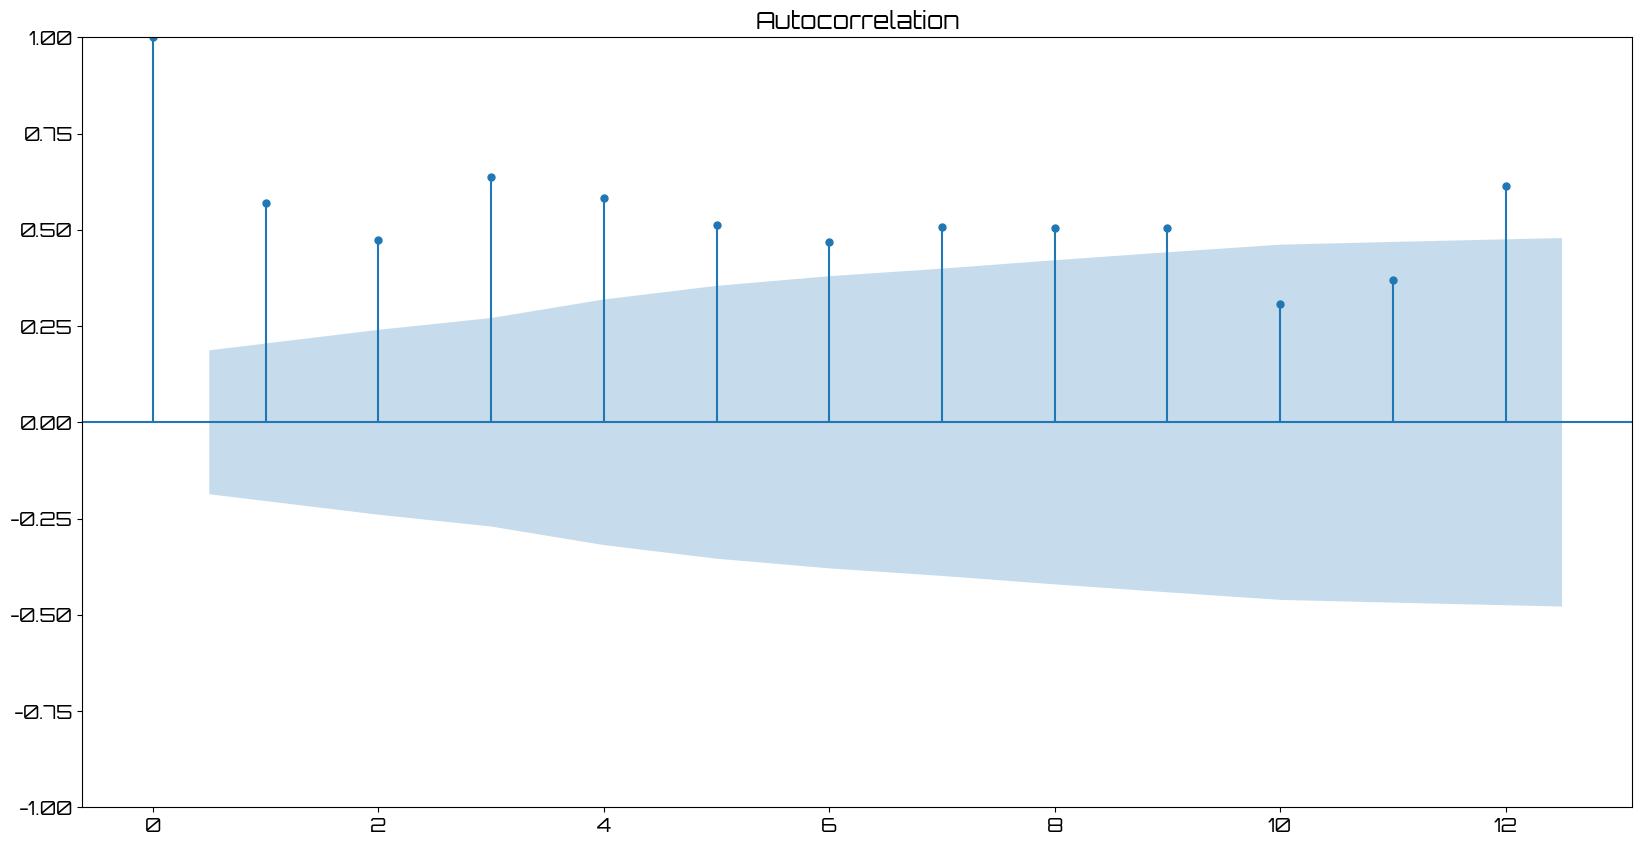

In [ ]:
plt.figure(figsize=(14, 8))
plt.rcParams['font.family'] = 'Orbitron'
plot_acf(game_data['Avg_viewers'].values, lags=12)

In [ ]:
data.drop('Game', axis=1).corr()

Rank  Hours_watched  Hours_streamed  Peak_viewers  \
Rank              1.000000      -0.337032       -0.329408     -0.397194   
Hours_watched    -0.337032       1.000000        0.742290      0.699614   
Hours_streamed   -0.329408       0.742290        1.000000      0.566714   
Peak_viewers     -0.397194       0.699614        0.566714      1.000000   
Peak_channels    -0.242483       0.491308        0.777976      0.513735   
Streamers        -0.314574       0.688933        0.931103      0.542694   
Avg_viewers      -0.337064       0.999557        0.741814      0.699540   
Avg_channels     -0.329695       0.742335        0.999565      0.567003   
Avg_viewer_ratio -0.034374      -0.001331       -0.058089      0.038854   
Month            -0.033331      -0.011941       -0.011712     -0.003738   
Year              0.001701       0.109941        0.120286      0.139091   

                  Peak_channels  Streamers  Avg_viewers  Avg_channels  \
Rank                  -0.242483  -0.314574    -0.337064     -0.329695   
Hours_watched          0.491308   0.688933     0.999557      0.742335   
Hours_streamed         0.777976   0.931103     0.741814      0.999565   
Peak_viewers           0.513735   0.542694     0.699540      0.567003   
Peak_channels          1.000000   0.722504     0.491601      0.778384   
Streamers              0.722504   1.000000     0.688857      0.931093   
Avg_viewers            0.491601   0.688857     1.000000      0.742541   
Avg_channels           0.778384   0.931093     0.742541      1.000000   
Avg_viewer_ratio      -0.040663  -0.060043    -0.001385     -0.058078   
Month                  0.006937  -0.018398    -0.014145     -0.014117   
Year                   0.082486   0.140136     0.110343      0.120697   

                  Avg_viewer_ratio     Month      Year  
Rank                     -0.034374 -0.033331  0.001701  
Hours_watched            -0.001331 -0.011941  0.109941  
Hours_streamed           -0.058089 -0.011712  0.120286  
Peak_viewers              0.038854 -0.003738  0.139091  
Peak_channels            -0.040663  0.006937  0.082486  
Streamers                -0.060043 -0.018398  0.140136  
Avg_viewers              -0.001385 -0.014145  0.110343  
Avg_channels             -0.058078 -0.014117  0.120697  
Avg_viewer_ratio          1.000000 -0.000013 -0.020768  
Month                    -0.000013  1.000000 -0.084343  
Year                     -0.020768 -0.084343  1.000000

In [ ]:
game_example = 'Counter-Strike'
game_data = df_top[df_top['Game'] == game_example].set_index('ds')
#['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

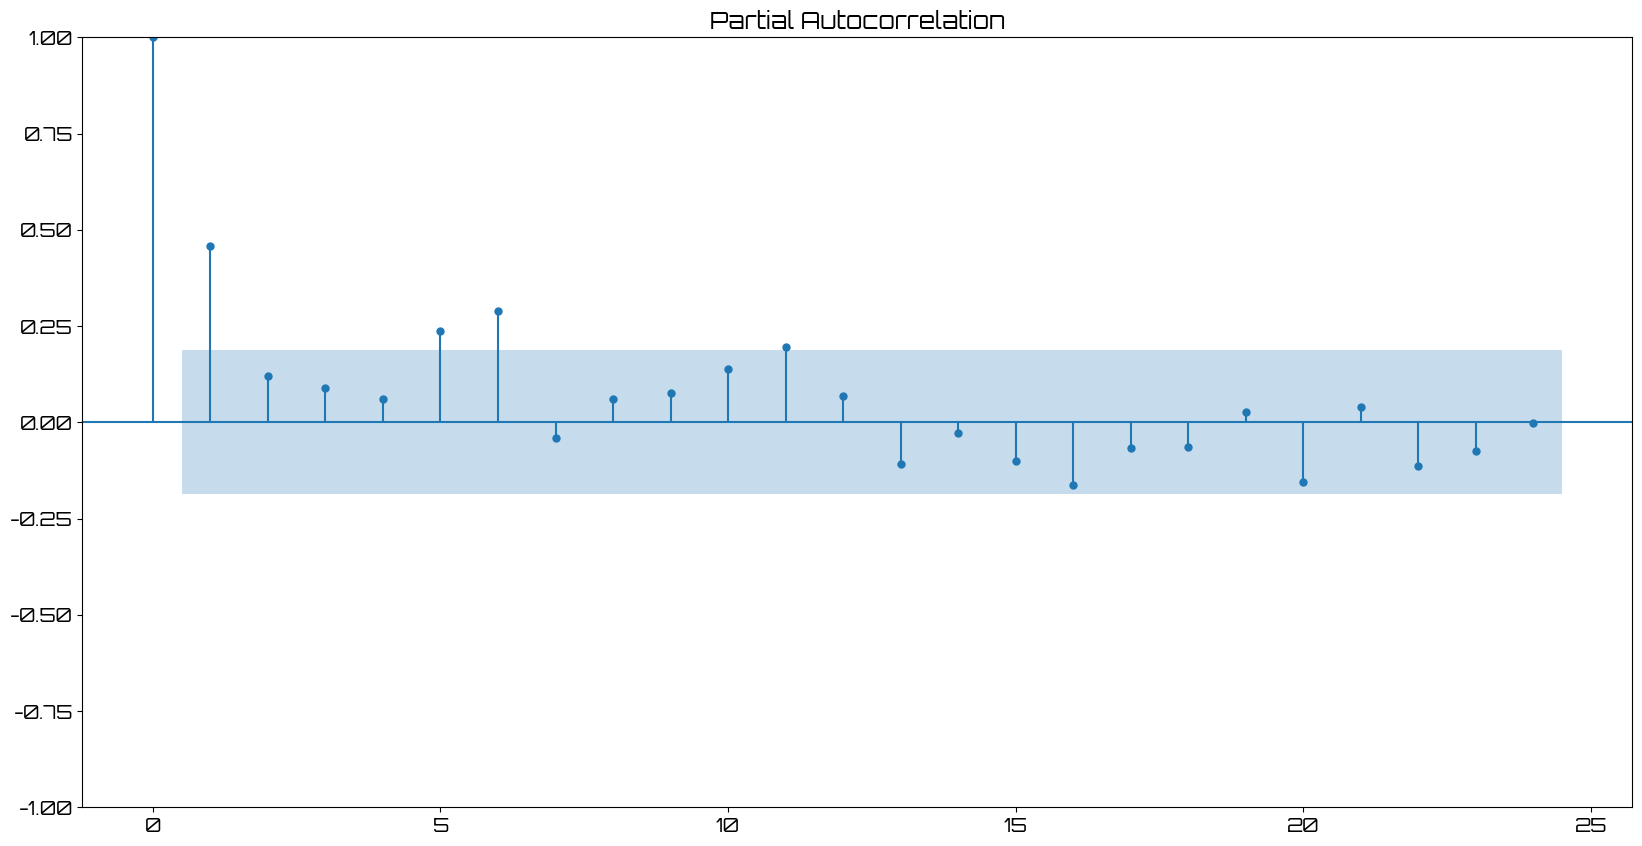

<Figure size 1400x800 with 0 Axes>

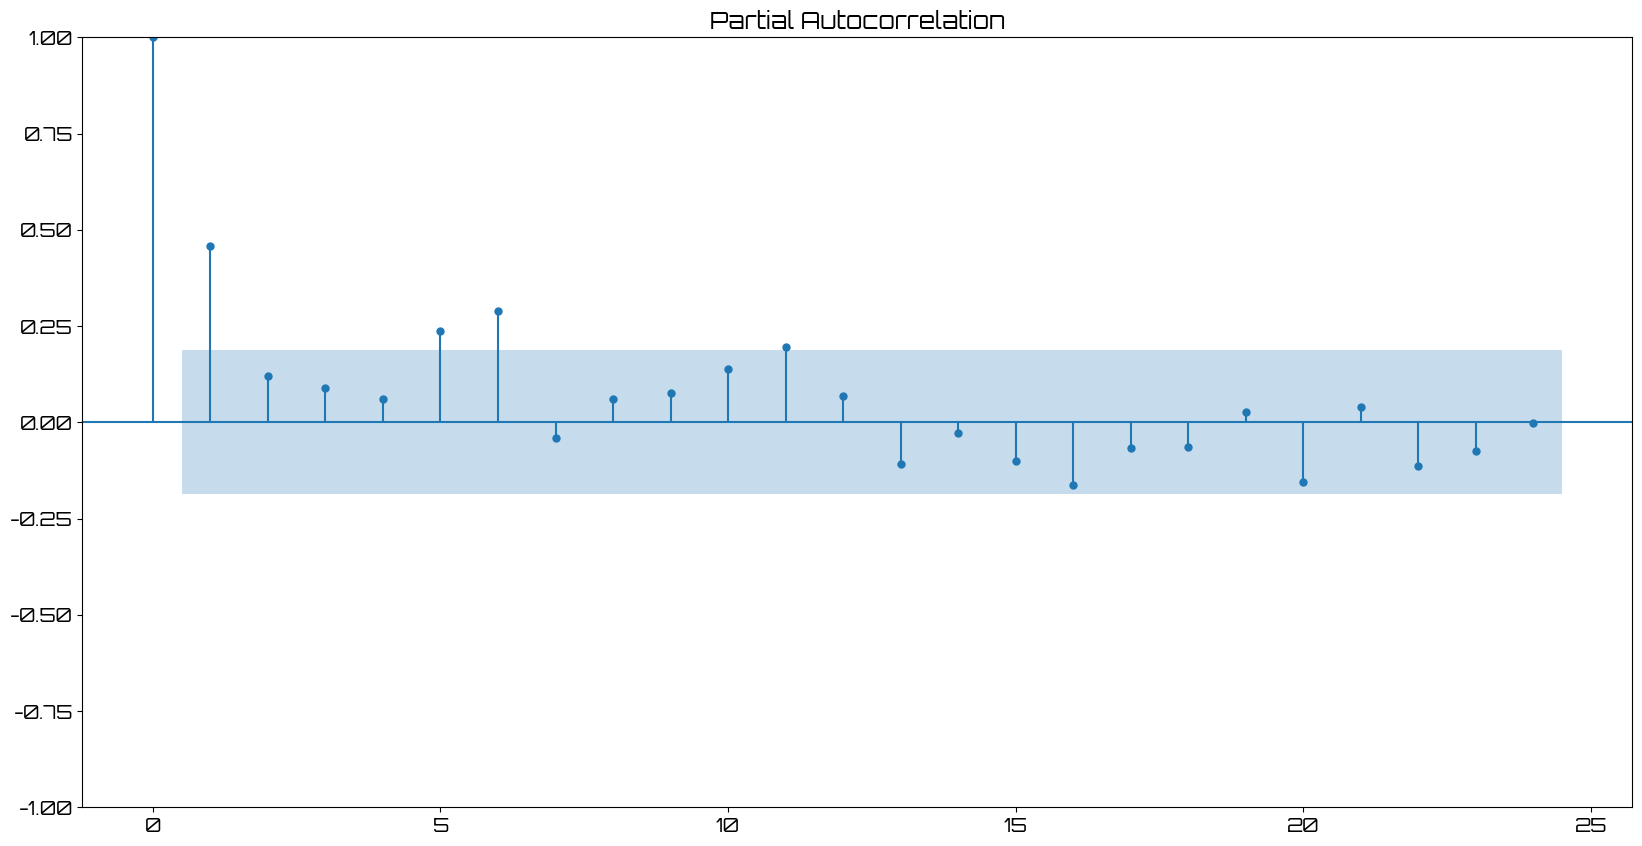

In [ ]:
plt.figure(figsize=(14, 8))
plt.rcParams['font.family'] = 'Orbitron'
plot_pacf(game_data['Avg_viewers'].values, lags=24)

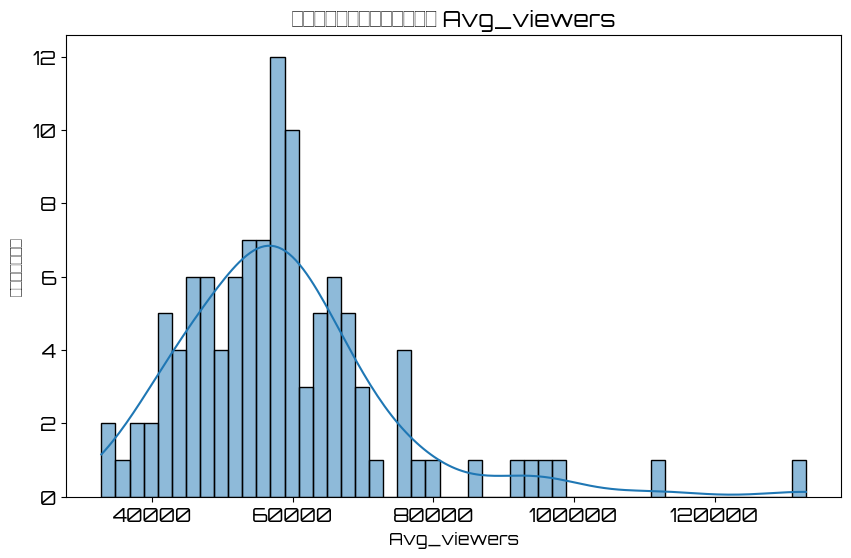

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dfdota2['Avg_viewers'], bins=50, kde=True)
plt.title("Распределение Avg_viewers", fontsize=16)
plt.xlabel("Avg_viewers", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.show()

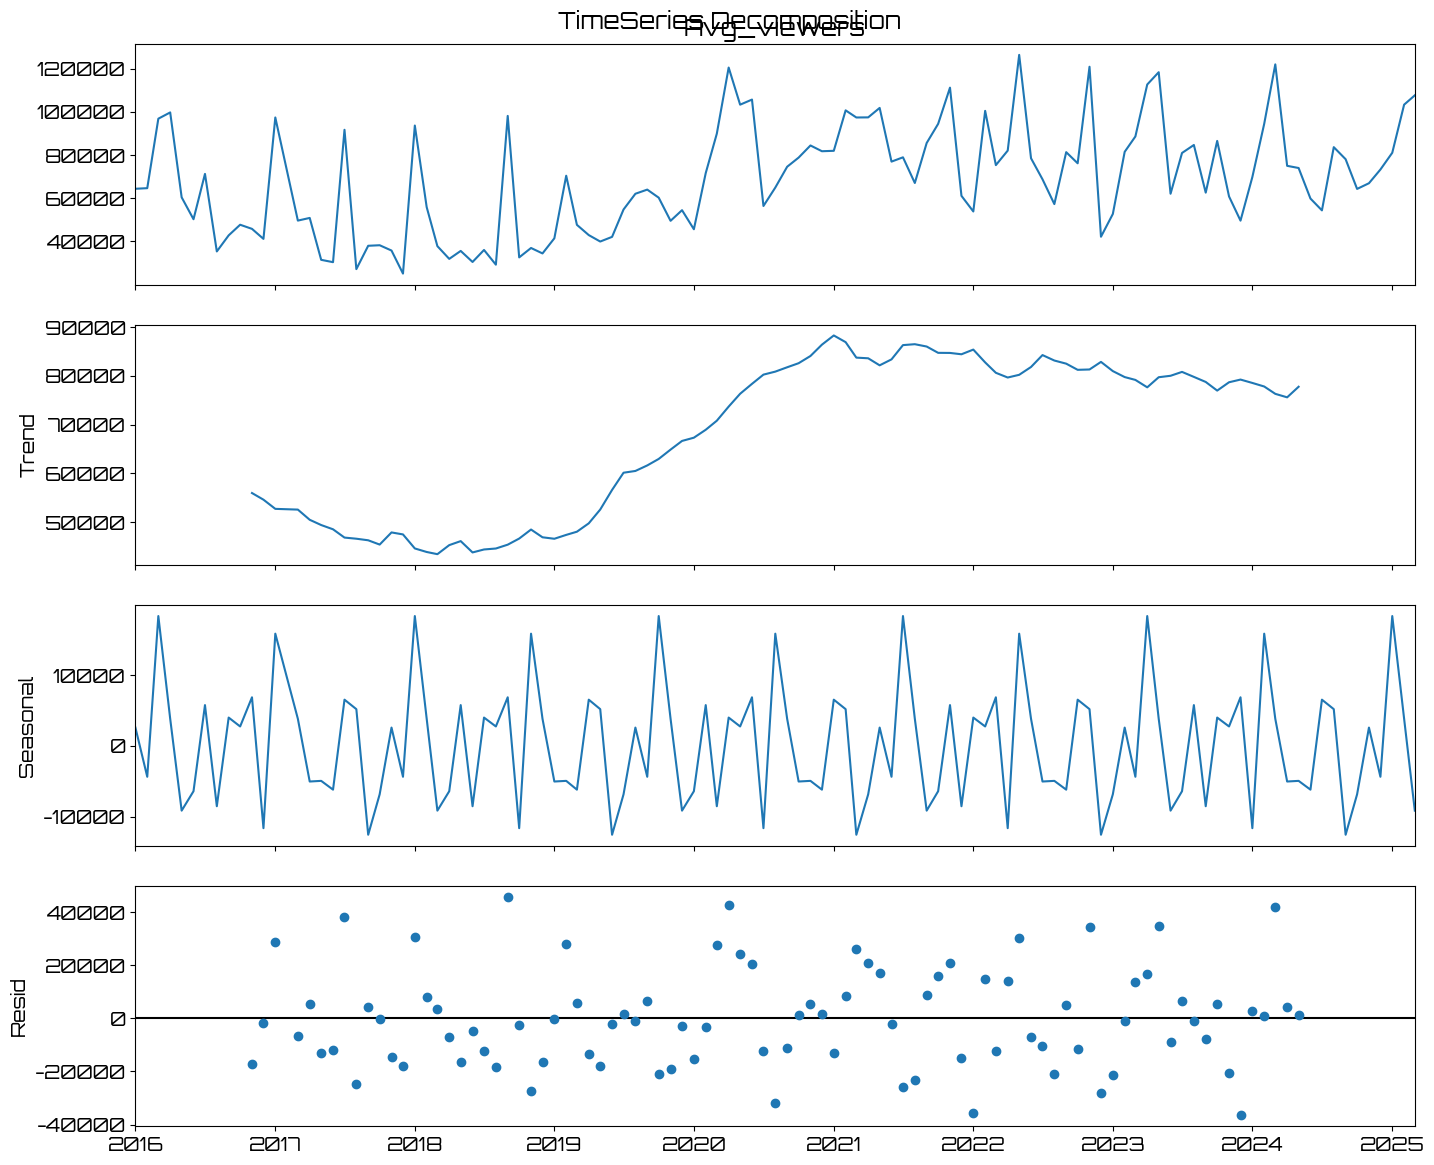

In [ ]:
decompos = seasonal_decompose(game_data['Avg_viewers'], model='additive', period=21)
fig = decompos.plot()
fig.set_size_inches(14, 12)
plt.suptitle('TimeSeries Decomposition ')
plt.show()


def adf_test(series, title):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'\n{title}:')
    print(f'ADF Statistic: {result[0]:4f}')
    print(f'p-value:{result[1]:4f}')
    print(f'Стационарен' if result[1] < 0.05 else 'Нестационарен')

In [ ]:
adf_test(dfdota2['Avg_viewers'], 'Исходный ряд(Price)')


Исходный ряд(Price):
ADF Statistic: -11.796391
p-value:0.000000
Стационарен


In [ ]:
adf_test(dflol['Avg_viewers'], 'Исходный ряд(Avg_viewers)')


Исходный ряд(Avg_viewers):
ADF Statistic: -1.639549
p-value:0.462497
Нестационарен


In [ ]:
adf_test(dflol['Avg_viewers'].diff(12).diff().dropna(), 'Исходный ряд(Avg_viewers)')  #.diff().dropna()


Исходный ряд(Avg_viewers):
ADF Statistic: -10.372492
p-value:0.000000
Стационарен


In [ ]:
dflol['Avg_viewers'].diff().diff().dropna().shape

(108,)

# <h1 style = 'text-align:center; color: green'>Разделение данных на train & test </h1>

In [ ]:
dflol.set_index('ds', inplace=True)

In [ ]:
X = dflol.drop(columns=['Avg_viewers', 'Game'])
y = dflol['Avg_viewers']

In [ ]:
X.dtypes

ds                  datetime64[ns]
Rank                         int64
Hours_watched              float64
Hours_streamed             float64
Peak_viewers               float64
Avg_viewer_ratio           float64
Month                        int64
Year                         int64
dtype: object

In [ ]:
def timeseries_train_test_split(X, y, test_size=0.1):
    train_size = int(len(X) * (1 - test_size))
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.1)

# <h1 style = 'text-align:center; color: white'>Модели регрессии ^_^ </h1>

In [ ]:
def split_train_pred(df, model, test_size=0.005):
    if 'ds' in df.columns:
        df.set_index('ds', inplace=True)
    targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
    game_list = df['Game'].unique()
    pred_dfs = []

    for game in game_list:
        df_game = df[df['Game'] == game]
        if len(df_game) < 2:
          continue

        train_size = int(len(df_game) * (1 - test_size))
        df_train = df_game.iloc[:train_size]
        df_test = df_game.iloc[train_size:]

        pred_df_game = df_test[['Game'] + targets].rename(columns={target: f'{target}(y_test)' for target in targets})

        for target in targets:
            X_train = df_train.drop(columns=[target, 'Game'])
            y_train = df_train[target]
            X_test = df_test.drop(columns=[target, 'Game'])
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            pred_df_game[f'{target}(y_pred)'] = y_pred

        pred_dfs.append(pred_df_game)
    final_pred_df = pd.concat(pred_dfs, ignore_index=True)
    return final_pred_df

In [ ]:
lin_reg = LinearRegression()
lin_pred = split_train_pred(df,lin_reg,  test_size=0.005)

In [ ]:
lin_pred

Game  Avg_viewers(y_test)  Peak_viewers(y_test)  \
0                     60 Seconds!                 59.0               17353.0   
1           ARK: Survival Evolved                680.0               37763.0   
2                Alien: Isolation                471.0               17934.0   
3        American Truck Simulator                556.0               17686.0   
4                          Arma 3                237.0               13523.0   
..                            ...                  ...                   ...   
195             I'm Only Sleeping               7627.0               56735.0   
196                  Gartic Phone                499.0               24466.0   
197                    ELDEN RING              10913.0               52627.0   
198           Mario Kart 8 Deluxe                908.0               23903.0   
199  Pools, Hot Tubs, and Beaches               2531.0               59160.0   

     Avg_viewer_ratio(y_test)  Hours_watched(y_test)  Hours_streamed(y_test)  \
0                      106.31                44119.0                   415.0   
1                        3.91               489612.0                125296.0   
2                       25.55               350632.0                 13725.0   
3                       11.46               413711.0                 36105.0   
4                        6.61               176623.0                 26737.0   
..                        ...                    ...                     ...   
195                     40.85              5667485.0                138727.0   
196                     18.94               370990.0                 19583.0   
197                     21.26              8108687.0                381374.0   
198                     22.59               674657.0                 29867.0   
199                     66.91              1881028.0                 28112.0   

     Avg_viewers(y_pred)  Peak_viewers(y_pred)  Avg_viewer_ratio(y_pred)  \
0              65.275240          31984.013198                128.349945   
1             668.765055          41323.611948                  7.034679   
2             486.681642          32196.353793                 26.889037   
3             575.680919          29376.345902                 19.615481   
4             223.133091          20914.097079                 10.645379   
..                   ...                   ...                       ...   
195          8091.119695          98628.694154                 45.505683   
196           507.618015          38075.414673                 18.239671   
197         11157.733732          45762.681282               -215.691059   
198           943.574100          37359.654472                 18.640525   
199          2688.538817          61399.705463                 66.329202   

     Hours_watched(y_pred)  Hours_streamed(y_pred)  
0             3.922190e+04              534.165617  
1             4.803943e+05           180916.832103  
2             3.389752e+05            18089.484256  
3             3.991323e+05            41728.205839  
4             1.535772e+05            38393.643785  
..                     ...                     ...  
195           5.322098e+06           182213.601114  
196           3.675101e+05            18944.046015  
197           7.914528e+06           421384.796862  
198           6.461864e+05            31543.016530  
199           1.780717e+06            28286.693857  

[200 rows x 11 columns]

In [ ]:
def evaluate_model1(df_pred):
    targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
    metrics_list = []

    for target in targets:
        y_pred_col = f'{target}(y_pred)'
        y_test_col = f'{target}(y_test)'

        y_pred = df_pred[y_pred_col]
        y_test = df_pred[y_test_col]

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        metrics_list.append({
            'Target': target,
            'Test RMSE': rmse,
            'Test MAE': mae,
            'Test R^2': r2
        })

    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

In [ ]:
evaluate_model1(lin_pred)

Target      Test RMSE       Test MAE  Test R^2
0       Avg_viewers    1049.542687     276.566951  0.998889
1      Peak_viewers   59024.001960   23893.436577  0.783598
2  Avg_viewer_ratio     279.417156      43.667456  0.515857
3     Hours_watched  605468.331479  179426.932498  0.999330
4    Hours_streamed   49987.244391   21352.875514  0.989527

In [ ]:
catboost = CatBoostRegressor(
    iterations=500,
    early_stopping_rounds=50,
    verbose=100,
    random_state=42
)
cat_pred = split_train_pred(df,catboost, test_size=0.01)

Выходные данные были обрезаны до нескольких последних строк (5000).
400:	learn: 10.1772499	total: 269ms	remaining: 66.3ms
499:	learn: 6.4243212	total: 328ms	remaining: 0us
Learning rate set to 0.049835
0:	learn: 36654.0336699	total: 1.18ms	remaining: 589ms
100:	learn: 12340.5344476	total: 93ms	remaining: 367ms
200:	learn: 6058.0087534	total: 155ms	remaining: 230ms
300:	learn: 3467.3900306	total: 219ms	remaining: 145ms
400:	learn: 1961.3019374	total: 290ms	remaining: 71.6ms
499:	learn: 1237.5614823	total: 354ms	remaining: 0us
Learning rate set to 0.049835
0:	learn: 39.9794536	total: 1.55ms	remaining: 772ms
100:	learn: 4.8645706	total: 60.2ms	remaining: 238ms
200:	learn: 1.6315256	total: 123ms	remaining: 183ms
300:	learn: 0.8374144	total: 182ms	remaining: 120ms
400:	learn: 0.4598447	total: 244ms	remaining: 60.2ms
499:	learn: 0.2659471	total: 308ms	remaining: 0us
Learning rate set to 0.049835
0:	learn: 543749.6444785	total: 1.2ms	remaining: 598ms
100:	learn: 58614.9938405	total: 60.4ms	re

In [ ]:
evaluate_model1(cat_pred)

Target     Test RMSE       Test MAE  Test R^2
0       Avg_viewers  1.979293e+03     742.111937  0.996421
1      Peak_viewers  5.621244e+04   18156.075640  0.880733
2  Avg_viewer_ratio  2.567602e+02      33.157685  0.536804
3     Hours_watched  1.324548e+06  483566.946084  0.996977
4    Hours_streamed  5.300249e+04   20571.320684  0.988775

In [ ]:
rf_regressor = RandomForestRegressor()
rf_pred =  split_train_pred(df,rf_regressor,  test_size=0.005)

In [ ]:
evaluate_model1(rf_pred)

Target      Test RMSE       Test MAE  Test R^2
0       Avg_viewers    1051.465407     304.510200  0.998885
1      Peak_viewers   50549.085138   15234.452300  0.841280
2  Avg_viewer_ratio     262.494751      36.434505  0.572724
3     Hours_watched  770725.936192  230591.111225  0.998915
4    Hours_streamed   50591.406970   18478.286175  0.989273

In [ ]:
lin_reg = LinearRegression()
cat_reg = CatBoostRegressor()
rf_reg = RandomForestRegressor(verbose=0, random_state=42)


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train R^2': r2_score(y_train, y_pred_train),
        'Test R^2': r2_score(y_test, y_pred_test),
        "y_pred_test": y_pred_test
    }

In [ ]:
lin_reg_metric

{'Train RMSE': np.float64(4019.942553534176),
 'Test RMSE': np.float64(3801.3649760388294),
 'Train MAE': 2945.6801610157663,
 'Test MAE': 3207.4960855880477,
 'Train R^2': 0.9900149129508595,
 'Test R^2': 0.9674613981673529,
 'y_pred_test': array([155704.54270153, 129396.81565806, 124263.13574939, 125466.25659844,
        136503.20402849, 183974.37335731, 124844.0588851 ,  97993.95767837,
        150957.75516108, 125045.61178003, 122870.00827683])}

In [ ]:
lin_reg_metric = evaluate_model(lin_reg, X_train, X_test, y_train, y_test)
catboost_metric = evaluate_model(cat_reg, X_train, X_test, y_train, y_test)
rf_reg_metric = evaluate_model(rf_reg, X_train, X_test, y_train, y_test)

Learning rate set to 0.028411
0:	learn: 39579.4764702	total: 3.25ms	remaining: 3.24s
1:	learn: 38865.8687779	total: 4.33ms	remaining: 2.16s
2:	learn: 38306.3144584	total: 7.23ms	remaining: 2.4s
3:	learn: 37662.1608854	total: 8.98ms	remaining: 2.24s
4:	learn: 37114.4400049	total: 11.4ms	remaining: 2.27s
5:	learn: 36554.3767538	total: 13.4ms	remaining: 2.21s
6:	learn: 35924.2613530	total: 15.3ms	remaining: 2.17s
7:	learn: 35214.5635511	total: 16.3ms	remaining: 2.02s
8:	learn: 34688.0225321	total: 17.1ms	remaining: 1.88s
9:	learn: 34059.3447163	total: 17.7ms	remaining: 1.75s
10:	learn: 33600.5752581	total: 18.3ms	remaining: 1.64s
11:	learn: 32926.8488732	total: 18.8ms	remaining: 1.55s
12:	learn: 32432.6805310	total: 19.4ms	remaining: 1.47s
13:	learn: 31908.4833986	total: 19.9ms	remaining: 1.4s
14:	learn: 31370.0962561	total: 20.4ms	remaining: 1.34s
15:	learn: 30820.2076949	total: 21ms	remaining: 1.29s
16:	learn: 30327.7487685	total: 21.5ms	remaining: 1.24s
17:	learn: 29804.1605407	total: 

In [ ]:
y_train.shape

#### Гиперпараметры Random Forest

In [ ]:
def evaluate_metrics(df, targets):
    results = []
    for metric in targets:
        pred_col = f'{metric}_pred'
        test_col = f'{metric}_test'
        y_true = df[test_col]
        y_pred = df[pred_col]
        mask = (~y_true.isna()) & (~y_pred.isna())
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        if len(y_true) == 0:
            result = {'Metric': metric, 'RMSE': np.nan, 'R2': np.nan, 'MAE': np.nan, 'MAPE': np.nan}
        else:
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            r2 = r2_score(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.nan if (y_true == 0).any() else np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            result = {'Metric': metric, 'RMSE': rmse, 'R2': r2, 'MAE': mae, 'MAPE': mape}
        results.append(result)
    return pd.DataFrame(results)

In [ ]:
targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()
rename_dict = {}
for t in targets:
    rename_dict[f'{t}(y_pred)'] = f'{t}_pred'
    rename_dict[f'{t}(y_test)'] = f'{t}_test'

In [ ]:
from sklearn.model_selection import GridSearchCV
def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 7, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [2, 5]
    }
    base_model = RandomForestRegressor(random_state=42)
    tscv = TimeSeriesSplit(n_splits=3)
    grid_search = GridSearchCV(base_model, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [ ]:
def run_random_forest(df, test_size=0.005):
    def split_train_pred(df):
        pred_dfs = []
        for game in games:
            df_game = df[df['Game'] == game]
            train_size = int(len(df_game) * (1 - test_size))
            df_train = df_game.iloc[:train_size]
            df_test = df_game.iloc[train_size:]
            pred_df_game = df_test[['Game'] + targets].rename(columns={target: f'{target}(y_test)' for target in targets})
            for target in targets:
                X_train = df_train.drop(columns=[target, 'Game'])
                y_train = df_train[target]
                X_test = df_test.drop(columns=[target, 'Game'])
                model = tune_random_forest(X_train, y_train)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                pred_df_game[f'{target}(y_pred)'] = y_pred
            pred_dfs.append(pred_df_game)
        return pd.concat(pred_dfs, ignore_index=True)
    return split_train_pred(df)

In [ ]:
df_rf = run_random_forest(df, test_size=0.2)
metrics_rf = evaluate_metrics(df_rf.rename(columns=rename_dict), targets)

KeyboardInterrupt: 

In [ ]:
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'CatBoost Regression'],
    'RMSE Train': [lin_reg_metric['Train RMSE'], rf_reg_metric['Train RMSE'], catboost_metric['Train RMSE']],
    'MAE Train': [lin_reg_metric['Train MAE'], rf_reg_metric['Train MAE'], catboost_metric['Train MAE']],
    'R^2 Train': [lin_reg_metric['Train R^2'], rf_reg_metric['Train R^2'], catboost_metric['Train R^2']],
    'RMSE Test': [lin_reg_metric['Test RMSE'], rf_reg_metric['Test RMSE'], catboost_metric['Test RMSE']],
    'MAE Test': [lin_reg_metric['Test MAE'], rf_reg_metric['Test MAE'], catboost_metric['Test MAE']],
    'R^2 Test': [lin_reg_metric['Test R^2'], rf_reg_metric['Test R^2'], catboost_metric['Test R^2']]
}
metrics_df = pd.DataFrame(metrics).round(2)
metrics_df

Model  RMSE Train  MAE Train  R^2 Train  RMSE Test  MAE Test  \
0    Linear Regression     4019.94    2945.68       0.99    3801.36   3207.50   
1        Random Forest     2903.86    1738.99       0.99    4687.35   3525.49   
2  CatBoost Regression      334.27     261.70       1.00    8332.09   6658.40   

   R^2 Test  
0      0.97  
1      0.95  
2      0.84

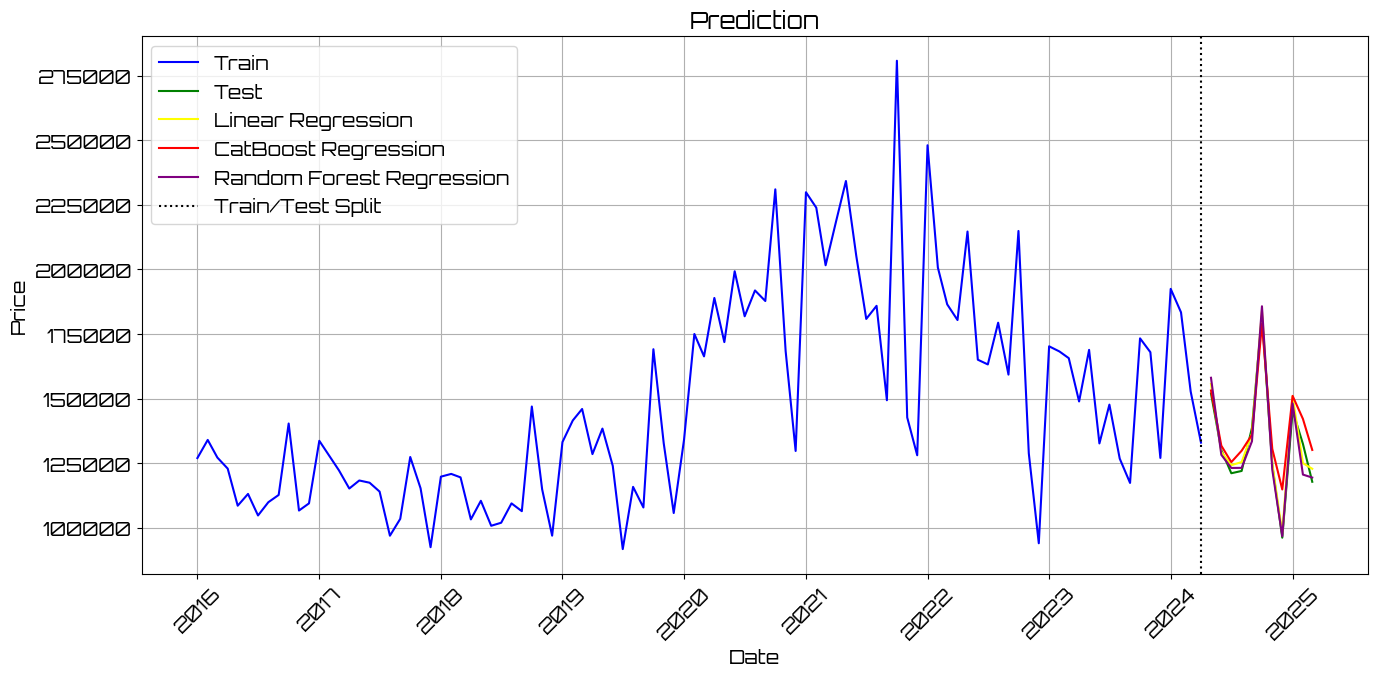

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Train', color='blue')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, lin_reg_metric['y_pred_test'], label='Linear Regression', color='yellow')
plt.plot(y_test.index, catboost_metric['y_pred_test'], label='CatBoost Regression', color='red')
plt.plot(y_test.index, rf_reg_metric['y_pred_test'], label='Random Forest Regression', color='purple')
plt.axvline(y_train.index[-1], color='black', linestyle=':', label='Train/Test Split')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Гиперпараметры для моделей регрессии

# Временные ряды



In [ ]:
duplicates = df.groupby(['ds', 'Game']).size().reset_index(name='count')
print("Дубликаты по 'ds' и 'Game' до агрегирования:")
print(duplicates[duplicates['count'] > 1])

Дубликаты по 'ds' и 'Game' до агрегирования:
Empty DataFrame
Columns: [ds, Game, count]
Index: []


In [ ]:
df.shape

(13997, 9)

In [ ]:
first_cols = ['Month', 'Year', 'Rank']  # Столбцы, для которых берём первое значение
mean_cols = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

# Создаём словарь агрегирования
agg_dict = {}
for col in df.columns:
    if col in first_cols:
        agg_dict[col] = 'first'
    elif col in mean_cols:
        agg_dict[col] = 'mean'

# Группируем данные по 'ds' и 'Game'
df = df.groupby(['ds', 'Game']).agg(agg_dict).reset_index()

targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()

In [ ]:
x = ['Rank', 'Game', 'Hours_watched', 'Hours_streamed',
     'Peak_viewers', 'Peak_channels', 'Streamers',
     'Avg_channels', 'Avg_viewer_ratio']
dflol.drop(x, axis=1, inplace=True)
dfdota2.drop(x, axis=1, inplace=True)
dfcsgo.drop(x, axis=1, inplace=True)

KeyError: "['Peak_channels', 'Streamers', 'Avg_channels'] not found in axis"

Text(0, 0.5, 'Корреляция')

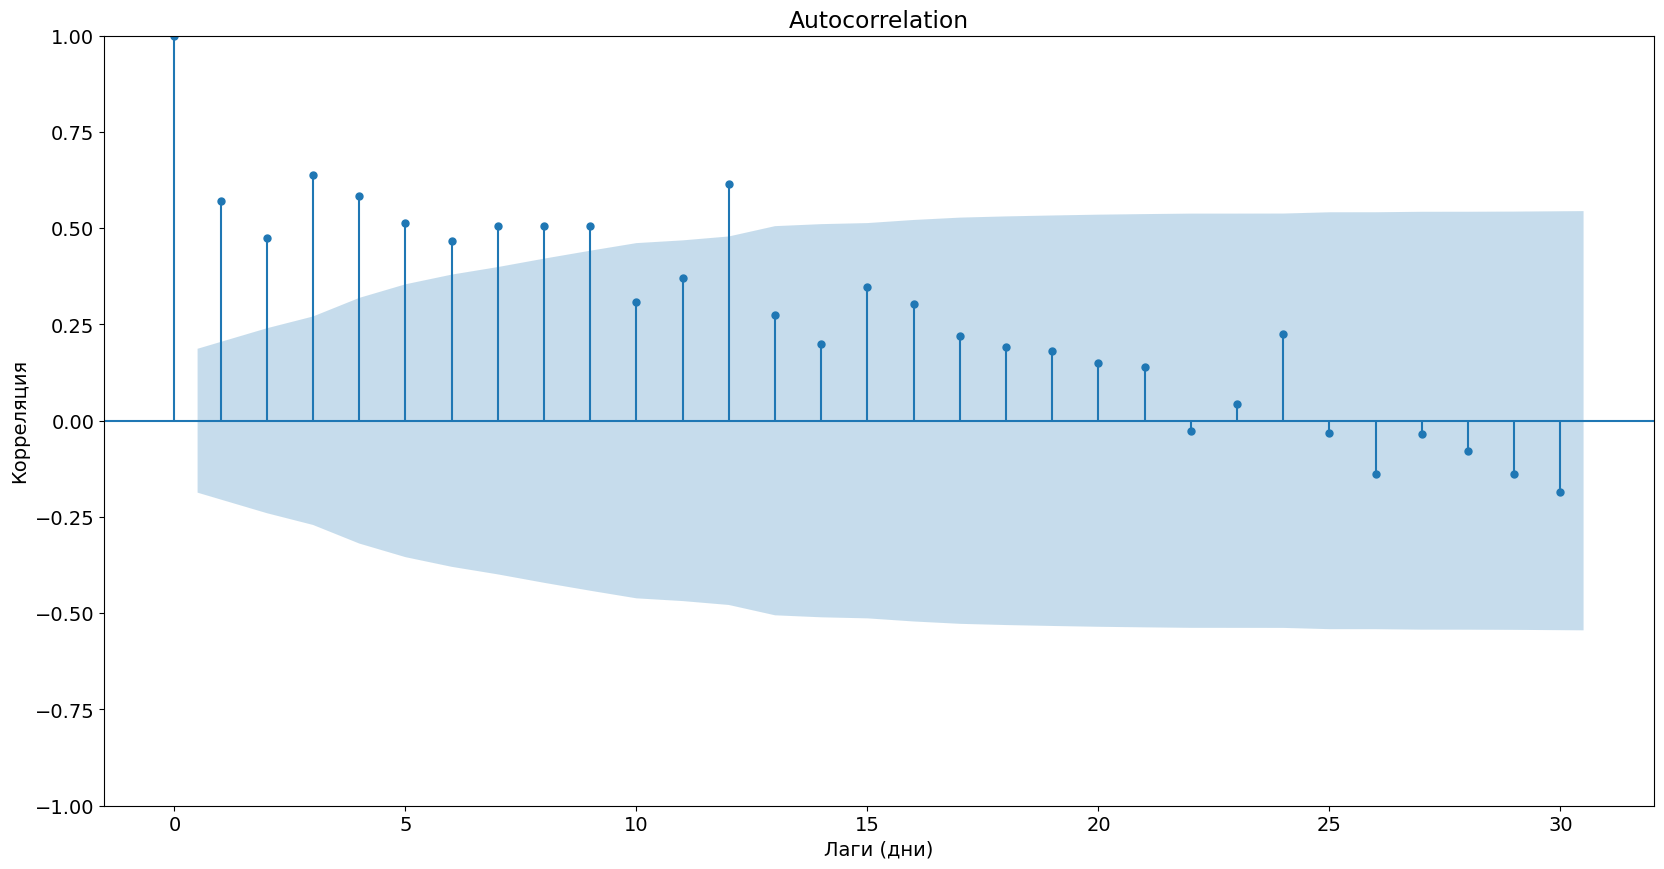

In [ ]:
plot_acf(dflol['Avg_viewers'].values, lags=30)
plt.xlabel('Лаги (дни)')
plt.ylabel('Корреляция')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_metrics(df_model, targets):
    results = []
    for _, row in df_model.iterrows():
        game = row['Game']
        for metric in targets:
            pred = row[f'{metric}_pred']
            test = row[f'{metric}_test']

            if not isinstance(pred, list) or not isinstance(test, list):
                continue

            y_true = np.array(test)
            y_pred = np.array(pred)
            mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
            y_true = y_true[mask]
            y_pred = y_pred[mask]

            if len(y_true) == 0:
                result = {
                    'Game': game,
                    'Metric': metric,
                    'RMSE': np.nan,
                    'R2': np.nan,
                    'MAE': np.nan,
                    'MAPE': np.nan
                }
                results.append(result)
                continue

            # Вычисляем метрики
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            r2 = r2_score(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            if (y_true == 0).any():
                mape = np.nan  # MAPE не определён при нулевых значениях
            else:
                mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

            result = {
                'Game': game,
                'Metric': metric,
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae,
                'MAPE': mape
            }
            results.append(result)

    return pd.DataFrame(results)

## Модели для временного ряда


### **BaseLine**

#### наивное прогнозирование

In [ ]:
def metrics(y_test, y_pred, model):
    return {
        'Model': model,
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'Test MAE': mean_absolute_error(y_test, y_pred),
        'Test R^2': r2_score(y_test, y_pred)
    }

In [ ]:
metrics_list = []

In [ ]:
def run_naive(df, targets):
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        # Сортируем и устанавливаем индекс с частотой 'MS' для текущей игры
        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        # Определяем последний месяц для текущей игры
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]  # Все данные до последнего месяца
            test = series[series.index == last_date]  # Последний месяц

            # Наивное прогнозирование: предсказываем последнее значение из train:)
            pred = float(train.iloc[-1]) if len(train) > 0 else np.nan

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
# def run_naive(df, targets, test_months=1):
#     rows = []
#     for game in games:  # Предполагается, что games определён глобально
#         # Фильтруем данные для текущей игры
#         sub = df[df['Game'] == game].copy()
#         if len(sub) < test_months + 1:  # Проверяем, достаточно ли данных
#             continue

#         # Сортируем и устанавливаем индекс с частотой 'MS'
#         sub = sub.sort_values('ds')
#         sub = sub.set_index('ds').asfreq('MS')

#         # Определяем последний месяц
#         last_date = sub.index.max()
#         if pd.isna(last_date):
#             continue

#         # Определяем начало тестового периода (12 месяцев назад от last_date)
#         test_start_date = last_date - pd.DateOffset(months=test_months - 1)

#         row = {'Game': game}
#         for metric in targets:
#             series = sub[metric].dropna()
#             train = series[series.index < test_start_date]  # Данные до тестового периода
#             test = series[series.index >= test_start_date]  # Последние 12 месяцев

#             if len(train) == 0 or len(test) == 0:
#                 row[f'{metric}_pred'] = [np.nan] * len(test)
#                 row[f'{metric}_test'] = test.tolist()
#                 continue

#             # Наивное прогнозирование: последнее значение train для всех месяцев теста
#             pred = [float(train.iloc[-1])] * len(test)

#             row[f'{metric}_pred'] = pred
#             row[f'{metric}_test'] = test.tolist()

#         rows.append(row)

#     # Формируем DataFrame
#     df_model = pd.DataFrame(rows)
#     return df_model

In [ ]:
df_naive = run_naive(df, targets)
df_naive

Avg_viewers_pred  Peak_viewers_pred  \
Game                                                                
60 Seconds!                               70.0            19204.0   
ARK: Survival Evolved                  34035.0           220016.0   
Alien: Isolation                        1666.0            19954.0   
American Truck Simulator                 610.0            22521.0   
Arma 3                                   579.0            17042.0   
...                                        ...                ...   
I'm Only Sleeping                       9136.0           130266.0   
Gartic Phone                             607.0            24058.0   
ELDEN RING                             12548.0            67966.0   
Mario Kart 8 Deluxe                     1350.0            43170.0   
Pools, Hot Tubs, and Beaches            2101.0            37998.0   

                              Avg_viewer_ratio_pred  Hours_watched_pred  \
Game                                                                      
60 Seconds!                                  143.04             47489.0   
ARK: Survival Evolved                        139.31          25288607.0   
Alien: Isolation                              20.01           1238011.0   
American Truck Simulator                      11.53            439238.0   
Arma 3                                        14.49            430607.0   
...                                             ...                 ...   
I'm Only Sleeping                             45.21           6130620.0   
Gartic Phone                                  20.18            407882.0   
ELDEN RING                                    20.90           8420202.0   
Mario Kart 8 Deluxe                           30.63            906259.0   
Pools, Hot Tubs, and Beaches                  53.59           1410431.0   

                              Hours_streamed_pred  Avg_viewers_test  \
Game                                                                  
60 Seconds!                                 332.0              59.0   
ARK: Survival Evolved                    181526.0             680.0   
Alien: Isolation                          61872.0             471.0   
American Truck Simulator                  38093.0             556.0   
Arma 3                                    29723.0             237.0   
...                                           ...               ...   
I'm Only Sleeping                        135604.0            7627.0   
Gartic Phone                              20215.0             499.0   
ELDEN RING                               402935.0           10913.0   
Mario Kart 8 Deluxe                       29584.0             908.0   
Pools, Hot Tubs, and Beaches              26318.0            2531.0   

                              Peak_viewers_test  Avg_viewer_ratio_test  \
Game                                                                     
60 Seconds!                             17353.0                 106.31   
ARK: Survival Evolved                   37763.0                   3.91   
Alien: Isolation                        17934.0                  25.55   
American Truck Simulator                17686.0                  11.46   
Arma 3                                  13523.0                   6.61   
...                                         ...                    ...   
I'm Only Sleeping                       56735.0                  40.85   
Gartic Phone                            24466.0                  18.94   
ELDEN RING                              52627.0                  21.26   
Mario Kart 8 Deluxe                     23903.0                  22.59   
Pools, Hot Tubs, and Beaches            59160.0                  66.91   

                              Hours_watched_test  Hours_streamed_test  
Game                                                                   
60 Seconds!                              44119.0                415.0  
ARK: Survival Evolved                   489612.0     

In [ ]:
metrics_naive = evaluate_metrics(df_naive, targets)
metrics_naive

Metric     Mean_RMSE     Mean_MAE  Relative_MAE (%)        R2
0       Avg_viewers  3.719565e+03    1395.8650         17.276124  0.986048
1      Peak_viewers  9.208958e+04   35492.7250         55.588964  0.473225
2  Avg_viewer_ratio  3.643074e+02      57.7374         67.789538  0.176993
3     Hours_watched  3.109651e+06  955875.8050         15.956784  0.982339
4    Hours_streamed  4.119537e+04   15558.5150          8.812002  0.992887

#### mean rolling

In [ ]:
def run_moving_average(df, targets, window=3,test_months=1):
    rows = []
    for game in games:  # Предполагается, что games определён глобально
        sub = df[df['Game'] == game].copy()
        if len(sub) < test_months + 1:  # Проверяем, достаточно ли данных
            continue

        # Сортируем и устанавливаем индекс с частотой 'MS'
        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        # Определяем последний месяц
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        # Определяем начало тестового периода (12 месяцев назад от last_date)
        test_start_date = last_date - pd.DateOffset(months=test_months - 1)

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]  # Все данные до последнего месяца
            test = series[series.index == last_date]  # Последний месяц

            # Прогнозирование на основе скользящего среднего: берём среднее за последние window значений
            if len(train) >= window:
                pred = float(train.iloc[-window:].mean())
            elif len(train) > 0:
                pred = float(train.mean())  # Если данных меньше, чем window, берём среднее по всем данным
            else:
                pred = np.nan

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_moving_average = run_moving_average(df, targets, window=3)
df_moving_average

Avg_viewers_pred  Peak_viewers_pred  \
Game                                                                
60 Seconds!                          61.000000       16830.666667   
ARK: Survival Evolved             15196.666667      116282.666667   
Alien: Isolation                   1161.333333       21407.333333   
American Truck Simulator            563.000000       29858.000000   
Arma 3                              556.666667       22280.000000   
...                                        ...                ...   
I'm Only Sleeping                 10965.333333      116148.000000   
Gartic Phone                        713.666667       42605.000000   
ELDEN RING                        10349.666667       73840.000000   
Mario Kart 8 Deluxe                1271.666667       64863.333333   
Pools, Hot Tubs, and Beaches       2205.333333       29764.333333   

                              Avg_viewer_ratio_pred  Hours_watched_pred  \
Game                                                                      
60 Seconds!                              104.550000        4.344967e+04   
ARK: Survival Evolved                     60.360000        1.129156e+07   
Alien: Isolation                          19.630000        8.534090e+05   
American Truck Simulator                  10.920000        4.104213e+05   
Arma 3                                    13.800000        4.097830e+05   
...                                             ...                 ...   
I'm Only Sleeping                         45.840000        7.928216e+06   
Gartic Phone                              24.996667        5.160613e+05   
ELDEN RING                                17.700000        7.388949e+06   
Mario Kart 8 Deluxe                       29.383333        9.129197e+05   
Pools, Hot Tubs, and Beaches              55.870000        1.588567e+06   

                              Hours_streamed_pred  Avg_viewers_test  \
Game                                                                  
60 Seconds!                            434.333333              59.0   
ARK: Survival Evolved               195412.000000             680.0   
Alien: Isolation                     43798.000000             471.0   
American Truck Simulator             37360.666667             556.0   
Arma 3                               29814.333333             237.0   
...                                           ...               ...   
I'm Only Sleeping                   172174.000000            7627.0   
Gartic Phone                         20711.333333             499.0   
ELDEN RING                          416751.333333           10913.0   
Mario Kart 8 Deluxe                  31131.000000             908.0   
Pools, Hot Tubs, and Beaches         28398.000000            2531.0   

                              Peak_viewers_test  Avg_viewer_ratio_test  \
Game                                                                     
60 Seconds!                             17353.0                 106.31   
ARK: Survival Evolved                   37763.0                   3.91   
Alien: Isolation                        17934.0                  25.55   
American Truck Simulator                17686.0                  11.46   
Arma 3                                  13523.0                   6.61   
...                                         ...                    ...   
I'm Only Sleeping                       56735.0                  40.85   
Gartic Phone                            24466.0                  18.94   
ELDEN RING                              52627.0                  21.26   
Mario Kart 8 Deluxe                     23903.0                  22.59   
Pools, Hot Tubs, and Beaches            59160.0                  66.91   

                              Hours_watched_test  Hours_streamed_test  
Game                                                                   
60 Seconds!                              44119.0                415.0  
ARK: Survival Evolved                   489612.0     

In [ ]:
metrics_moving_average = evaluate_metrics(df_moving_average, targets)
metrics_moving_average

Metric     Mean_RMSE      Mean_MAE  Relative_MAE (%)        R2
0       Avg_viewers  3.590567e+03  1.406443e+03         17.407037  0.986999
1      Peak_viewers  7.351121e+04  3.235454e+04         50.673918  0.664331
2  Avg_viewer_ratio  2.952835e+02  4.707547e+01         55.271351  0.459313
3     Hours_watched  2.704098e+06  1.059139e+06         17.680598  0.986645
4    Hours_streamed  1.056594e+05  2.252087e+04         12.755325  0.953210

## 📊 Multi-Model Forecast Pipeline: ARIMA, SARIMA, SARIMAX (statsmodels)
# Прогноз следующего месяца для каждой игры и метрики тремя моделями


In [ ]:
def is_stationary(series, alpha=0.05):
    p = adfuller(series.dropna())[1]
    return p < alpha

### arima

In [ ]:
first_cols = ['Month', 'Year', 'Rank']
mean_cols = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']

agg_dict = {}
for col in df.columns:
    if col in first_cols:
        agg_dict[col] = 'first'
    elif col in mean_cols:
        agg_dict[col] = 'mean'

In [ ]:
# Функция для прогнозирования с помощью ARIMA
def forecast_arima(series, order=(1, 0, 0)):
    try:
        model = sm.tsa.arima.ARIMA(series, order=order)
        res = model.fit()
        # Прогнозируем на 1 шаг вперед
        return float(res.forecast(steps=1).iloc[0])
    except Exception as e:
        print(f"ARIMA failed: {e}")
        return np.nan

In [ ]:
# Функция для построения предсказаний
def build_predictions(model_name):
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        exog = pd.DataFrame({
            'year': sub.index.year,
            'month': sub.index.month
        }, index=sub.index)
        exog_train = exog.loc[exog.index < last_date]
        exog_test = exog.loc[[last_date]]

        row = {'Game': game}
        for metric in targets:
            train_series = sub.loc[sub.index < last_date, metric].dropna()
            test_val = sub.at[last_date, metric] if last_date in sub.index else np.nan

            # Проверяем стационарность
            if not is_stationary(train_series):
                # Первая разность
                series_to_fit = train_series.diff().dropna()
                d_used = 1
                order = (1, d_used, 1)
            else:
                series_to_fit = train_series
                d_used = 0
                order = (1, 0, 1)

            # Прогнозируем
            if model_name == 'ARIMA':
                pred = forecast_arima(series_to_fit, order=order)
            else:
                pred = np.nan

            # Интегрируем прогноз обратно, если использовалась разность
            if not np.isnan(pred) and d_used == 1:
                last_val = train_series.iloc[-1]
                pred = last_val + pred

            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = test_val

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_arima = build_predictions('ARIMA')
print(df_arima)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_mo

                              Avg_viewers_pred  Peak_viewers_pred  \
Game                                                                
60 Seconds!                         156.450720       18238.075767   
ARK: Survival Evolved             21456.384905       81612.337930   
Alien: Isolation                    903.048069       22015.119830   
American Truck Simulator            412.057081       26822.663819   
Arma 3                              506.257674       15750.468434   
...                                        ...                ...   
I'm Only Sleeping                  9954.189054      128820.798664   
Gartic Phone                        946.835614       53685.742332   
ELDEN RING                        16752.518779      103419.195806   
Mario Kart 8 Deluxe                1629.913108       40723.810777   
Pools, Hot Tubs, and Beaches       2005.553732       54118.407790   

                              Avg_viewer_ratio_pred  Hours_watched_pred  \
Game                       

In [ ]:
metrics_arima = evaluate_metrics(df_arima, targets)
metrics_arima

Metric     Mean_RMSE      Mean_MAE  Relative_MAE (%)        R2
0       Avg_viewers  3.747441e+03  1.582782e+03         19.589531  0.985838
1      Peak_viewers  6.093222e+04  2.854179e+04         44.702353  0.769379
2  Avg_viewer_ratio  3.199266e+02  5.105498e+01         59.943705  0.365300
3     Hours_watched  2.855567e+06  1.146111e+06         19.132446  0.985107
4    Hours_streamed  5.418956e+04  2.236702e+04         12.668192  0.987692

In [ ]:
df_arima.isnull().sum()

Avg_viewers_pred         0
Peak_viewers_pred        0
Avg_viewer_ratio_pred    0
Hours_watched_pred       0
Hours_streamed_pred      0
Avg_viewers_test         0
Peak_viewers_test        0
Avg_viewer_ratio_test    0
Hours_watched_test       0
Hours_streamed_test      0
dtype: int64

#### Гиперпараметры аримы

In [ ]:
p = range(0,10)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
best_params = (0,0,0)
best_rmse = np.inf

for params in tqdm(pdq):
    model_test = sm.tsa.arima.ARIMA(val.AEP_MW, order = params)
    result_test = model_test.fit()
    preds = result_test.predict(dynamic=False)

    rmse_ = mean_absolute_percentage_error(val.AEP_MW, preds)
    if rmse_ < best_rmse:
        best_params = params
        best_rmse = rmse_
print(best_params, best_rmse)

### sarima

In [ ]:
# Функция для прогнозирования с помощью SARIMA
def run_sarima(df, targets):
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]  # Все данные до последнего месяца
            test = series[series.index == last_date]  # Последний месяц

            try:
                model = SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(disp=False)
                pred = float(model.forecast(steps=1).iloc[0])
            except Exception as e:
                print(f"SARIMA failed for {game}, {metric}: {e}")
                pred = np.nan

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_sarima = run_sarima(df, targets)

In [ ]:
df_sarima.isnull().sum()

Avg_viewers_pred         0
Peak_viewers_pred        0
Avg_viewer_ratio_pred    0
Hours_watched_pred       0
Hours_streamed_pred      0
Avg_viewers_test         0
Peak_viewers_test        0
Avg_viewer_ratio_test    0
Hours_watched_test       0
Hours_streamed_test      0
dtype: int64

In [ ]:
metrics_sarima = evaluate_metrics(df_sarima, targets)
metrics_sarima

Metric          RMSE             R2           MAE          MAPE
0       Avg_viewers  9.335712e+10  -8.789263e+12  6.620253e+09  6.004713e+09
1      Peak_viewers  2.177468e+14  -2.945153e+18  1.539721e+13  9.986498e+10
2  Avg_viewer_ratio  3.547952e+23  -7.805899e+41  2.508781e+22  6.338506e+22
3     Hours_watched  1.855630e+95 -6.289020e+175  1.312129e+94  3.058696e+90
4    Hours_streamed  3.613074e+24  -5.471354e+37  2.554829e+23  2.621951e+21

#### Гиперпараметры sarima

### sarimax

In [ ]:
# Функция для прогнозирования с помощью SARIMAX
def run_sarimax(df, targets):
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        sub['Year'] = sub.index.year
        sub['Month'] = sub.index.month

        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        # Экзогенные переменные
        exog = pd.DataFrame({
            'year': sub['Year'],
            'month': sub['Month']
        }, index=sub.index)

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]  # Все данные до последнего месяца
            test = series[series.index == last_date]  # Последний месяц

            # Подготавливаем экзогенные переменные для train и test
            exog_train = exog.loc[train.index]  # Синхронизируем с train
            exog_test = exog.loc[[last_date]]

            # Проверяем, есть ли NaN или inf в exog_train и exog_test
            if exog_train.isna().any().any() or np.isinf(exog_train).any().any():
                print(f"SARIMAX skipped for {game}, {metric}: exog_train contains NaN or inf")
                pred = np.nan
            elif exog_test.isna().any().any() or np.isinf(exog_test).any().any():
                print(f"SARIMAX skipped for {game}, {metric}: exog_test contains NaN or inf")
                pred = np.nan
            else:
                try:
                    model = SARIMAX(train,
                                    exog=exog_train,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit(disp=False)
                    pred = float(model.forecast(steps=1, exog=exog_test).iloc[0])
                except Exception as e:
                    print(f"SARIMAX failed for {game}, {metric}: {e}")
                    pred = np.nan

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_sarimax = run_sarimax(df, targets)

In [ ]:
metrics_sarimax = evaluate_metrics(df_sarimax, targets)
metrics_sarimax

Metric           RMSE             R2            MAE  \
0       Avg_viewers   7.255819e+52  -5.309216e+96   5.130639e+51   
1      Peak_viewers  5.282385e+111 -1.733262e+213  3.735210e+110   
2  Avg_viewer_ratio   9.783957e+04  -5.935938e+04   6.983152e+03   
3     Hours_watched   1.025680e+30  -1.921425e+45   7.252650e+28   
4    Hours_streamed   7.712660e+21  -2.493157e+32   5.453674e+20   

            MAPE  
0   4.664217e+51  
1  2.403920e+108  
2   3.603878e+04  
3   5.558766e+24  
4   5.596957e+18

In [ ]:
df_sarimax

Avg_viewers_pred  Peak_viewers_pred  \
Game                                                                
60 Seconds!                         -50.756995       25374.673064   
ARK: Survival Evolved             34290.016712       30739.679715   
Alien: Isolation                    637.636630       -2443.782980   
American Truck Simulator            654.771859       83862.695934   
Arma 3                              163.405007       10411.140411   
...                                        ...                ...   
I'm Only Sleeping                 10679.312892      129795.883709   
Gartic Phone                        192.014385      -92594.775930   
ELDEN RING                        21076.668390      201594.587053   
Mario Kart 8 Deluxe                1612.727825       42607.390268   
Pools, Hot Tubs, and Beaches       3444.375501       25753.354215   

                              Avg_viewer_ratio_pred  Hours_watched_pred  \
Game                                                                      
60 Seconds!                              101.857585        7.753460e+03   
ARK: Survival Evolved                     27.393336        1.304356e+07   
Alien: Isolation                          11.457313        4.133746e+05   
American Truck Simulator                 -11.422159        3.727755e+05   
Arma 3                                    13.366741        1.185276e+05   
...                                             ...                 ...   
I'm Only Sleeping                         48.814174        7.785659e+06   
Gartic Phone                              20.319056        1.017093e+04   
ELDEN RING                                24.885085        1.442092e+07   
Mario Kart 8 Deluxe                       27.150614        1.851074e+06   
Pools, Hot Tubs, and Beaches              93.666116        1.643006e+06   

                              Hours_streamed_pred  Avg_viewers_test  \
Game                                                                  
60 Seconds!                            317.119214              59.0   
ARK: Survival Evolved               134391.350415             680.0   
Alien: Isolation                     45854.406479             471.0   
American Truck Simulator             37219.787639             556.0   
Arma 3                               11383.727713             237.0   
...                                           ...               ...   
I'm Only Sleeping                   143145.056898            7627.0   
Gartic Phone                         14738.273614             499.0   
ELDEN RING                          789319.462297           10913.0   
Mario Kart 8 Deluxe                  29764.112062             908.0   
Pools, Hot Tubs, and Beaches         25601.375556            2531.0   

                              Peak_viewers_test  Avg_viewer_ratio_test  \
Game                                                                     
60 Seconds!                             17353.0                 106.31   
ARK: Survival Evolved                   37763.0                   3.91   
Alien: Isolation                        17934.0                  25.55   
American Truck Simulator                17686.0                  11.46   
Arma 3                                  13523.0                   6.61   
...                                         ...                    ...   
I'm Only Sleeping                       56735.0                  40.85   
Gartic Phone                            24466.0                  18.94   
ELDEN RING                              52627.0                  21.26   
Mario Kart 8 Deluxe                     23903.0                  22.59   
Pools, Hot Tubs, and Beaches            59160.0                  66.91   

                              Hours_watched_test  Hours_streamed_test  
Game                                                                   
60 Seconds!                              44119.0                415.0  
ARK: Survival Evolved                   489612.0     

In [ ]:
targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()



# Функция для метрик
def compute_metrics(y_true, y_pred, model_name, game_name, target_name):
    return {
        'Model': model_name,
        'Game': game_name,
        'Target': target_name,
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }


#### Гиперпараметры sarimax

# Something

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Функция для построения графиков для каждого таргета
def plot_forecasts(df, df_naive, df_moving_average, df_arima, df_sarima, df_sarimax, targets, game, test_months=6, display_years=3):
    sub = df[df['Game'] == game].copy()
    if len(sub) < 2:
        print(f"Not enough data for {game}")
        return

    sub = sub.sort_values('ds')
    sub = sub.set_index('ds').asfreq('MS')

    last_date = sub.index.max()
    if pd.isna(last_date):
        print(f"No valid last date for {game}")
        return

    start_date = last_date - pd.DateOffset(months=display_years*12)
    sub = sub[sub.index >= start_date]

    split_date = last_date - pd.DateOffset(months=test_months)

    for metric in targets:
        y_train = sub[sub.index <= split_date][metric].dropna()
        y_test = sub[sub.index > split_date][metric].dropna()

        # Извлекаем прогнозы из DataFrame
        # Поскольку у нас прогноз только на последний месяц, мы пока используем его
        # В идеале нужно прогнозировать на весь тестовый период
        if game in df_naive.index:
            naive_pred = df_naive.loc[game , f'{metric}_pred']
        else:
            naive_pred = np.nan

        if game in df_moving_average.index:
            rolling_mean_pred = df_moving_average.loc[game, f'{metric}_pred']
        else:
            rolling_mean_pred = np.nan

        if game in df_arima.index:
            arima_pred = df_arima.loc[game, f'{metric}_pred']
        else:
            arima_pred = np.nan

        if game in df_sarima.index:
            sarima_pred = df_sarima.loc[game, f'{metric}_pred']
        else:
            sarima_pred = np.nan

        if game in df_sarimax.index:
            sarimax_pred = df_sarimax.loc[game, f'{metric}_pred']
        else:
            sarimax_pred = np.nan

        # Создаём Series для прогнозов (пока у нас прогноз только на последний месяц)
        # Для отображения линий в тестовом периоде мы можем растянуть прогноз на весь период test
        test_dates = y_test.index
        naive_pred_series = pd.Series([naive_pred] * len(test_dates), index=test_dates)
        rolling_mean_pred_series = pd.Series([rolling_mean_pred] * len(test_dates), index=test_dates)
        arima_pred_series = pd.Series([arima_pred] * len(test_dates), index=test_dates)
        sarima_pred_series = pd.Series([sarima_pred] * len(test_dates), index=test_dates)
        sarimax_pred_series = pd.Series([sarimax_pred] * len(test_dates), index=test_dates)

        plt.figure(figsize=(14, 7))
        plt.plot(y_train.index, y_train, label='Train', color='blue')
        plt.plot(y_test.index, y_test, label='Test', color='green')
        plt.plot(test_dates, naive_pred_series, label='Naive Forecast', color='orange')
        plt.plot(test_dates, rolling_mean_pred_series, label='Rolling Mean (window=3)', color='purple')
        plt.plot(test_dates, arima_pred_series, label='ARIMA', color='red')
        plt.plot(test_dates, sarima_pred_series, label='SARIMA', color='cyan')
        plt.plot(test_dates, sarimax_pred_series, label='SARIMAX', color='magenta')
        plt.axvline(split_date, color='black', linestyle=':', label='Train/Test Split')
        plt.title(f'Прогнозы моделей временного ряда для {game} - {metric}')
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()
for game in games:
    plot_forecasts(df, df_naive, df_moving_average, df_arima, df_sarima, df_sarimax, targets, game, test_months=6, display_years=3)

# LSTM

In [ ]:
# Функция для создания последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Функция для прогнозирования с помощью LSTM
def run_lstm(df, targets, seq_length=7, epochs=20, batch_size=32):
    games = df['Game'].unique()
    rows = []

    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]  # Все данные до последнего месяца
            test = series[series.index == last_date]  # Последний месяц

            if len(train) < seq_length + 1:  # Проверяем, достаточно ли данных для последовательности
                print(f"Not enough data for LSTM for {game}, {metric}")
                pred = np.nan
            else:
                # Масштабирование данных
                scaler = MinMaxScaler()
                y_scaled = scaler.fit_transform(train.values.reshape(-1, 1))

                # Создаём последовательности для обучения
                X_train_seq, y_train_seq = create_sequences(y_scaled, seq_length)

                # Проверяем, что у нас есть данные для обучения
                if len(X_train_seq) == 0:
                    print(f"No sequences for LSTM for {game}, {metric}")
                    pred = np.nan
                else:
                    # Создаём и обучаем модель LSTM
                    model = Sequential([
                        LSTM(50, activation='tanh', input_shape=(seq_length, 1), return_sequences=False),
                        Dense(1)
                    ])
                    model.compile(optimizer='adam', loss='mse')
                    model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=0)

                    # Подготавливаем данные для прогноза (последняя последовательность из train)
                    last_sequence = y_scaled[-seq_length:]  # Последние seq_length значений
                    X_pred = np.array([last_sequence])  # Формируем вход для модели
                    lstm_pred_scaled = model.predict(X_pred, verbose=0)

                    # Обратное масштабирование прогноза
                    lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
                    pred = float(lstm_pred[0, 0])

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_lstm = run_lstm(df, targets, seq_length=7, epochs=20, batch_size=32)

In [ ]:
metrics_lstm = evaluate_metrics(df_lstm, targets)
metrics_lstm

# Prophet


In [ ]:
# Функция для прогнозирования с помощью Prophet
def run_prophet(df, targets):
    games = df['Game'].unique()
    rows = []

    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]

            if len(train) < 2:
                print(f"Not enough data for Prophet for {game}, {metric}")
                pred = np.nan
            else:
                prophet_df = pd.DataFrame({
                    'ds': train.index,
                    'y': train.values
                })

                model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
                model.fit(prophet_df)

                future = model.make_future_dataframe(periods=1, freq='MS')
                forecast = model.predict(future)
                pred = float(forecast['yhat'].iloc[-1])
                if pred < 0 and metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed']:
                    pred = 0

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_prophet = run_prophet(df, targets)

In [ ]:
metrics_prophet = evaluate_metrics(df_prophet, targets)
metrics_prophet

# Orbit-ml

In [ ]:
!pip install pystan

In [ ]:
!pip install --upgrade orbit-ml

In [ ]:
from orbit.models import LGT

# Функция для прогнозирования с помощью Orbit (LGT модель)
def run_orbit(df, targets):
    games = df['Game'].unique()
    rows = []

    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue

        sub = sub.sort_values('ds')
        sub = sub.set_index('ds').asfreq('MS')

        last_date = sub.index.max()
        if pd.isna(last_date):
            continue

        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]

            if len(train) < 2:
                print(f"Not enough data for Orbit for {game}, {metric}")
                pred = np.nan
            else:
                # Подготавливаем данные для Orbit
                orbit_df = pd.DataFrame({
                    'date': train.index,
                    'y': train.values
                })

                lgt = LGT(
                    response_col='y',
                    date_col='date',
                    seasonality=12,  # Годовая сезонность (для месячных данных)
                   # estimator='stan-mcmc'
                )
                lgt.fit(orbit_df)

                future_dates = pd.date_range(start=train.index[-1], periods=2, freq='MS')[1:]
                future_df = pd.DataFrame({'date': future_dates})
                forecast = lgt.predict(future_df)
                pred = float(forecast['prediction'].iloc[-1])

                if pred < 0 and metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed']:
                    pred = 0

            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual

        rows.append(row)

    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

In [ ]:
df_orbit = run_orbit(df, targets)

In [ ]:
metrics_orbit = evaluate_metrics(df_orbit, targets)
metrics_orbit

# Рекoмендательная система

# Новый раздел

In [ ]:
 #Функция для объединения прогнозов всех моделей
def combine_forecasts(dfs, targets):
    # dfs - список DataFrame с прогнозами (df_naive, df_moving_average, и т.д.)
    # targets - список метрик
    combined_df = None

    for df in dfs:
        if combined_df is None:
            combined_df = df.copy()
        else:
            for metric in targets:
                pred_col = f'{metric}_pred'
                test_col = f'{metric}_test'
                if pred_col in df.columns:
                    # Если значение уже есть, усредняем (игнорируя NaN)
                    combined_df[pred_col] = combined_df[pred_col].combine(df[pred_col], lambda x, y: np.nanmean([x, y]), fill_value=np.nan)
                if test_col in df.columns:
                    combined_df[test_col] = combined_df[test_col].combine_first(df[test_col])

    return combined_df


In [ ]:
# Функция для построения рекомендаций
def build_recommendations(df, combined_df, targets, top_n=5, random_n=5, weights=None):
    if weights is None:
        # Задаём веса по умолчанию
        weights = {
            'Avg_viewers': 0.4,
            'Peak_viewers': 0.3,
            'Avg_viewer_ratio': 0.2,
            'competition': 0.1
        }

    forecast_df = combined_df.copy()

    # Вычисляем конкуренцию (используем Hours_streamed как прокси)
    forecast_df['competition'] = forecast_df['Hours_streamed_pred'] / 1000  # Нормализуем для расчёта

    # Вычисляем Score для каждой игры
    forecast_df['Score'] = (
        weights['Avg_viewers'] * forecast_df['Avg_viewers_pred'] +
        weights['Peak_viewers'] * forecast_df['Peak_viewers_pred'] +
        weights['Avg_viewer_ratio'] * forecast_df['Avg_viewer_ratio_pred'] -
        weights['competition'] * forecast_df['competition']
    )

    # Для пояснений: вычисляем процентный рост Avg_viewers
    # Нам нужны последние значения из исходного df
    games = forecast_df.index
    last_values = {}
    for game in games:
        sub = df[df['Game'] == game].sort_values('ds')
        last_date = sub['ds'].max()
        last_values[game] = {metric: sub[sub['ds'] == last_date][metric].iloc[0] for metric in targets}

    forecast_df['Avg_viewers_last'] = [last_values[game]['Avg_viewers'] for game in games]
    forecast_df['Avg_viewers_growth'] = (
        (forecast_df['Avg_viewers_pred'] - forecast_df['Avg_viewers_last']) /
        forecast_df['Avg_viewers_last'] * 100
    ).fillna(0)

    # Ранжируем по Score и выбираем топ-N
    top_games = forecast_df.sort_values('Score', ascending=False).head(top_n)

    # Выбираем случайные игры из оставшихся
    remaining_games = forecast_df.drop(top_games.index)
    if len(remaining_games) >= random_n:
        random_games = remaining_games.sample(n=random_n, random_state=42)
    else:
        random_games = remaining_games

    # Объединяем топовые и случайные игры
    recommended_games = pd.concat([top_games, random_games])

    # Формируем пояснения
    recommendations = []
    last_date = df['ds'].max()
    next_month = (last_date + timedelta(days=31)).strftime('%B %Y')  # Следующий месяц
    for game, row in recommended_games.iterrows():
        growth = row['Avg_viewers_growth']
        competition = row['competition']
        explanation = (
            f"In {next_month}, {game} is expected to see "
            f"{'a growth' if growth >= 0 else 'a decline'} in average audience → "
            f"{'+' if growth >= 0 else ''}{growth:.1f}% Avg_viewers, "
            f"{'low' if competition < 100 else 'high'} competition → "
            f"{'top pick' if game in top_games.index else 'explore this game'}!"
        )
        recommendations.append({
            'Game': game,
            'Score': row['Score'],
            'Explanation': explanation,
            'Category': 'Top Pick' if game in top_games.index else 'Explore'
        })

    return pd.DataFrame(recommendations)

In [ ]:
targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
recommendations = build_recommendations(df, [df_sarima, df_arima], targets, top_n=5, random_n=5)
print("Recommendations:")
print(recommendations)

# Для определенных игр

In [ ]:
game_metrics = df.groupby('Game')['Avg_viewers'].mean().sort_values(ascending=False)
#top_games = game_metrics.head(2).index.tolist()
top_games = ['League of Legends', 'Conter-Strike', 'VALORANT']
print(f"Топ-2 игры: {top_games}")

Топ-2 игры: ['League of Legends', 'Conter-Strike', 'VALORANT']


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5 pmdarima==2.0.4

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have num

In [ ]:
sub = df[df['Game'] == game].copy()
print(sub.sort_values('ds').set_index('ds').asfreq('MS'))

                Game  Rank  Hours_watched  Hours_streamed  Peak_viewers  \
ds                                                                        
2017-07-01  Fortnite   144      3789768.0        157724.0       74484.0   
2017-08-01  Fortnite   155      1376994.0        144303.0       14564.0   
2017-09-01  Fortnite    11      4703330.0        209917.0       77600.0   
2017-10-01  Fortnite    21     16155246.0        982236.0       79181.0   
2017-11-01  Fortnite     7     23390963.0        990352.0      147556.0   
...              ...   ...            ...             ...           ...   
2024-11-01  Fortnite     4     58719646.0       5552394.0      966022.0   
2024-12-01  Fortnite     9     74322245.0       6577364.0      367335.0   
2025-01-01  Fortnite    21     51615494.0       5690456.0      229573.0   
2025-02-01  Fortnite    10     46883539.0       4274112.0      426079.0   
2025-03-01  Fortnite    14     46230834.0       4108642.0      233629.0   

            Avg_viewers 

Топ-3 игры: ['World of Warcraft', 'Minecraft', 'Fortnite']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph4qk7kf9/eas29zju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph4qk7kf9/q0_7bys3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48676', 'data', 'file=/tmp/tmph4qk7kf9/eas29zju.json', 'init=/tmp/tmph4qk7kf9/q0_7bys3.json', 'output', 'file=/tmp/tmph4qk7kf9/prophet_modelw4t6bgz4/prophet_model-20250508064709.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:47:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:30 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:34 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:35 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:37 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:39 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:41 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:45 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:47 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:49 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:53 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:54 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:57 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 06:47:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
Метрики для Naive:
                 Game            Metric          RMSE           MAE  \
0   World of Warcraft       Avg_viewers  3.195746e+04  2.523525e+04   
1   World of Warcraft      Peak_viewers  1.493180e+05  1.217899e+05   
2   World of Warcraft  Avg_viewer_ratio  2.053451e+01  1.593667e+01   
3   World of Warcraft     Hours_watched  2.279034e+07  1.811788e+07   
4   World of Warcraft    Hours_streamed  1.977335e+05  1.674329e+05   
5           Minecraft       Avg_viewers  2.456262e+04  1.800075e+04   
6           Minecraft      Peak_viewers  2.366074e+05  1.188994e+05   
7           Minecraft  Avg_viewer_ratio  1.227653e+01  8.245833e+00   
8           Minecraft

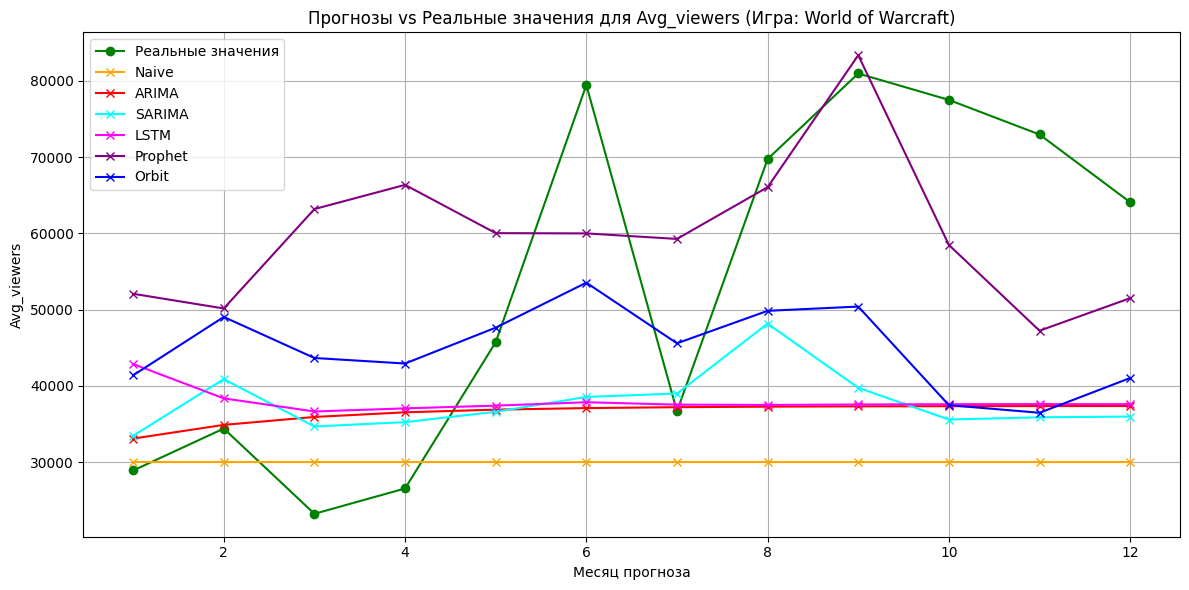

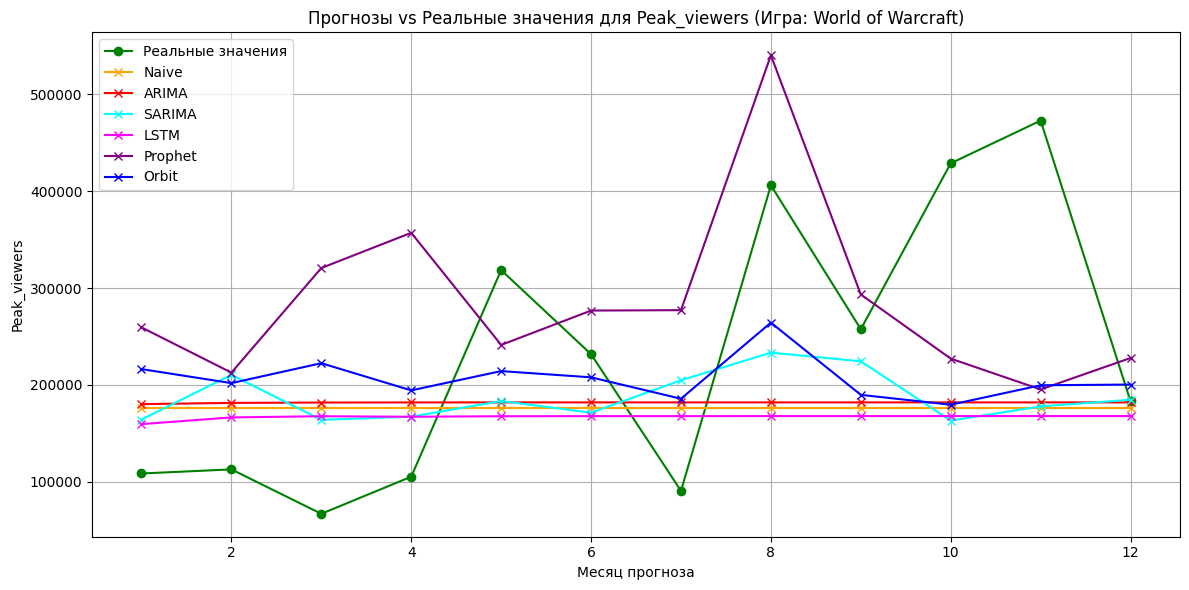

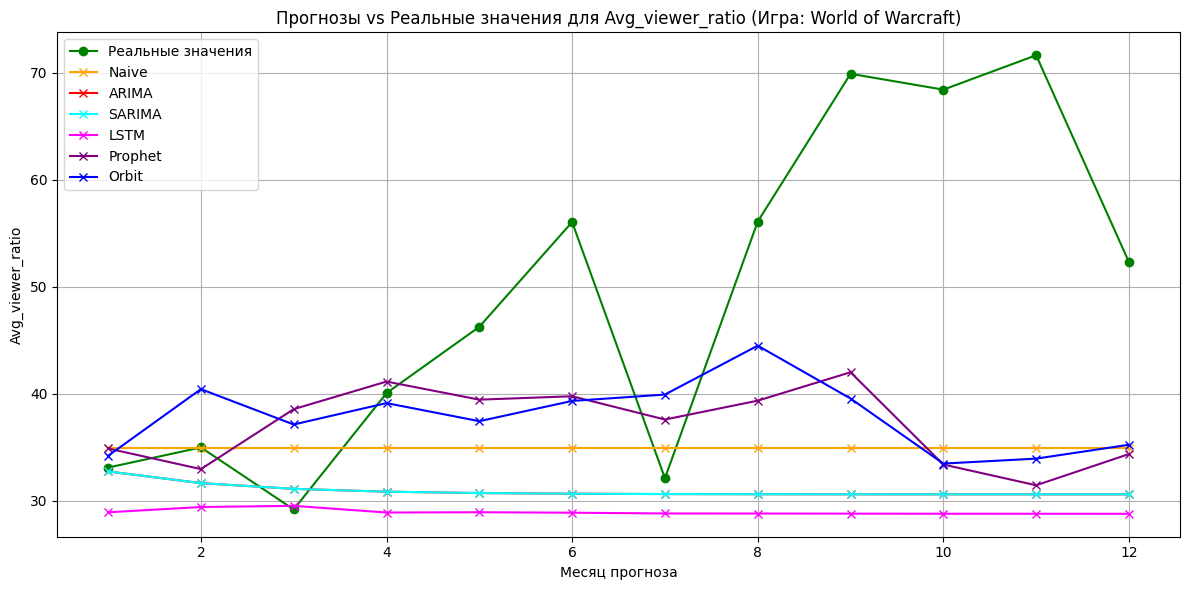

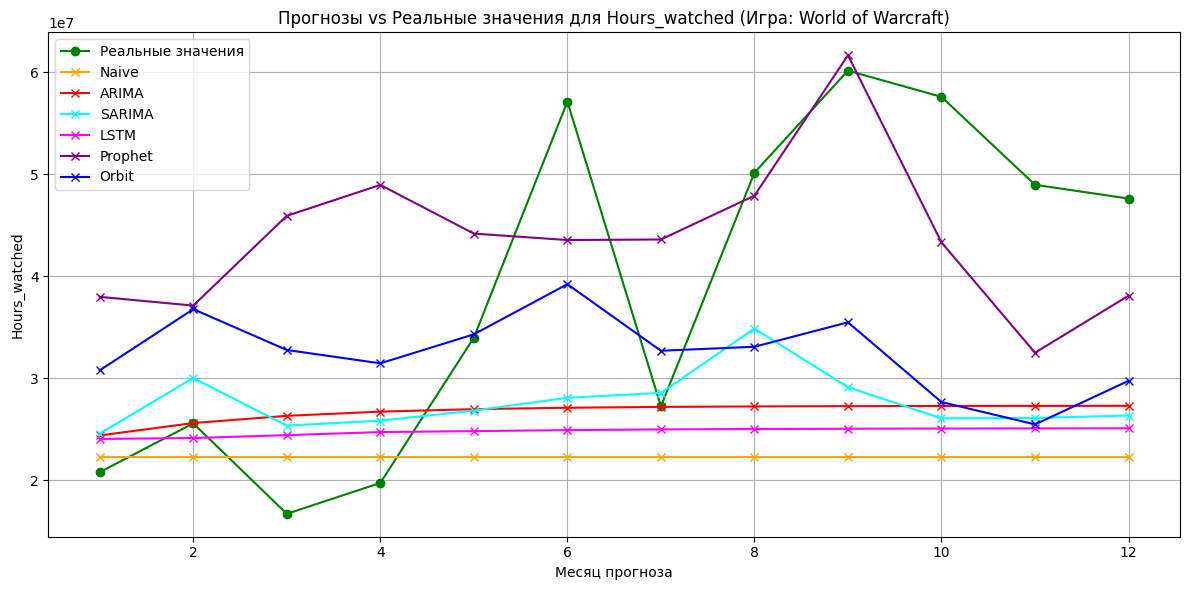

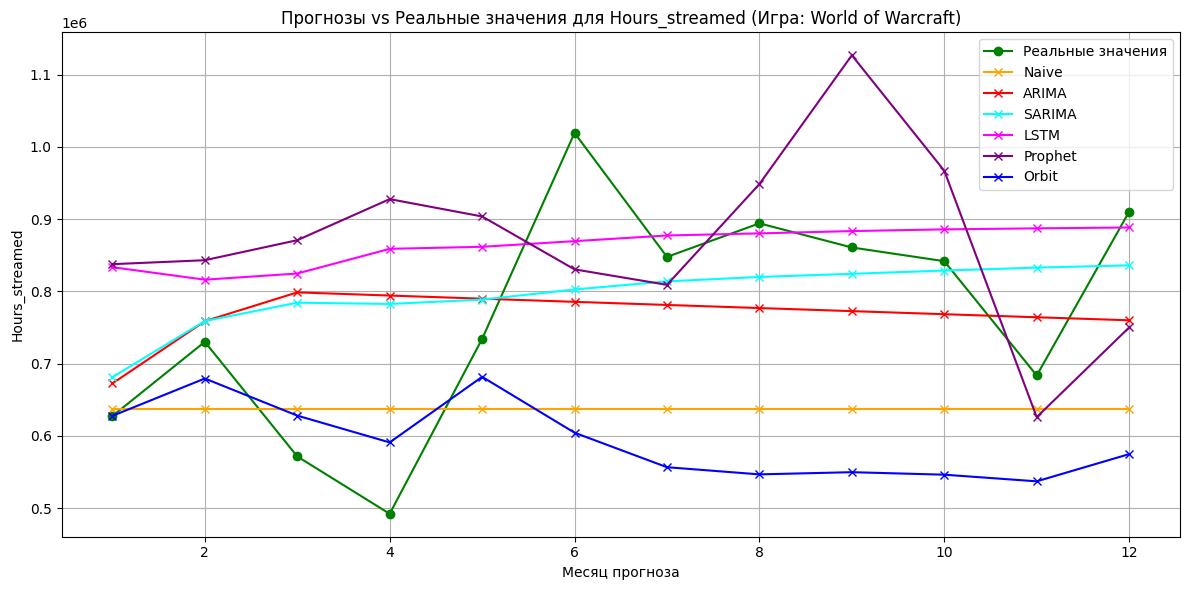

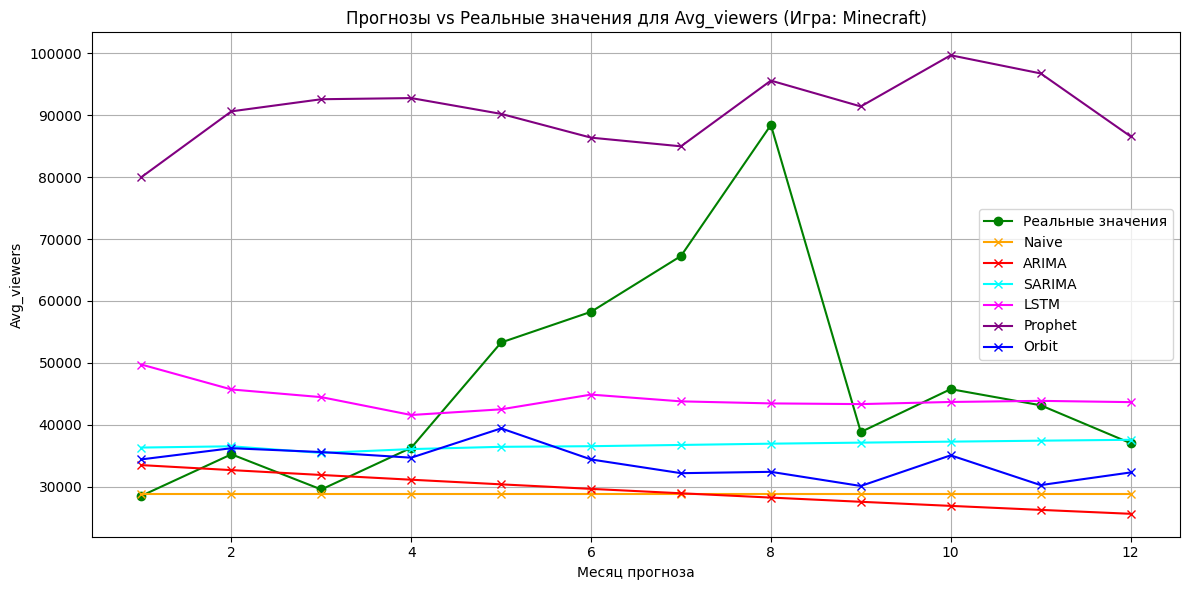

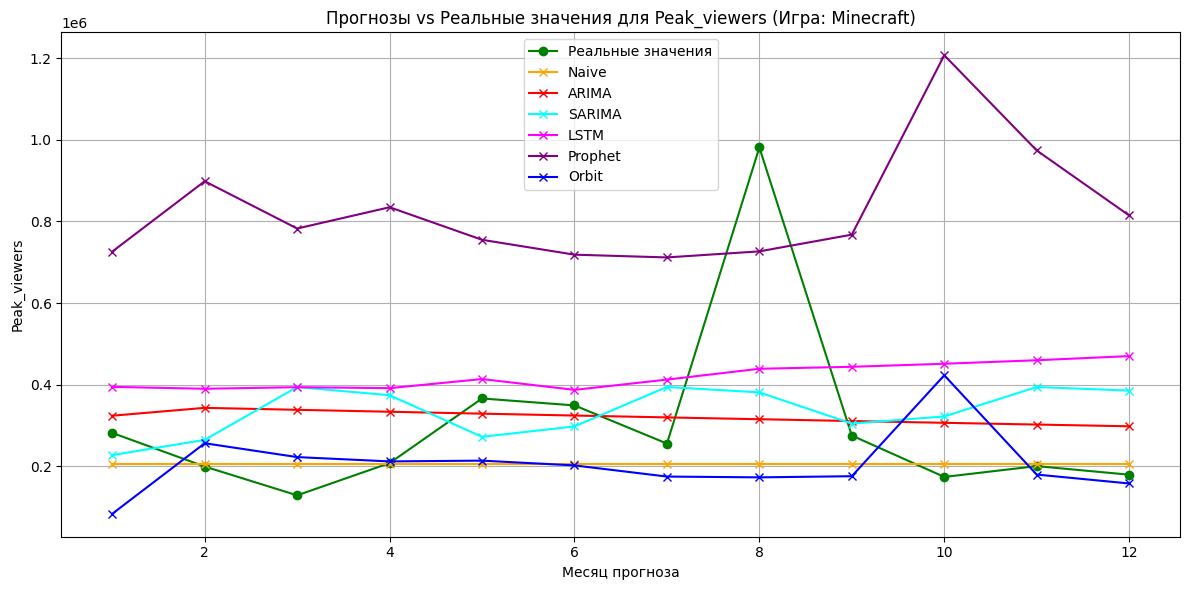

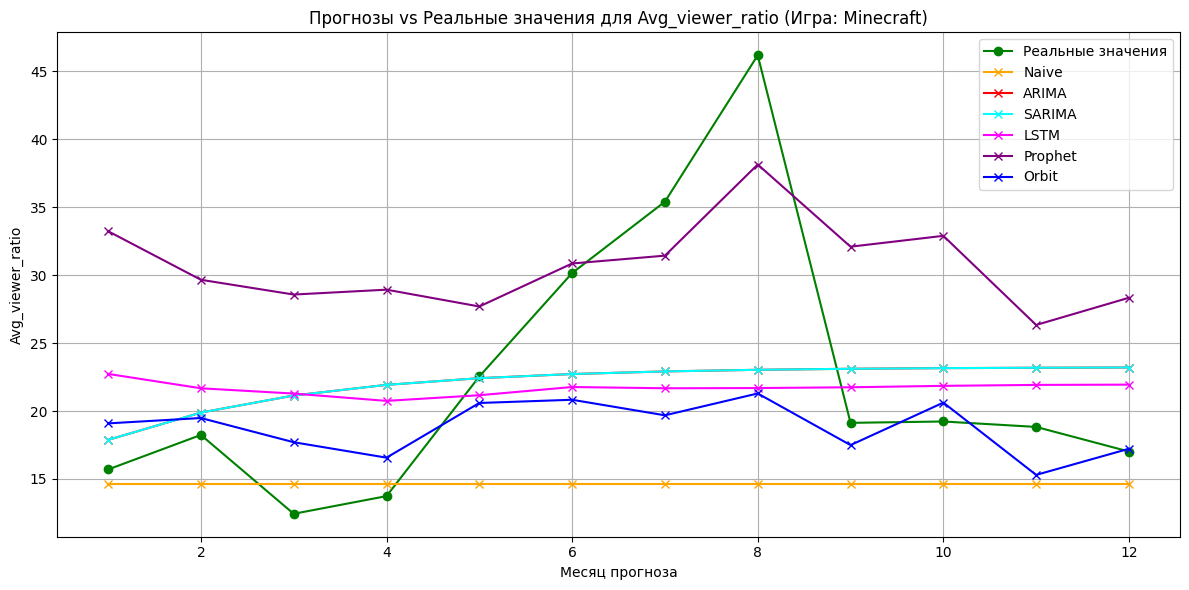

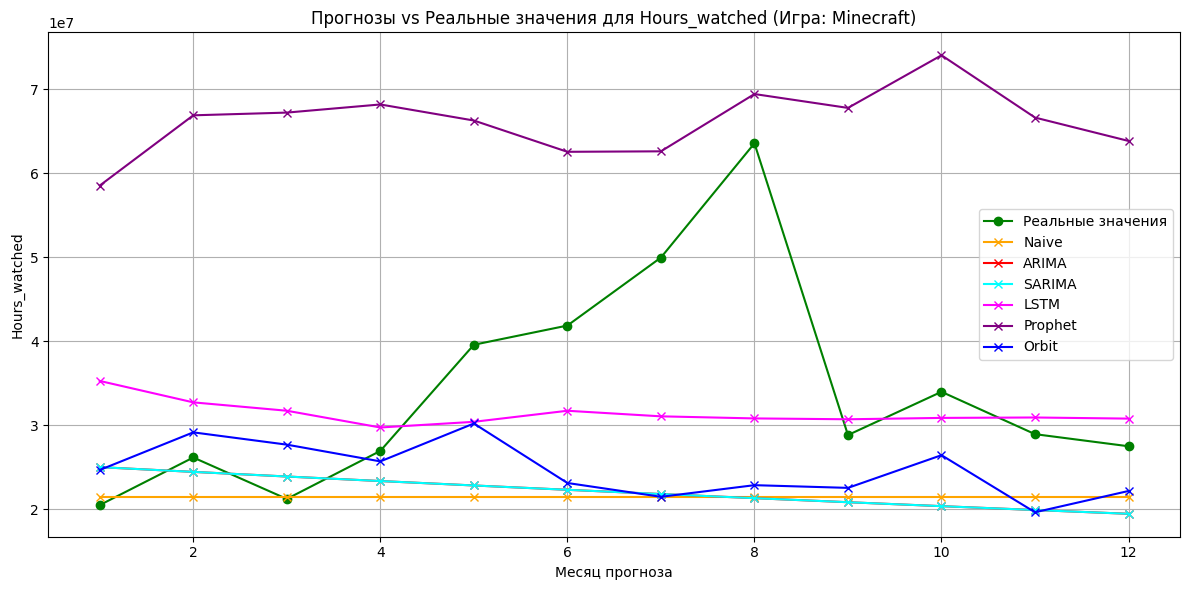

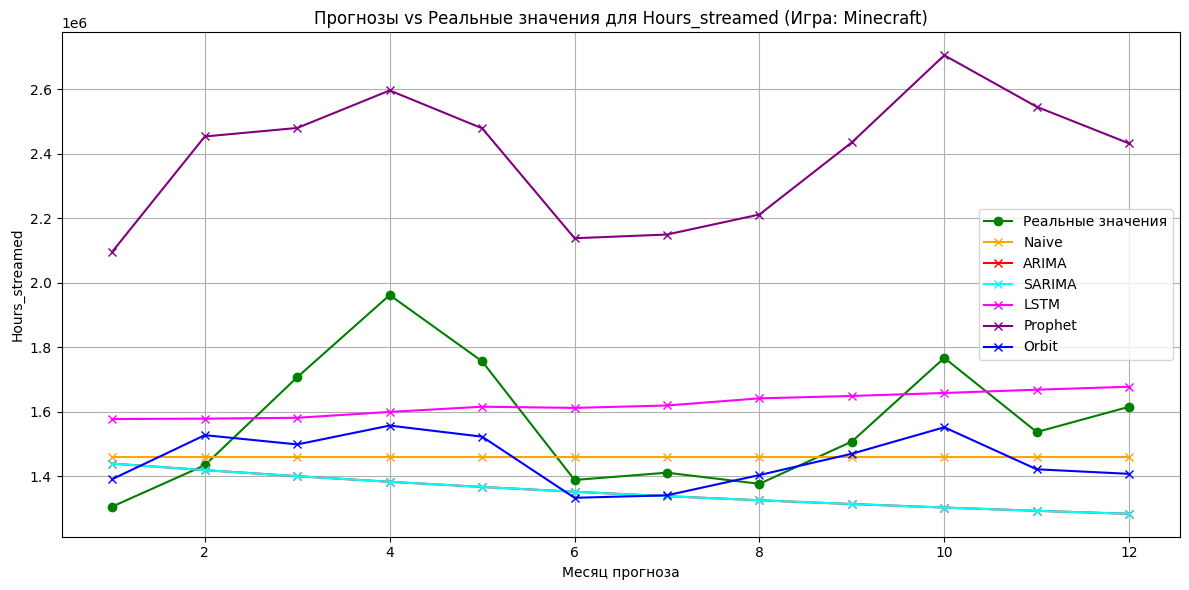

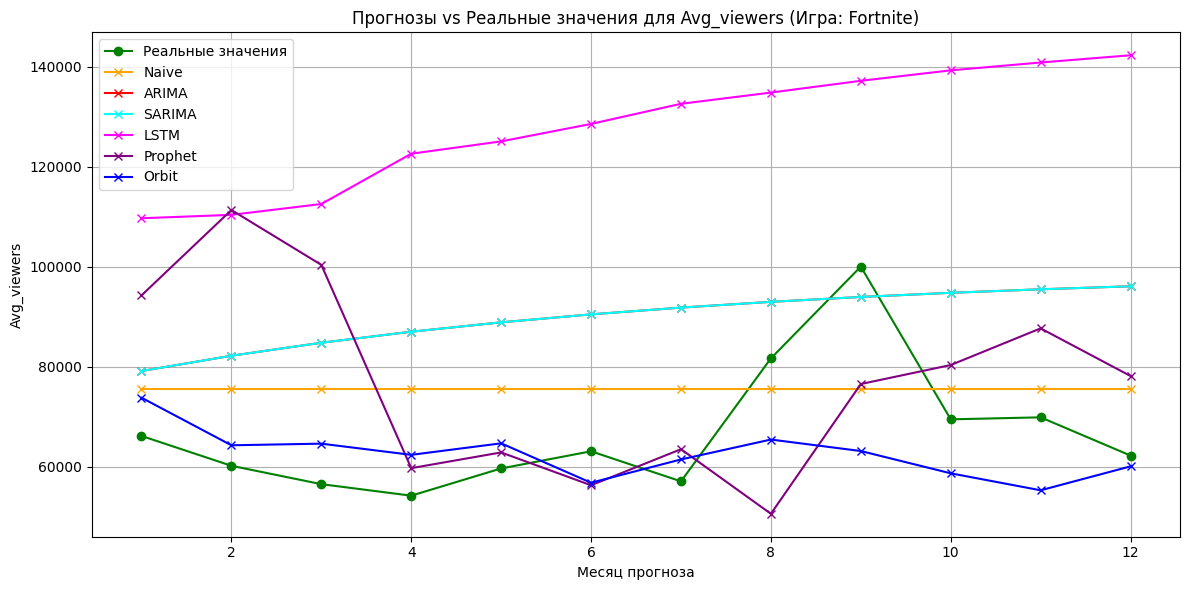

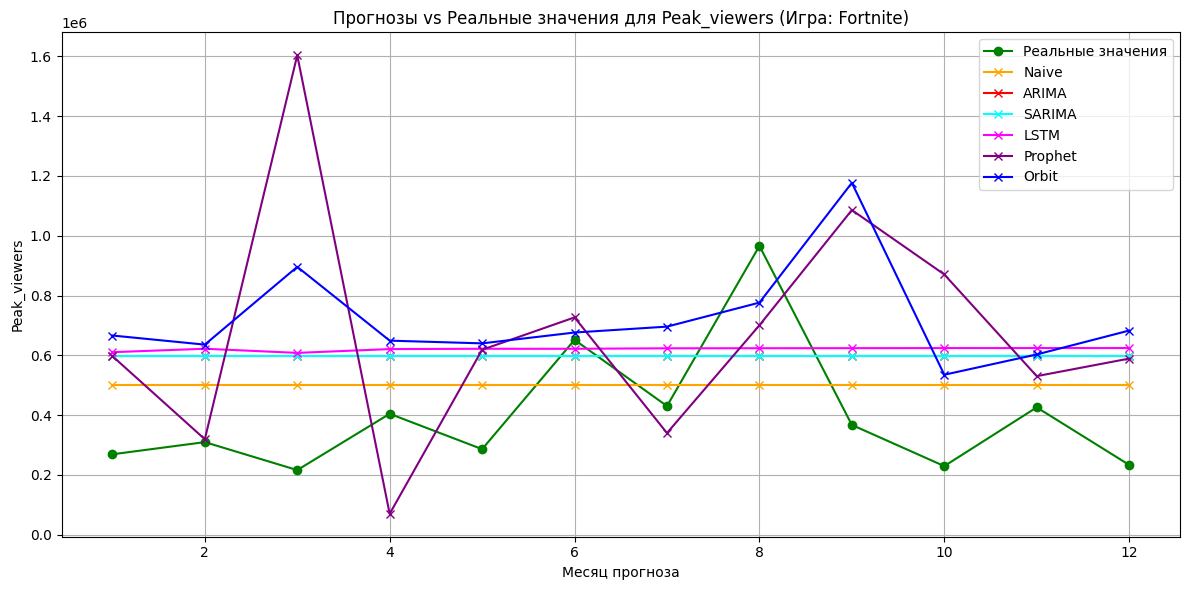

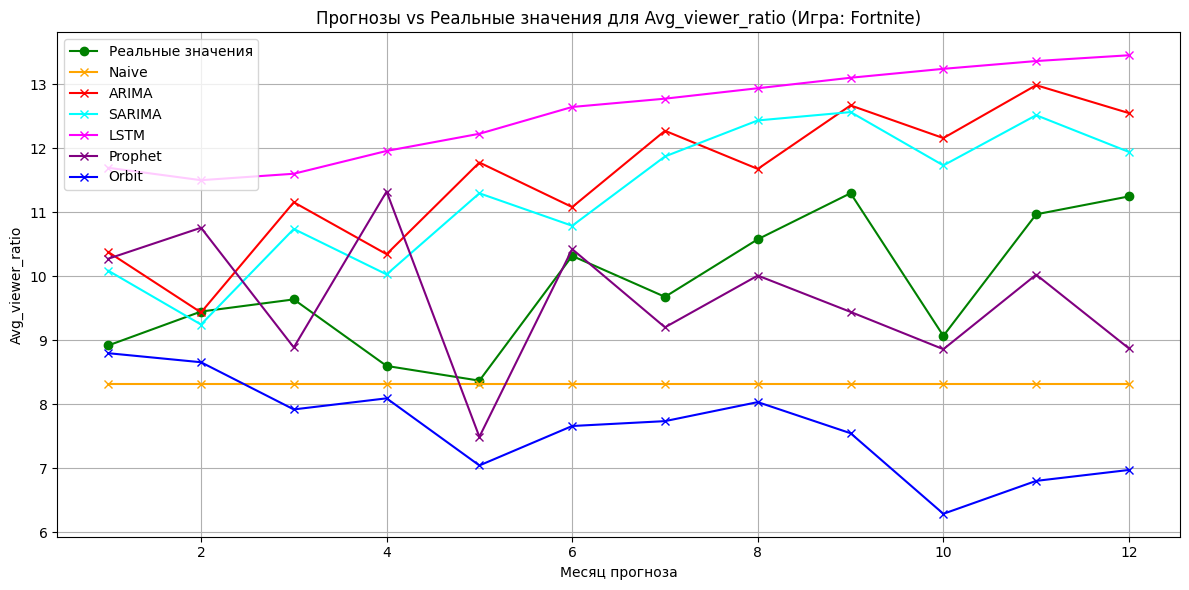

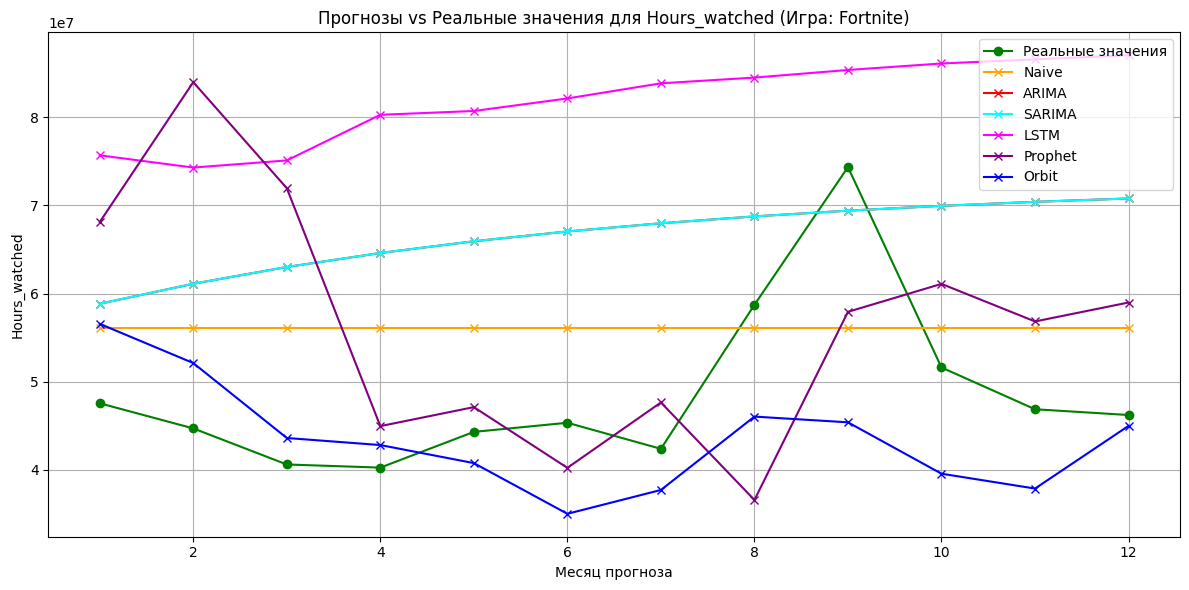

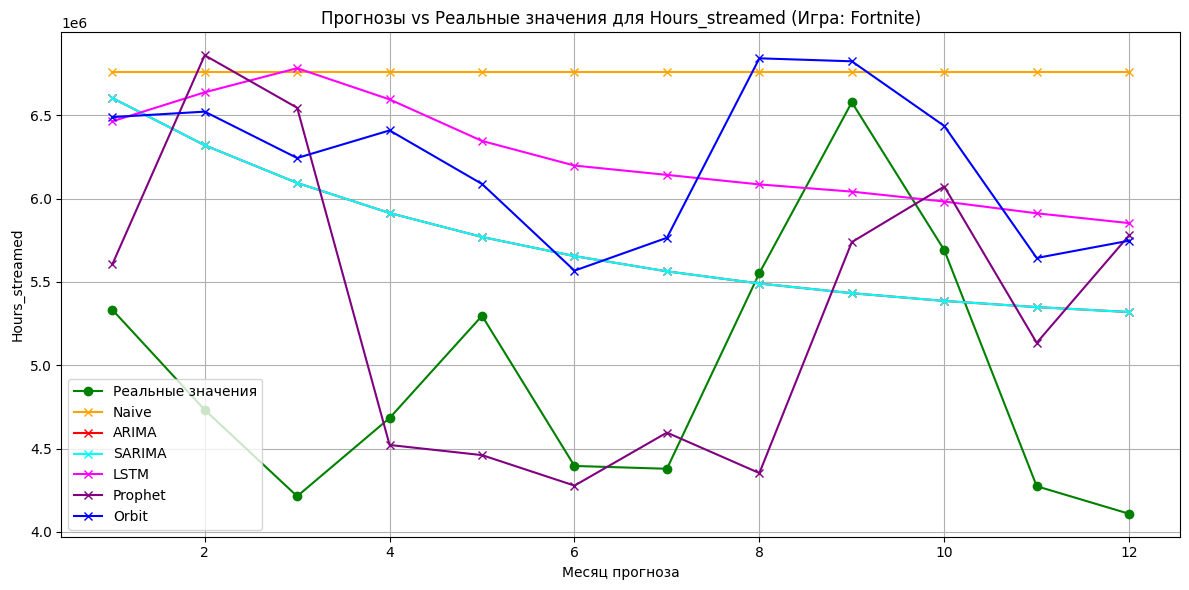

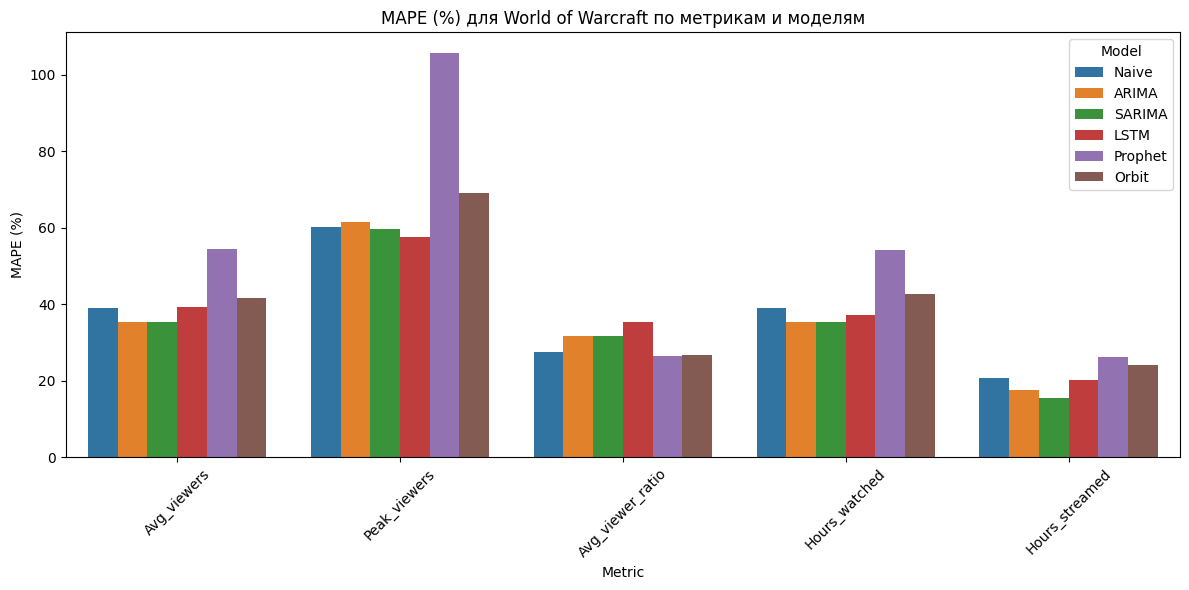

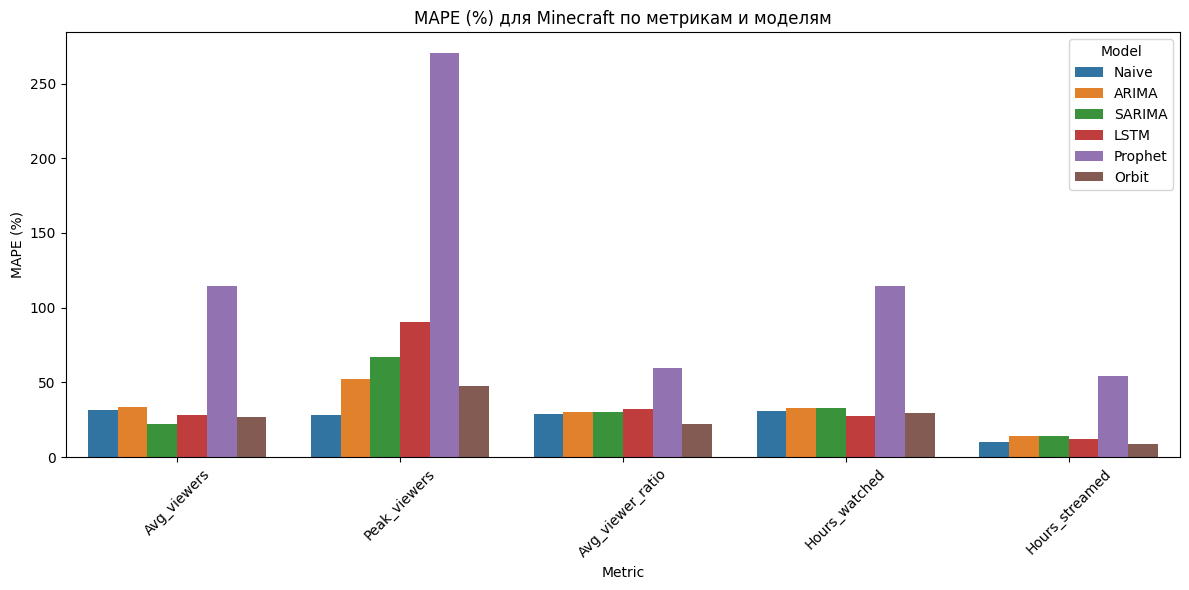

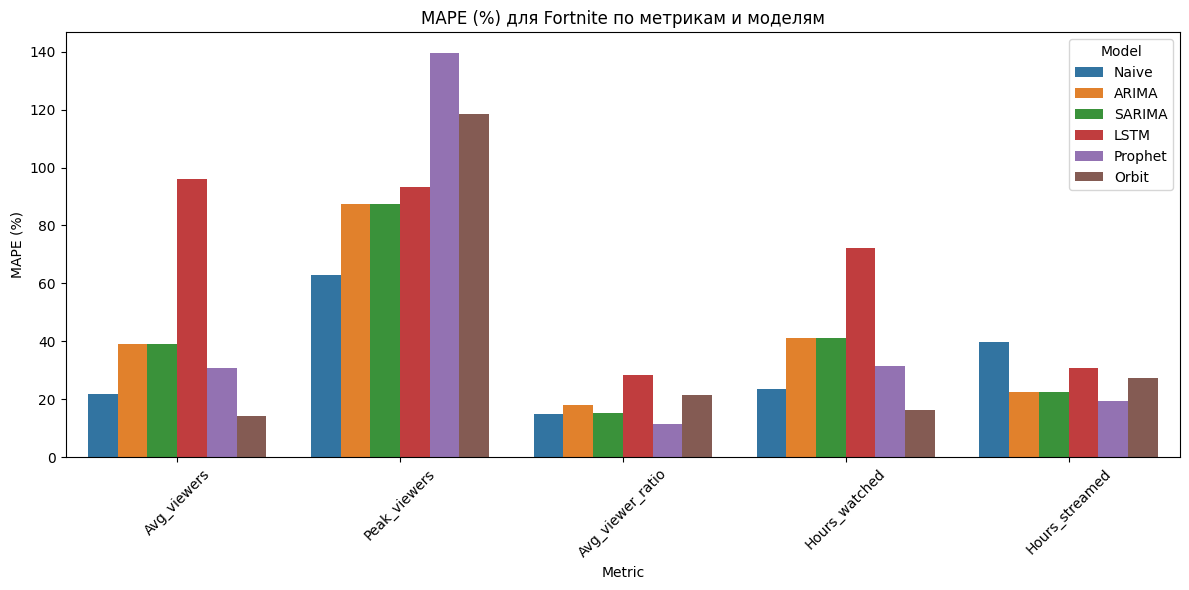

In [ ]:
from pmdarima import auto_arima
# game_example = 'Counter-Strike'
# game_data = df_top[df_top['Game'] == game_example].set_index('ds')

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled = df.copy()
# for metric in targets:
#     df_scaled[metric] = scaler.fit_transform(df_scaled[[metric]]).flatten()

game_metrics = df.groupby('Game')['Avg_viewers'].mean().sort_values(ascending=False)
#top_games = game_metrics.tail(2).index.tolist()
top_games = ['World of Warcraft', 'Minecraft', 'Fortnite']
print(f"Топ-3 игры: {top_games}")


# Функции для прогнозирования
def is_stationary(series, alpha=0.05):
    p = adfuller(series.dropna())[1]
    return p < alpha

def run_naive(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        prev_date = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            pred = [sub.loc[prev_date, metric]] * n_months if prev_date in sub.index else [np.nan] * n_months
            actual = sub.loc[last_n_dates, metric].values.tolist()
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    return pd.DataFrame(rows)

def run_arima(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            try:
                model = auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, d=0, max_d=2,
                                   seasonal=False, trace=False, suppress_warnings=True, stepwise=True)
                model_fit = model.fit(train)
                pred = model_fit.predict(n_periods=n_months).tolist()
            except Exception as e:
                print(f"ARIMA failed for {game}, {metric}: {e}")
                pred = [np.nan] * n_months
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_sarima(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            try:
                model = auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, d=0, max_d=2,
                                   seasonal=True, m=12, start_P=0, start_Q=0, max_P=2, max_Q=2,
                                   trace=False, suppress_warnings=True, stepwise=True)
                model_fit = model.fit(train)
                pred = model_fit.predict(n_periods=n_months).tolist()
            except Exception as e:
                print(f"SARIMA failed for {game}, {metric}: {e}")
                pred = [np.nan] * n_months
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def run_lstm(df, targets, top_games, seq_lengths=[3, 5, 7], epochs=20, batch_size=32):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < max(seq_lengths) + 1:
                print(f"Not enough data for LSTM for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                scaler = MinMaxScaler()
                y_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
                best_pred = [np.nan] * n_months
                best_loss = np.inf
                for seq_length in seq_lengths:
                    X_train_seq, y_train_seq = create_sequences(y_scaled, seq_length)
                    if len(X_train_seq) == 0:
                        continue
                    model = Sequential([
                        LSTM(50, activation='tanh', input_shape=(seq_length, 1), return_sequences=False),
                        Dense(1)
                    ])
                    model.compile(optimizer='adam', loss='mse')
                    model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=0)
                    pred_scaled = []
                    current_seq = y_scaled[-seq_length:].copy()
                    for _ in range(n_months):
                        X_pred = np.array([current_seq])
                        next_pred = model.predict(X_pred, verbose=0)
                        pred_scaled.append(next_pred[0, 0])
                        current_seq = np.vstack((current_seq[1:], next_pred))
                    pred = scaler.inverse_transform(np.array(pred_scaled).reshape(-1, 1)).flatten().tolist()
                    val_loss = model.evaluate(X_train_seq, y_train_seq, verbose=0)
                    if val_loss < best_loss:
                        best_loss = val_loss
                        best_pred = pred
                row[f'{metric}_pred'] = best_pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_prophet(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < 2:
                print(f"Not enough data for Prophet for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                prophet_df = pd.DataFrame({'ds': train.index, 'y': train.values})
                model = Prophet(yearly_seasonality=True, interval_width = 0.95 , daily_seasonality = True)
                model.fit(prophet_df)
                future = model.make_future_dataframe(periods=n_months, freq='MS')
                forecast = model.predict(future)
                pred = forecast['yhat'].iloc[-n_months:].values.tolist()
                pred = [max(0, p) if metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed'] else p for p in pred]
                row[f'{metric}_pred'] = pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_orbit(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < 2:
                print(f"Not enough data for Orbit for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                orbit_df = pd.DataFrame({'date': train.index, 'y': train.values})
                lgt = LGT(response_col='y', date_col='date', seasonality=12)
                lgt.fit(orbit_df)
                future_dates = pd.date_range(start=train.index[-1], periods=n_months + 1, freq='MS')[1:]
                future_df = pd.DataFrame({'date': future_dates})
                forecast = lgt.predict(future_df)
                pred = forecast['prediction'].values.tolist()
                pred = [max(0, p) if metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed'] else p for p in pred]
                row[f'{metric}_pred'] = pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

# Обработка данных и метрики
def preprocess_df(df, targets):
    rows = []
    for idx, row in df.iterrows():
        game = row['Game']
        for metric in targets:
            pred_col = f'{metric}_pred'
            test_col = f'{metric}_test'
            pred_values = row[pred_col]
            test_values = row[test_col]
            if not isinstance(pred_values, (list, np.ndarray)) or not isinstance(test_values, (list, np.ndarray)):
                continue
            min_length = min(len(pred_values), len(test_values))
            pred_values = pred_values[:min_length]
            test_values = test_values[:min_length]
            for month, (pred, test) in enumerate(zip(pred_values, test_values), 1):
                rows.append({
                    'Game': game,
                    'Month': month,
                    f'{metric}_pred': float(pred) if pd.notna(pred) else np.nan,
                    f'{metric}_test': float(test) if pd.notna(test) else np.nan
                })
    return pd.DataFrame(rows)

def evaluate_metrics(df, targets):
    results = []
    for game in df['Game'].unique():
        sub_game = df[df['Game'] == game]
        for metric in targets:
            pred_col = f'{metric}_pred'
            test_col = f'{metric}_test'
            y_true = sub_game[test_col]
            y_pred = sub_game[pred_col]
            mask = (~y_true.isna()) & (~y_pred.isna())
            y_true = y_true[mask]
            y_pred = y_pred[mask]
            if len(y_true) == 0:
                continue
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            mape = np.nan
            if not (y_true == 0).any():
                mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            results.append({
                'Game': game,
                'Metric': metric,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE (%)': mape,
                'R2': r2
            })
    return pd.DataFrame(results)

# Визуализация
def plot_forecast_vs_actual(df, df_models, model_names, targets, game):
    df_processed = preprocess_df(df_models[0], targets)
    for metric in targets:
        plt.figure(figsize=(12, 6))
        sub = df_processed[df_processed['Game'] == game]
        plt.plot(sub['Month'], sub[f'{metric}_test'], label='Реальные значения', marker='o', color='green')
        colors = ['orange', 'red', 'cyan', 'magenta', 'purple', 'blue']
        for df_model, model_name, color in zip(df_models, model_names, colors):
            df_proc = preprocess_df(df_model, targets)
            sub_model = df_proc[df_proc['Game'] == game]
            plt.plot(sub_model['Month'], sub_model[f'{metric}_pred'], label=model_name, marker='x', color=color)
        plt.title(f'Прогнозы vs Реальные значения для {metric} (Игра: {game})')
        plt.xlabel('Месяц прогноза')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_metrics(metrics_dfs, model_names):
    combined_metrics = []
    for model_name, metrics_df in zip(model_names, metrics_dfs):
        metrics_df['Model'] = model_name
        combined_metrics.append(metrics_df)
    combined_metrics = pd.concat(combined_metrics)
    for game in combined_metrics['Game'].unique():
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Metric', y='MAPE (%)', hue='Model', data=combined_metrics[combined_metrics['Game'] == game])
        plt.title(f'MAPE (%) для {game} по метрикам и моделям')
        plt.xticks(rotation=45)
        plt.ylabel('MAPE (%)')
        plt.tight_layout()
        plt.show()

# Применение
df_naive = run_naive(df, targets, top_games)
df_arima = run_arima(df, targets, top_games)
df_sarima = run_sarima(df, targets, top_games)
df_lstm = run_lstm(df, targets, top_games)
df_prophet = run_prophet(df, targets, top_games)
df_orbit = run_orbit(df, targets, top_games)

df_models = [df_naive, df_arima, df_sarima, df_lstm, df_prophet, df_orbit]
model_names = ['Naive', 'ARIMA', 'SARIMA', 'LSTM', 'Prophet', 'Orbit']

# Вычисление метрик
metrics_dfs = [evaluate_metrics(preprocess_df(df_model, targets), targets) for df_model in df_models]
for model_name, metrics_df in zip(model_names, metrics_dfs):
    print(f"Метрики для {model_name}:")
    print(metrics_df)

# Визуализация
for game in top_games:
    plot_forecast_vs_actual(df, df_models, model_names, targets, game)
plot_metrics(metrics_dfs, model_names)

In [ ]:
def preprocess_df(df, targets):
    rows = []
    for idx, row in df.iterrows():
        game = row['Game']
        for metric in targets:
            pred_col = f'{metric}_pred'
            test_col = f'{metric}_test'
            pred_values = row[pred_col]
            test_values = row[test_col]
            if not isinstance(pred_values, (list, np.ndarray)) or not isinstance(test_values, (list, np.ndarray)):
                continue
            min_length = min(len(pred_values), len(test_values))
            pred_values = pred_values[:min_length]
            test_values = test_values[:min_length]
            for month, (pred, test) in enumerate(zip(pred_values, test_values), 1):
                rows.append({
                    'Game': game,
                    'Month': month,
                    f'{metric}_pred': float(pred) if pd.notna(pred) else np.nan,
                    f'{metric}_test': float(test) if pd.notna(test) else np.nan
                })
    return pd.DataFrame(rows)

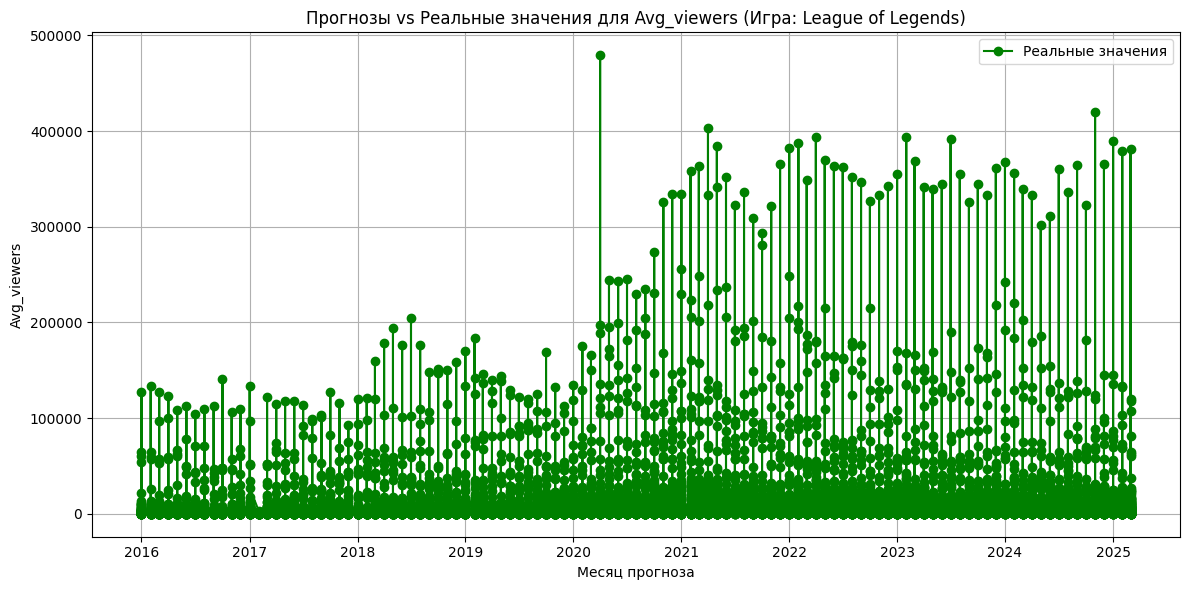

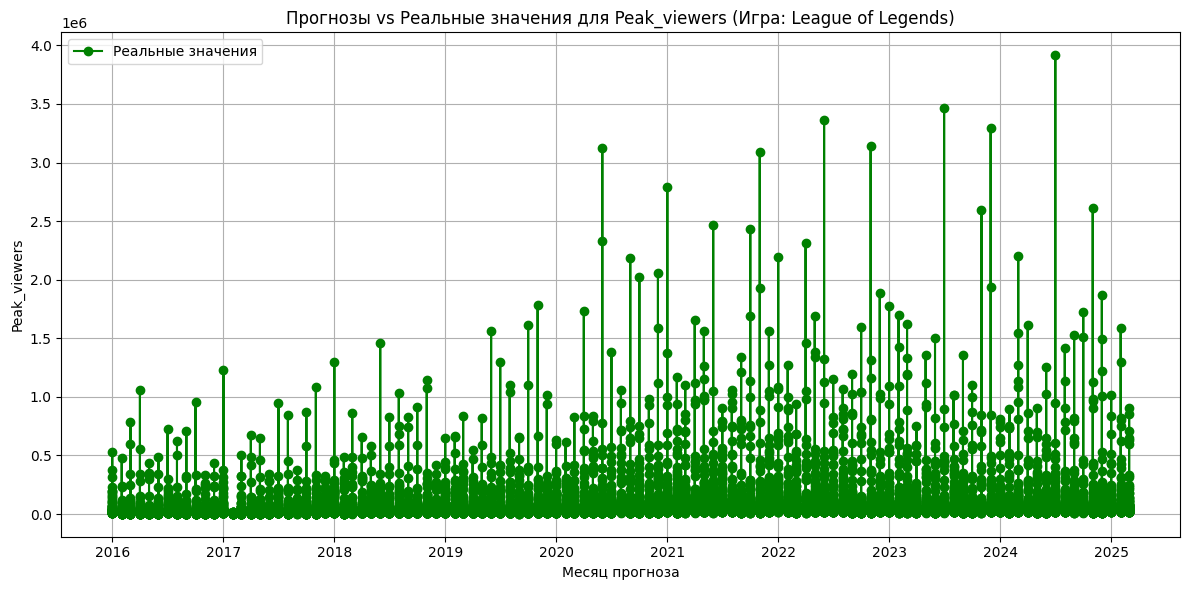

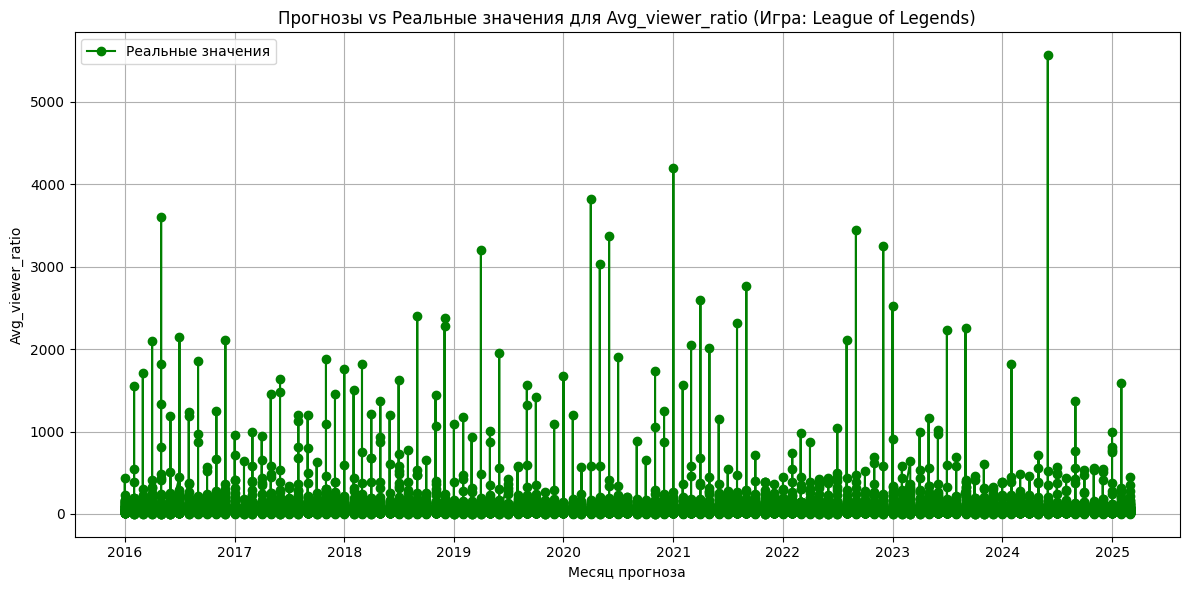

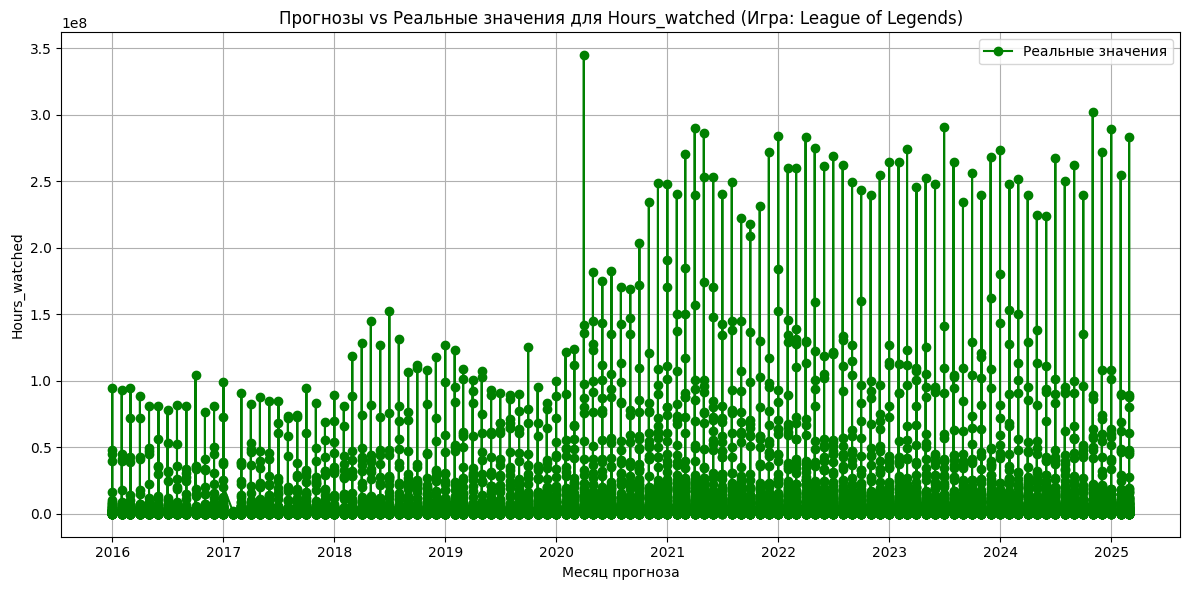

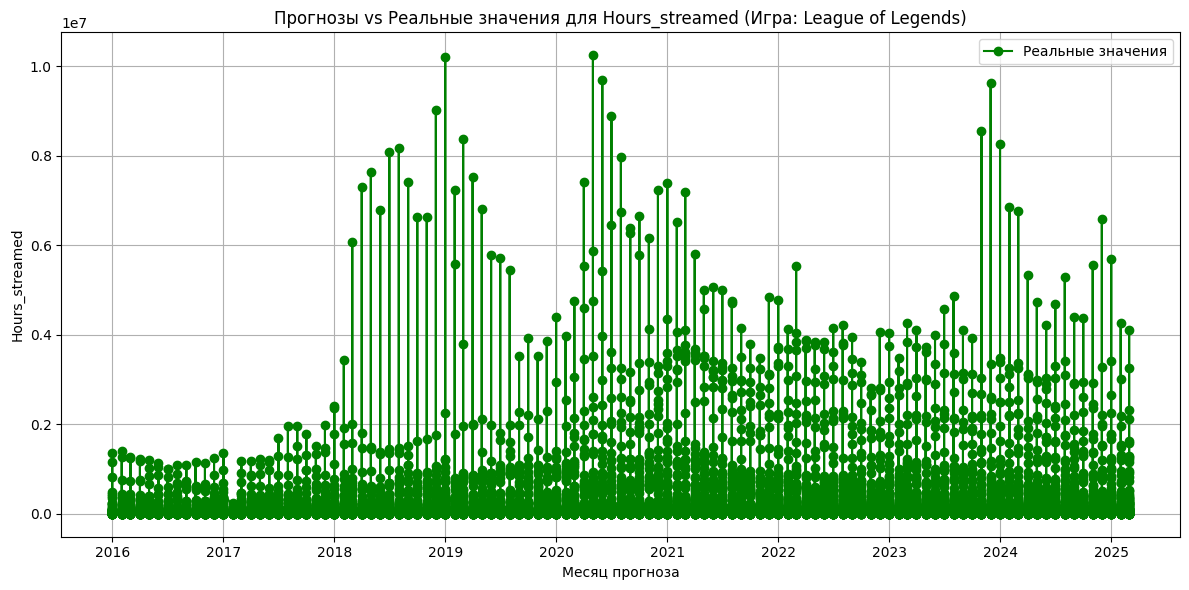

In [ ]:
for metric in targets:
   plt.figure(figsize=(12, 6))
   sub = df[df['Game'] == 'League of Legends']
   plt.plot(df['ds'], df[f'{metric}'], label='Реальные значения', marker='o', color='green')
   colors = ['orange', 'red', 'cyan', 'magenta', 'purple', 'blue']
   plt.title(f'Прогнозы vs Реальные значения для {metric} (Игра: League of Legends)')
   plt.xlabel('Месяц прогноза')
   plt.ylabel(metric)
   plt.legend()
   plt.grid(True)
   plt.tight_layout()
   plt.show()

Топ-3 игры: ['League of Legends', 'Minecraft', 'Just Chatting']
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2621.058, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2344.566, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2559.702, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2330.434, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2302.849, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2301.854, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2302.947, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2551.527, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2301.473, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2296.952, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2295.365, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2296.976, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AI

2025-05-08 07:22:22 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:24 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:26 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:29 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:32 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:35 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:36 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:39 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:41 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:43 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:46 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:48 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:50 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2025-05-08 07:22:53 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
Метрики для Naive:
                 Game            Metric          RMSE           MAE  \
0   League of Legends       Avg_viewers  2.827241e+04  2.469433e+04   
1   League of Legends      Peak_viewers  5.944761e+05  4.262006e+05   
2   League of Legends  Avg_viewer_ratio  9.063526e+00  6.823333e+00   
3   League of Legends     Hours_watched  2.256055e+07  2.019553e+07   
4   League of Legends    Hours_streamed  3.534918e+05  3.222628e+05   
5           Minecraft       Avg_viewers  2.456262e+04  1.800075e+04   
6           Minecraft      Peak_viewers  2.366074e+05  1.188994e+05   
7           Minecraft  Avg_viewer_ratio  1.227653e+01  8.245833e+00   
8           Minecraft

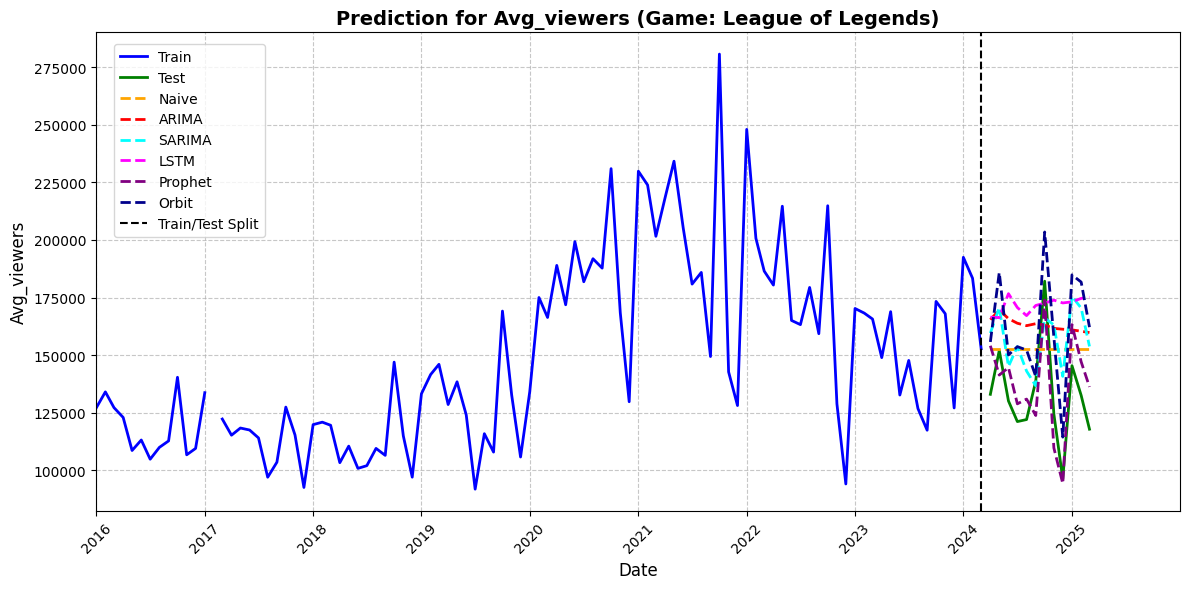

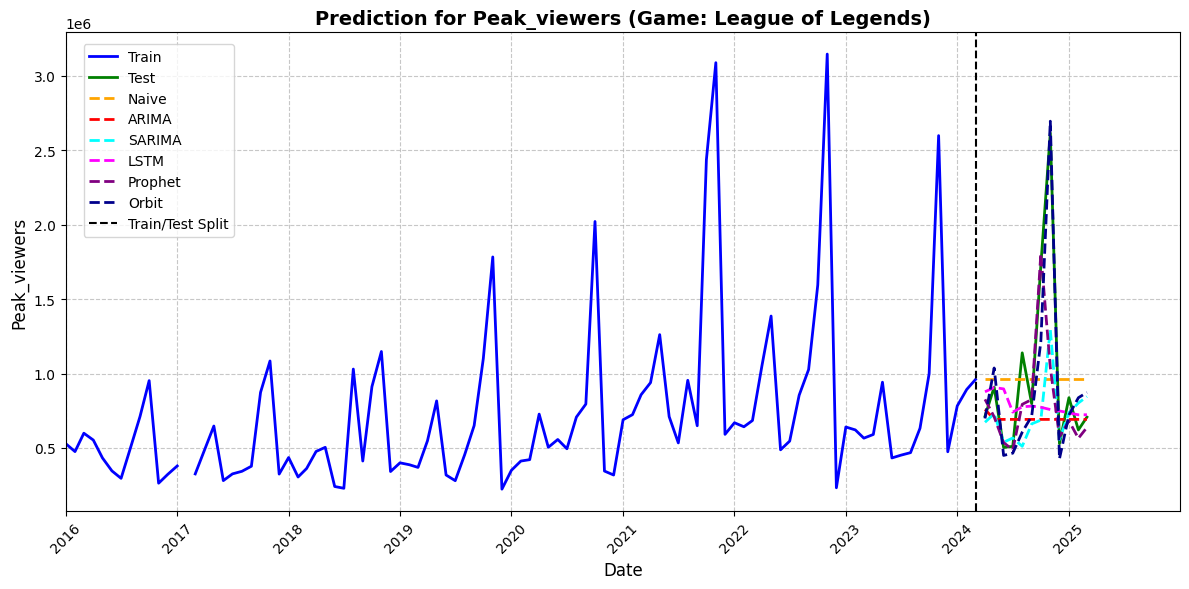

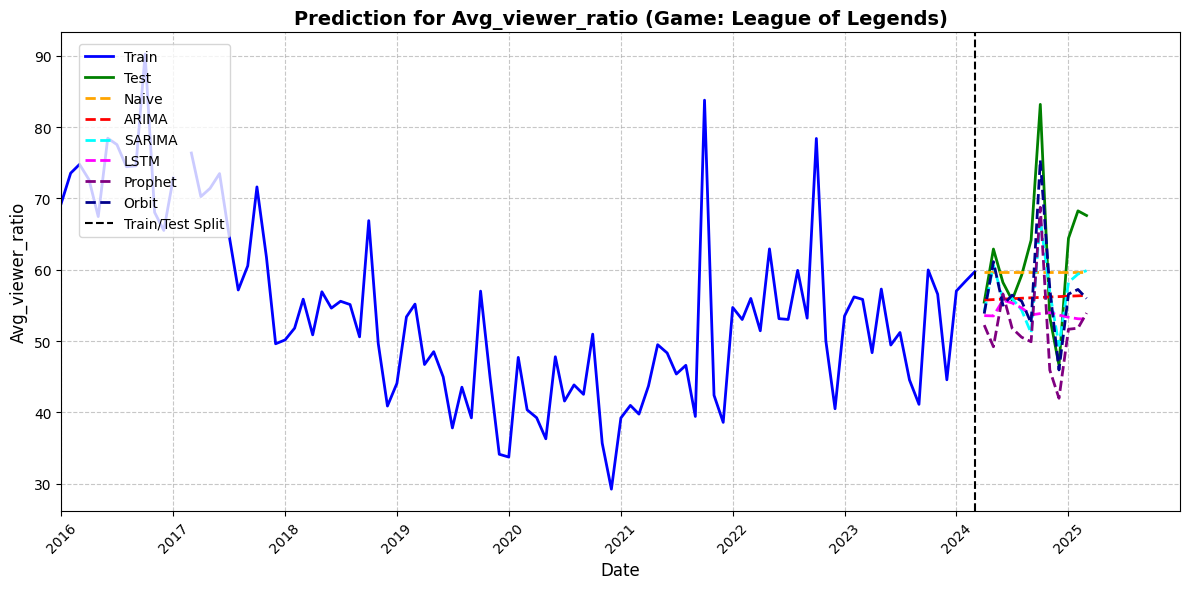

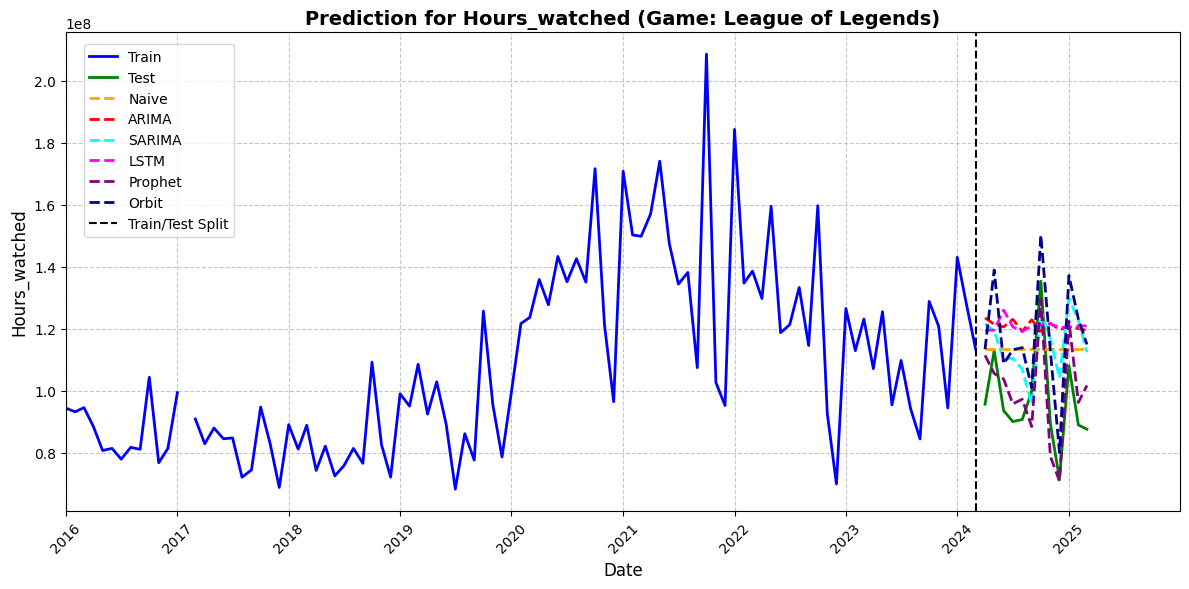

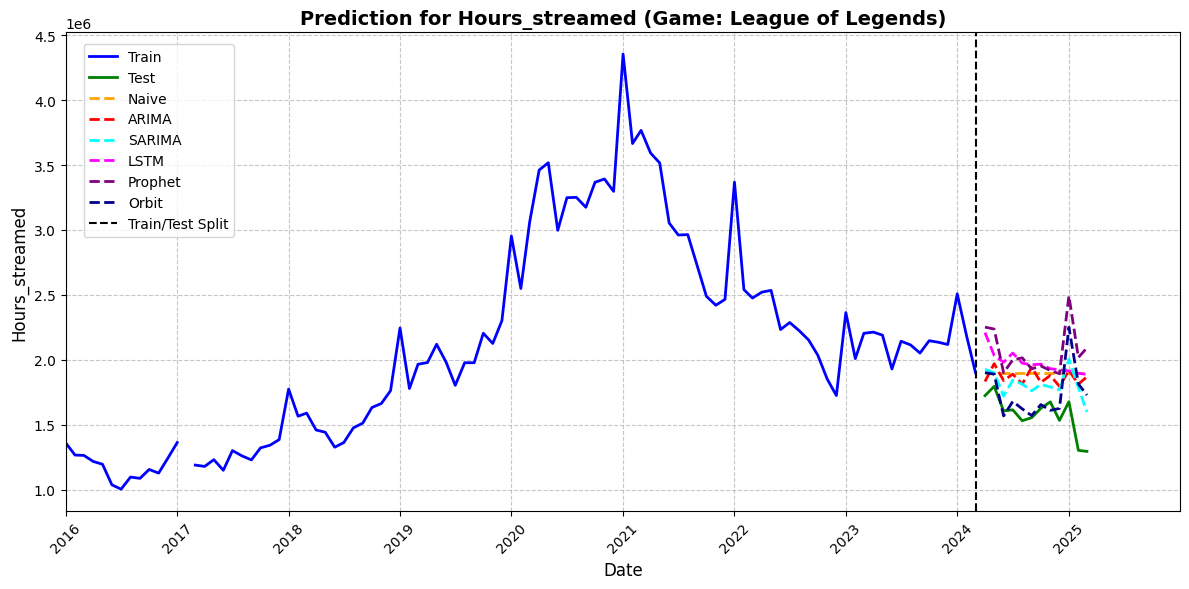

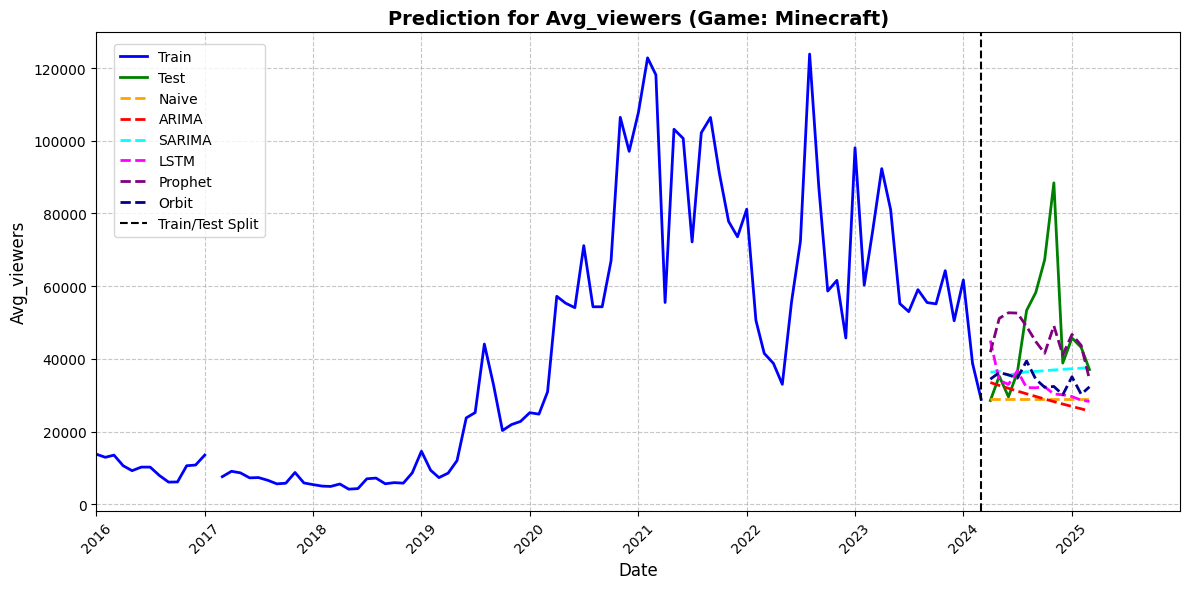

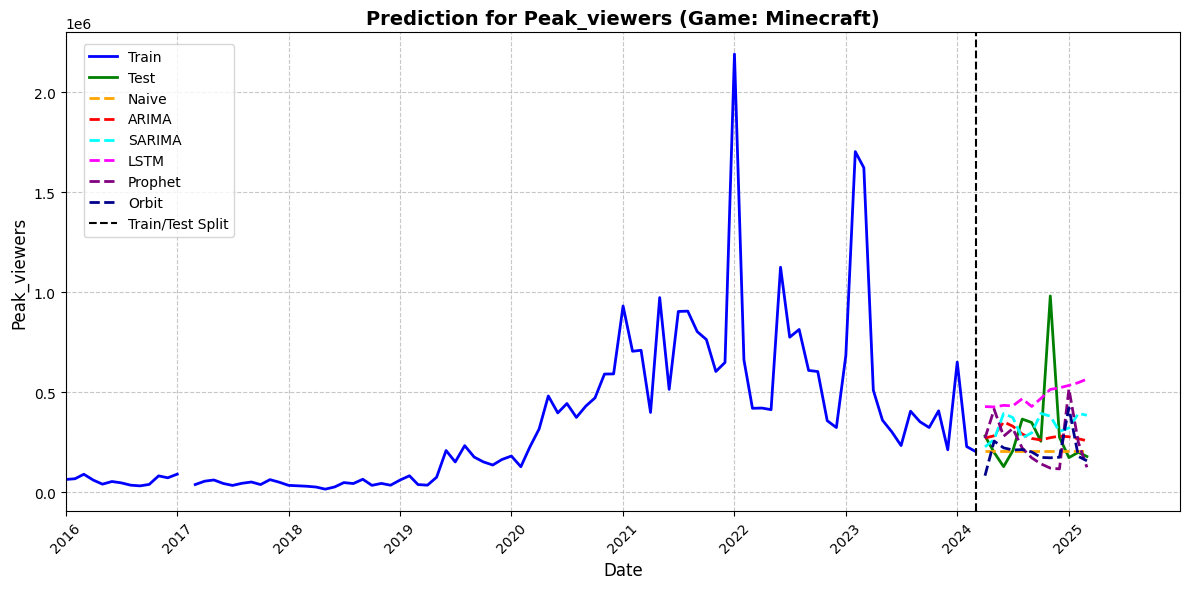

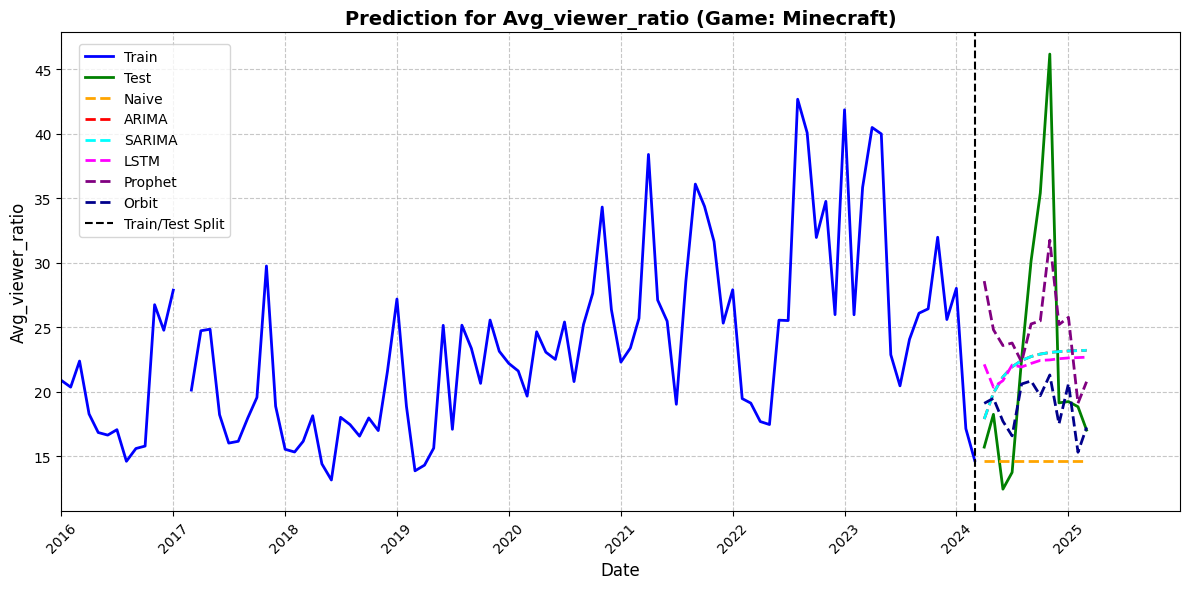

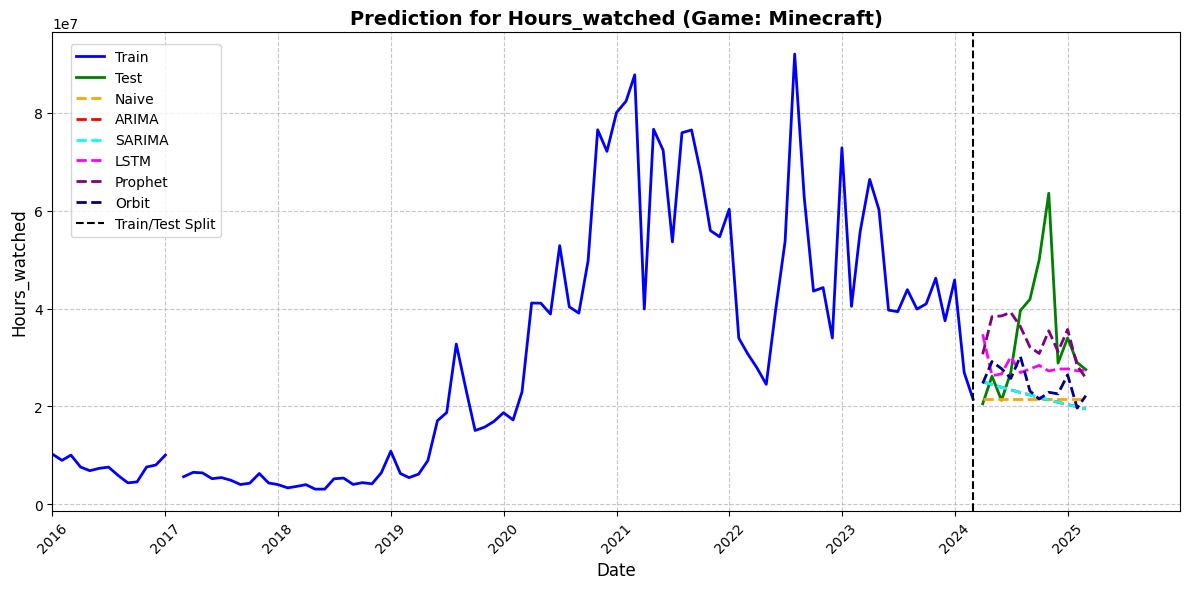

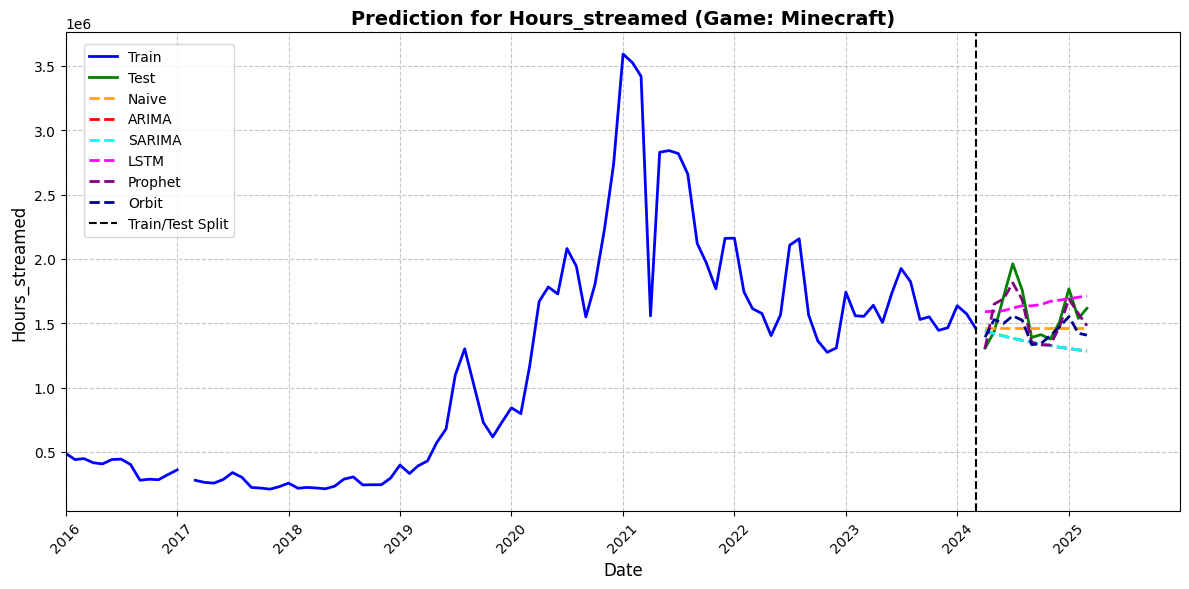

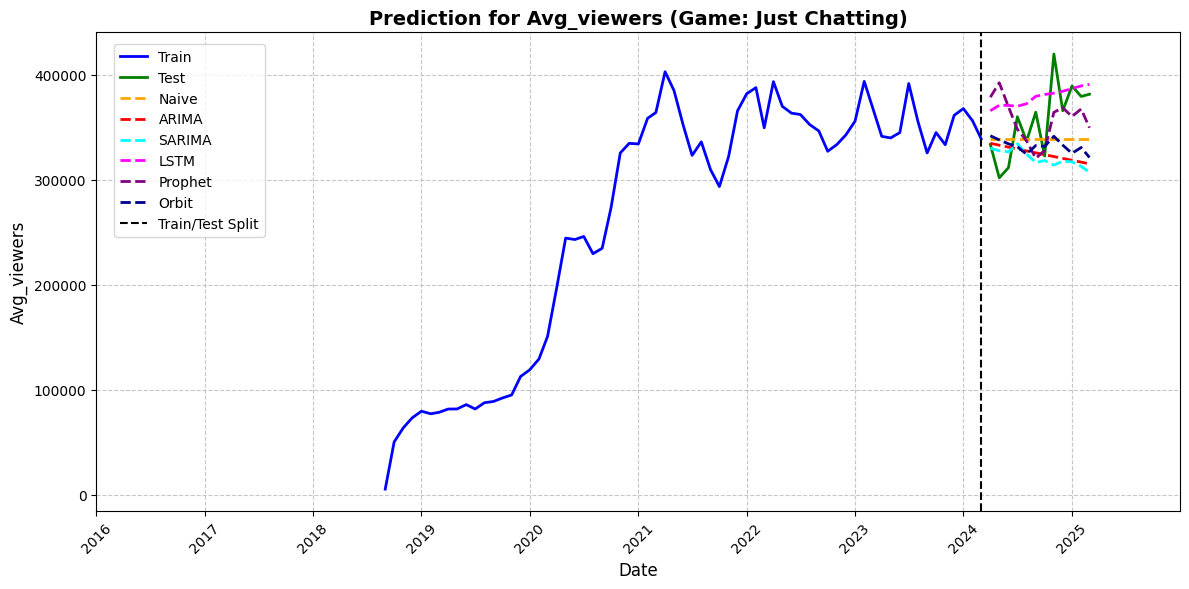

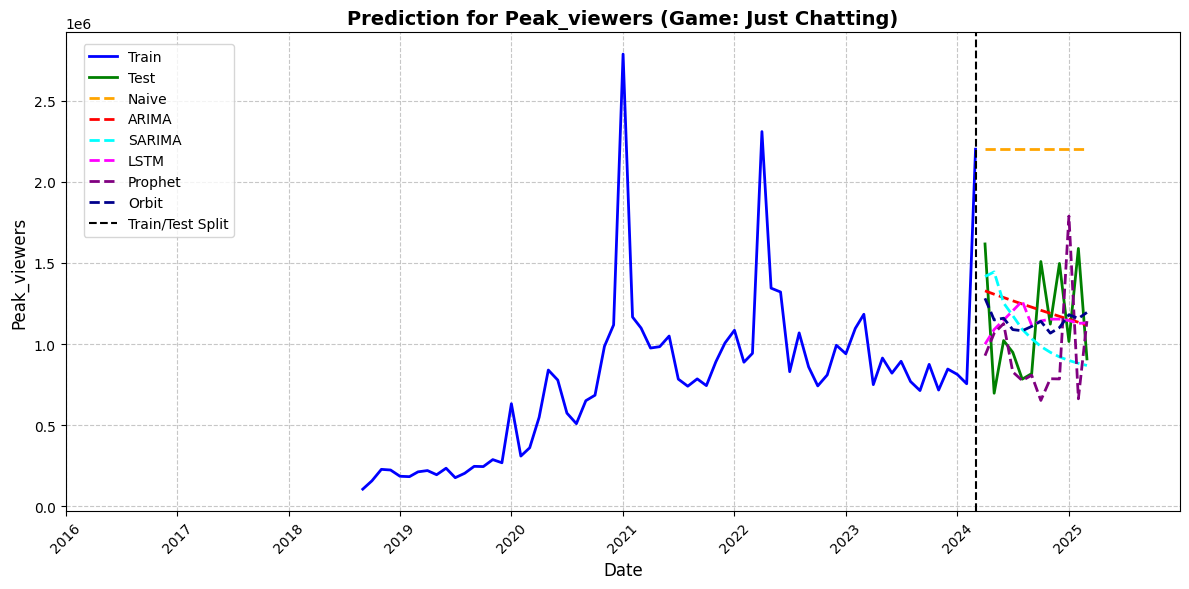

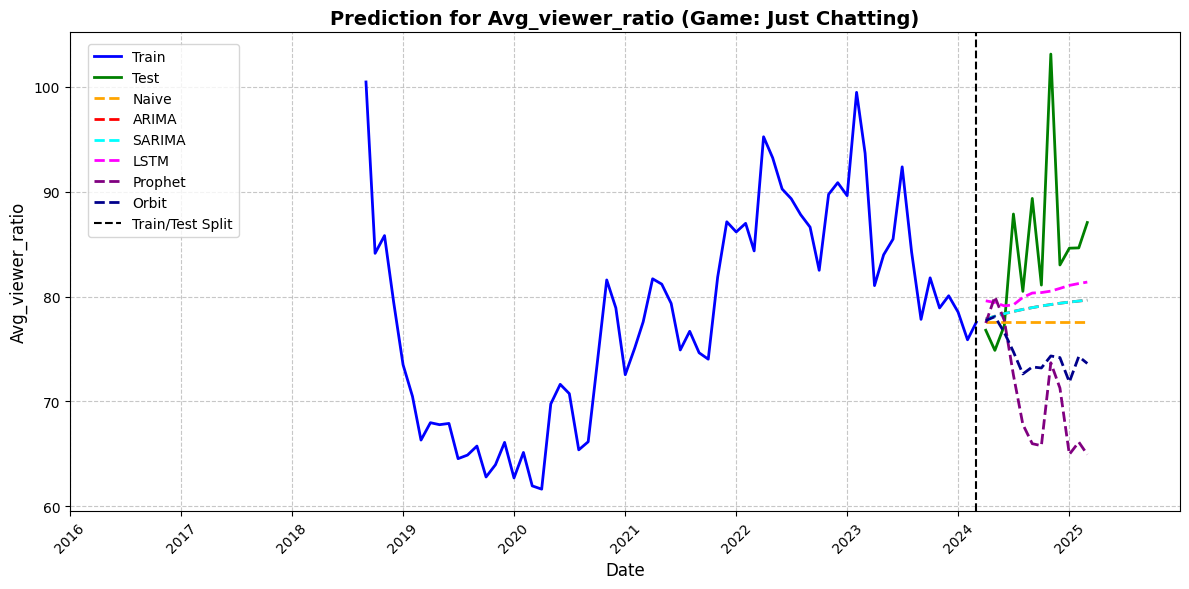

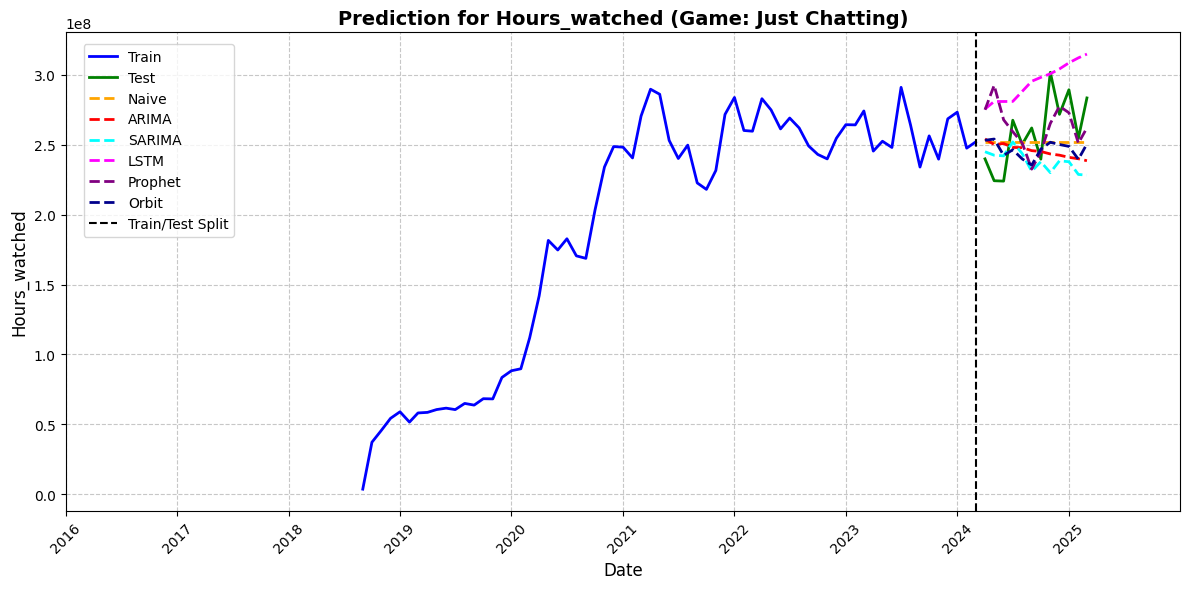

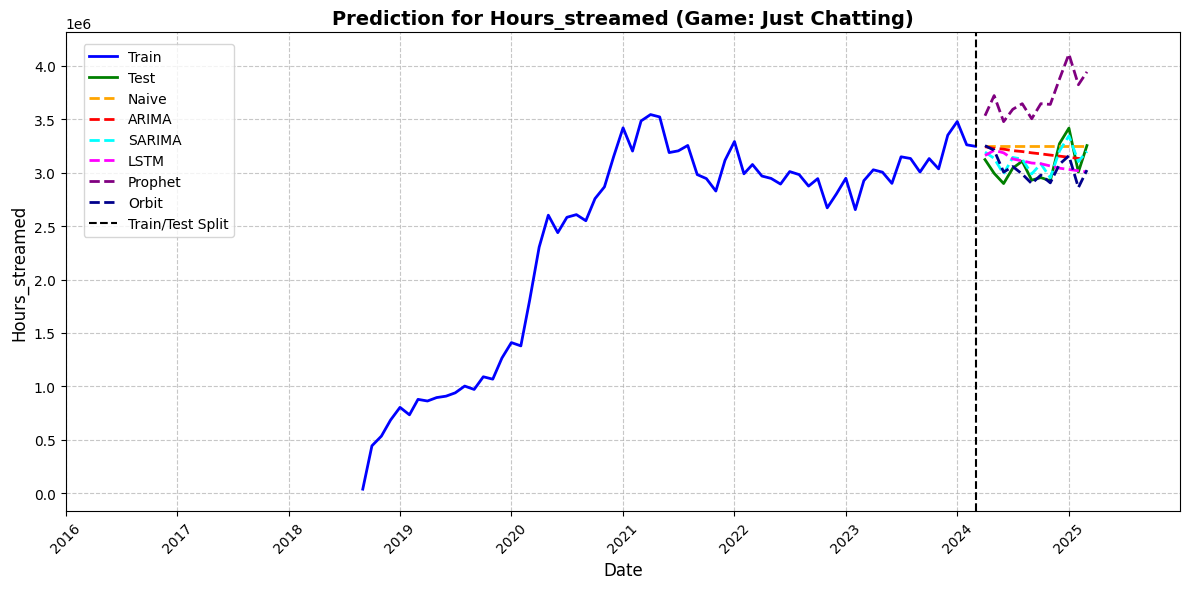

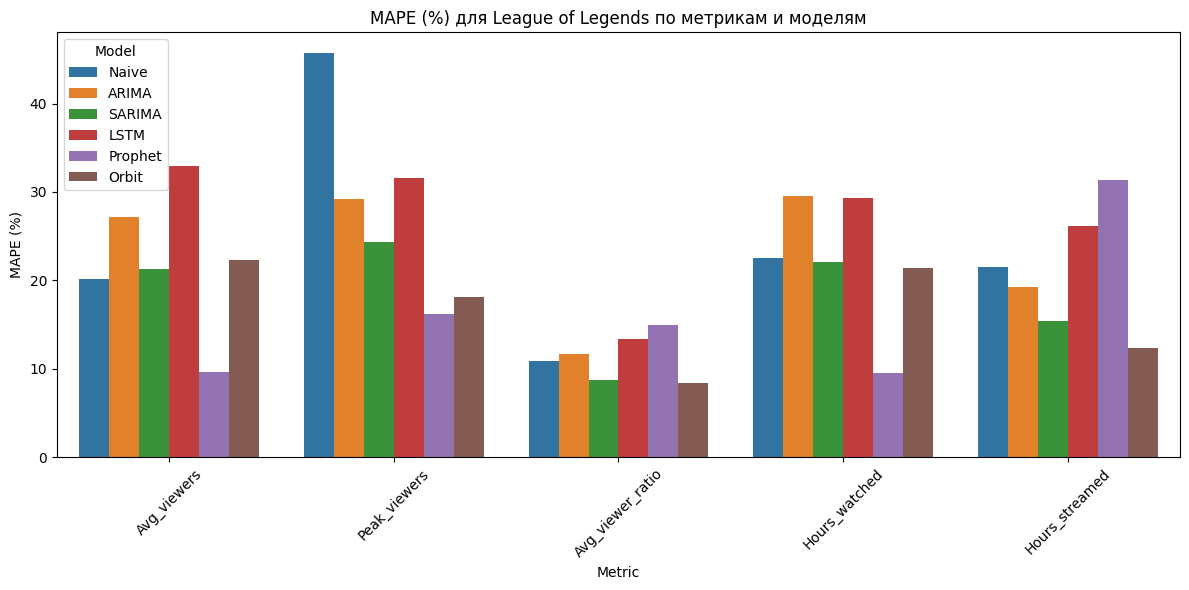

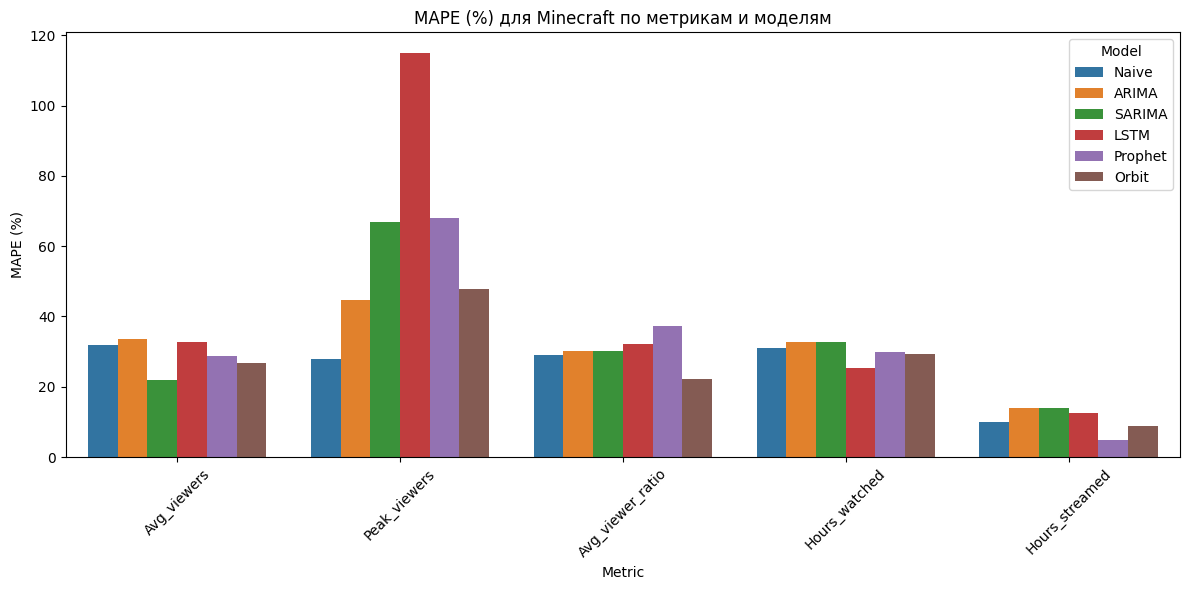

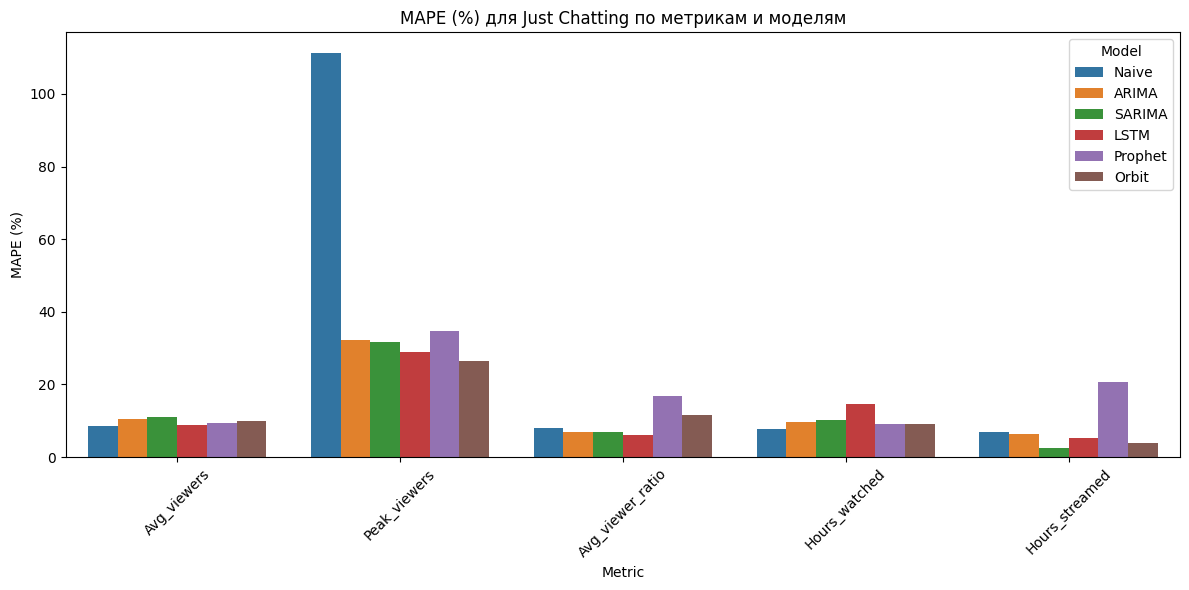

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from prophet import Prophet
from orbit.models import LGT
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
from matplotlib.dates import DateFormatter

targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
df = df.copy()
# Выбор трёх топовых игр
top_games = ['League of Legends', 'Minecraft', 'Just Chatting']
print(f"Топ-3 игры: {top_games}")

# Функции для прогнозирования
def is_stationary(series, alpha=0.05):
    p = adfuller(series.dropna())[1]
    return p < alpha

def run_naive(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        prev_date = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            pred = [sub.loc[prev_date, metric]] * n_months if prev_date in sub.index else [np.nan] * n_months
            actual = sub.loc[last_n_dates, metric].values.tolist()
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    return pd.DataFrame(rows)

def run_arima(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            try:
                model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, d=0, max_d=2,
                                   seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
                model_fit = model.fit(train)
                pred = model_fit.predict(n_periods=n_months).tolist()
            except Exception as e:
                print(f"ARIMA failed for {game}, {metric}: {e}")
                pred = [np.nan] * n_months
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_sarima(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            try:
                model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, d=0, max_d=2,
                   seasonal=True, m=12, start_P=0, start_Q=0, max_P=2, max_Q=2,
                   trace=True, suppress_warnings=True, stepwise=True)
                model_fit = model.fit(train)
                pred = model_fit.predict(n_periods=n_months).tolist()
            except Exception as e:
                print(f"SARIMA failed for {game}, {metric}: {e}")
                pred = [np.nan] * n_months
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def run_lstm(df, targets, top_games, seq_lengths=[3, 5, 7], epochs=20, batch_size=32):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < max(seq_lengths) + 1:
                print(f"Not enough data for LSTM for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                scaler = MinMaxScaler()
                y_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
                best_pred = [np.nan] * n_months
                best_loss = np.inf
                for seq_length in seq_lengths:
                    X_train_seq, y_train_seq = create_sequences(y_scaled, seq_length)
                    if len(X_train_seq) == 0:
                        continue
                    model = Sequential([
                                          LSTM(100, activation='tanh', input_shape=(seq_length, 1), return_sequences=True),
                                          LSTM(50, activation='tanh'),
                                          Dense(1)
                                      ])
                    model.compile(optimizer='adam', loss='mse')
                    model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=0)
                    pred_scaled = []
                    current_seq = y_scaled[-seq_length:].copy()
                    for _ in range(n_months):
                        X_pred = np.array([current_seq])
                        next_pred = model.predict(X_pred, verbose=0)
                        pred_scaled.append(next_pred[0, 0])
                        current_seq = np.vstack((current_seq[1:], next_pred))
                    pred = scaler.inverse_transform(np.array(pred_scaled).reshape(-1, 1)).flatten().tolist()
                    val_loss = model.evaluate(X_train_seq, y_train_seq, verbose=0)
                    if val_loss < best_loss:
                        best_loss = val_loss
                        best_pred = pred
                row[f'{metric}_pred'] = best_pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_prophet(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < 2:
                print(f"Not enough data for Prophet for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                prophet_df = pd.DataFrame({'ds': train.index, 'y': train.values})
                model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False,
                changepoint_prior_scale=0.5, seasonality_prior_scale=10.0)
                model.fit(prophet_df)
                future = model.make_future_dataframe(periods=n_months, freq='MS')
                forecast = model.predict(future)
                pred = forecast['yhat'].iloc[-n_months:].values.tolist()
                pred = [max(0, p) if metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed'] else p for p in pred]
                row[f'{metric}_pred'] = pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def run_orbit(df, targets, top_games):
    rows = []
    for game in top_games:
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        if len(sub) < 7:
            continue
        n_months = min(len(sub) - 1, 12)
        last_n_dates = sub.index[-n_months:]
        train_end = sub.index[-n_months - 1]
        row = {'Game': game}
        for metric in targets:
            train = sub.loc[sub.index <= train_end, metric].dropna()
            test = sub.loc[last_n_dates, metric].values.tolist()
            if len(train) < 2:
                print(f"Not enough data for Orbit for {game}, {metric}")
                pred = [np.nan] * n_months
            else:
                orbit_df = pd.DataFrame({'date': train.index, 'y': train.values})
                lgt = LGT(response_col='y', date_col='date', seasonality=12)
                lgt.fit(orbit_df)
                future_dates = pd.date_range(start=train.index[-1], periods=n_months + 1, freq='MS')[1:]
                future_df = pd.DataFrame({'date': future_dates})
                forecast = lgt.predict(future_df)
                pred = forecast['prediction'].values.tolist()
                pred = [max(0, p) if metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed'] else p for p in pred]
                row[f'{metric}_pred'] = pred
                row[f'{metric}_test'] = test
        rows.append(row)
    return pd.DataFrame(rows)

def preprocess_df(df, targets):
    rows = []
    for idx, row in df.iterrows():
        game = row['Game']
        for metric in targets:
            pred_col = f'{metric}_pred'
            test_col = f'{metric}_test'
            pred_values = row[pred_col]
            test_values = row[test_col]
            if not isinstance(pred_values, (list, np.ndarray)) or not isinstance(test_values, (list, np.ndarray)):
                continue
            min_length = min(len(pred_values), len(test_values))
            pred_values = pred_values[:min_length]
            test_values = test_values[:min_length]
            for month, (pred, test) in enumerate(zip(pred_values, test_values), 1):
                rows.append({
                    'Game': game,
                    'Month': month,
                    f'{metric}_pred': float(pred) if pd.notna(pred) else np.nan,
                    f'{metric}_test': float(test) if pd.notna(test) else np.nan
                })
    return pd.DataFrame(rows)

def evaluate_metrics(df, targets):
    results = []
    for game in df['Game'].unique():
        sub_game = df[df['Game'] == game]
        for metric in targets:
            pred_col = f'{metric}_pred'
            test_col = f'{metric}_test'
            y_true = sub_game[test_col]
            y_pred = sub_game[pred_col]
            mask = (~y_true.isna()) & (~y_pred.isna())
            y_true = y_true[mask]
            y_pred = y_pred[mask]
            if len(y_true) == 0:
                continue
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            mape = np.nan
            if not (y_true == 0).any():
                mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            results.append({
                'Game': game,
                'Metric': metric,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE (%)': mape,
                'R2': r2
            })
    return pd.DataFrame(results)

# Визуализация
def plot_forecast_vs_actual(df, df_models, model_names, targets, game):
    for metric in targets:
        plt.figure(figsize=(12, 6))
        # Подготовка данных
        sub = df[df['Game'] == game].copy()
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        n_months = min(len(sub) - 1, 12)
        split_date = sub.index[-n_months - 1]
        train_data = sub.loc[sub.index <= split_date, metric]
        test_data = sub.loc[sub.index > split_date, metric]

        # График обучающей части
        plt.plot(train_data.index, train_data, label='Train', color='blue', linewidth=2)
        # График тестовой части
        plt.plot(test_data.index, test_data, label='Test', color='green', linewidth=2)

        # График предсказаний моделей
        colors = ['orange', 'red', 'cyan', 'magenta', 'purple', 'darkblue']
        for df_model, model_name, color in zip(df_models, model_names, colors):
            row = df_model[df_model['Game'] == game].iloc[0]
            pred = row[f'{metric}_pred']
            test_dates = sub.index[-n_months:]
            plt.plot(test_dates, pred, label=model_name, color=color, linestyle='--', linewidth=2)

        # Линия разделения Train/Test
        plt.axvline(x=split_date, color='black', linestyle='--', label='Train/Test Split')

        # Настройки графика
        plt.title(f'Prediction for {metric} (Game: {game})', fontsize=14, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=True)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Форматирование оси X
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
        plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2025-12-31'))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'forecast_{game}_{metric}.png')

def plot_metrics(metrics_dfs, model_names):
    combined_metrics = []
    for model_name, metrics_df in zip(model_names, metrics_dfs):
        metrics_df['Model'] = model_name
        combined_metrics.append(metrics_df)
    combined_metrics = pd.concat(combined_metrics)
    for game in combined_metrics['Game'].unique():
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Metric', y='MAPE (%)', hue='Model', data=combined_metrics[combined_metrics['Game'] == game])
        plt.title(f'MAPE (%) для {game} по метрикам и моделям')
        plt.xticks(rotation=45)
        plt.ylabel('MAPE (%)')
        plt.tight_layout()
        plt.savefig(f'metrics_{game}.png')

df_naive = run_naive(df, targets, top_games)
df_arima = run_arima(df, targets, top_games)
df_sarima = run_sarima(df, targets, top_games)
df_lstm = run_lstm(df, targets, top_games)
df_prophet = run_prophet(df, targets, top_games)
df_orbit = run_orbit(df, targets, top_games)

df_models = [df_naive, df_arima, df_sarima, df_lstm, df_prophet, df_orbit]
model_names = ['Naive', 'ARIMA', 'SARIMA', 'LSTM', 'Prophet', 'Orbit']

# Вычисление метрик
metrics_dfs = [evaluate_metrics(preprocess_df(df_model, targets), targets) for df_model in df_models]
for model_name, metrics_df in zip(model_names, metrics_dfs):
    print(f"Метрики для {model_name}:")
    print(metrics_df)

for game in top_games:
    plot_forecast_vs_actual(df, df_models, model_names, targets, game)
plot_metrics(metrics_dfs, model_names)

In [ ]:
df

ds                      Game  Rank  Hours_watched  \
0     2016-01-01               60 Seconds!   259        20466.0   
1     2016-01-01     ARK: Survival Evolved   272      1951875.0   
2     2016-01-01          Alien: Isolation   361       264294.0   
3     2016-01-01  American Truck Simulator   158       314055.0   
4     2016-01-01                    Arma 3   196      2542838.0   
...          ...                       ...   ...            ...   
13992 2025-03-01            World of Tanks    63      9232530.0   
13993 2025-03-01         World of Warcraft    17     47612606.0   
13994 2025-03-01         World of Warships   496      1300102.0   
13995 2025-03-01                 Wreckfest   435        82008.0   
13996 2025-03-01                skribbl.io   185        92552.0   

       Hours_streamed  Peak_viewers  Avg_viewers  Avg_viewer_ratio  Month  \
0               154.0       21550.0         27.0            132.90      1   
1             93060.0       19486.0       2627.0             20.97      1   
2             11799.0        9590.0        355.0             22.40      1   
3               724.0       43089.0        422.0            433.78      1   
4             86219.0       32132.0       3422.0             29.49      1   
...               ...           ...          ...               ...    ...   
13992        117978.0       66550.0      12426.0             78.26      3   
13993        910414.0      183171.0      64081.0             52.30      3   
13994         33592.0       13474.0       1749.0             38.70      3   
13995          5693.0       15538.0        110.0             14.41      3   
13996          1752.0       34142.0        124.0             52.83      3   

       Year  
0      2016  
1      2016  
2      2016  
3      2016  
4      2016  
...     ...  
13992  2025  
13993  2025  
13994  2025  
13995  2025  
13996  2025  

[13997 rows x 10 columns]

In [ ]:
data = pd.read_csv('clean_twitch_data.csv', encoding_errors='ignore')
df = data.copy()
df = df.dropna(subset=['Game'])
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

first_cols = ['Month', 'Year', 'Rank']
mean_cols = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
agg_dict = {col: 'first' if col in first_cols else 'mean' for col in df.columns if col in first_cols + mean_cols}
df = df.groupby(['ds', 'Game']).agg(agg_dict).reset_index()

targets = ['Avg_viewers', 'Peak_viewers', 'Avg_viewer_ratio', 'Hours_watched', 'Hours_streamed']
games = df['Game'].unique()

# Функция для вычисления метрик
def evaluate_metrics(df, targets):
    results = []
    for metric in targets:
        pred_col = f'{metric}_pred'
        test_col = f'{metric}_test'
        y_true = df[test_col]
        y_pred = df[pred_col]
        mask = (~y_true.isna()) & (~y_pred.isna())
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        if len(y_true) == 0:
            result = {'Metric': metric, 'RMSE': np.nan, 'R2': np.nan, 'MAE': np.nan, 'MAPE': np.nan}
        else:
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            r2 = r2_score(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.nan if (y_true == 0).any() else np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            result = {'Metric': metric, 'RMSE': rmse, 'R2': r2, 'MAE': mae, 'MAPE': mape}
        results.append(result)
    return pd.DataFrame(results)

# Проверка стационарности
def is_stationary(series, alpha=0.05):
    from statsmodels.tsa.stattools import adfuller
    p = adfuller(series.dropna())[1]
    return p < alpha

# --- Временные ряды ---
# Naive Forecasting (без гиперпараметров)
def run_naive(df, targets):
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            pred = float(train.iloc[-1]) if len(train) > 0 else np.nan
            actual = test.iloc[0] if len(test) == 1 else np.nan
            row[f'{metric}_pred'] = pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

# Moving Average с поиском оптимального окна
def run_moving_average(df, targets):
    window_sizes = [3, 6, 12]  # Сетка для размера окна
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            best_pred = np.nan
            best_rmse = np.inf
            for window in window_sizes:
                if len(train) >= window:
                    pred = float(train.iloc[-window:].mean())
                    actual = test.iloc[0] if len(test) == 1 else np.nan
                    if not np.isnan(actual) and not np.isnan(pred):
                        rmse = np.sqrt(mean_squared_error([actual], [pred]))
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_pred = pred
                elif len(train) > 0:
                    best_pred = float(train.mean())
            row[f'{metric}_pred'] = best_pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

# ARIMA с поиском гиперпараметров
def forecast_arima(series, order=(1, 0, 0)):
    try:
        model = ARIMA(series, order=order)
        res = model.fit()
        return float(res.forecast(steps=1).iloc[0])
    except Exception:
        return np.nan

def run_arima(df, targets):
    p = range(0, 3)
    d = range(0, 2)
    q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            train_series = sub.loc[sub.index < last_date, metric].dropna()
            test_val = sub.at[last_date, metric] if last_date in sub.index else np.nan
            best_pred = np.nan
            best_rmse = np.inf
            for param in pdq:
                try:
                    pred = forecast_arima(train_series, order=param)
                    if not np.isnan(pred) and not np.isnan(test_val):
                        rmse = np.sqrt(mean_squared_error([test_val], [pred]))
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_pred = pred
                except:
                    continue
            row[f'{metric}_pred'] = best_pred
            row[f'{metric}_test'] = test_val
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

# SARIMA с поиском гиперпараметров
def run_sarima(df, targets):
    p = d = q = range(0, 2)
    P = D = Q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q, [12]))
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            best_pred = np.nan
            best_rmse = np.inf
            for param in pdq:
                for seasonal_param in seasonal_pdq:
                    try:
                        model = SARIMAX(train, order=param, seasonal_order=seasonal_param,
                                        enforce_stationarity=False, enforce_invertibility=False)
                        res = model.fit(disp=False)
                        pred = float(res.forecast(steps=1).iloc[0])
                        actual = test.iloc[0] if len(test) == 1 else np.nan
                        if not np.isnan(pred) and not np.isnan(actual):
                            rmse = np.sqrt(mean_squared_error([actual], [pred]))
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_pred = pred
                    except:
                        continue
            row[f'{metric}_pred'] = best_pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

# SARIMAX с поиском гиперпараметров
def run_sarimax(df, targets):
    p = d = q = range(0, 2)
    P = D = Q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q, [12]))
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        sub['Year'] = sub.index.year
        sub['Month'] = sub.index.month
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        exog = pd.DataFrame({'year': sub['Year'], 'month': sub['Month']}, index=sub.index)
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            exog_train = exog.loc[train.index]
            exog_test = exog.loc[[last_date]]
            if exog_train.isna().any().any() or np.isinf(exog_train).any().any() or \
               exog_test.isna().any().any() or np.isinf(exog_test).any().any():
                pred = np.nan
            else:
                best_pred = np.nan
                best_rmse = np.inf
                for param in pdq:
                    for seasonal_param in seasonal_pdq:
                        try:
                            model = SARIMAX(train, exog=exog_train, order=param, seasonal_order=seasonal_param,
                                            enforce_stationarity=False, enforce_invertibility=False)
                            res = model.fit(disp=False)
                            pred = float(res.forecast(steps=1, exog=exog_test).iloc[0])
                            actual = test.iloc[0] if len(test) == 1 else np.nan
                            if not np.isnan(pred) and not np.isnan(actual):
                                rmse = np.sqrt(mean_squared_error([actual], [pred]))
                                if rmse < best_rmse:
                                    best_rmse = rmse
                                    best_pred = pred
                        except:
                            continue
                row[f'{metric}_pred'] = best_pred
                row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

# LSTM с поиском гиперпараметров
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def run_lstm(df, targets):
    param_grid = {
        'seq_length': [3, 7, 12],
        'lstm_units': [50, 100],
        'epochs': [10, 20]
    }
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            best_pred = np.nan
            best_rmse = np.inf
            for seq_length in param_grid['seq_length']:
                for lstm_units in param_grid['lstm_units']:
                    for epochs in param_grid['epochs']:
                        if len(train) < seq_length + 1:
                            continue
                        scaler = MinMaxScaler()
                        y_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
                        X_train_seq, y_train_seq = create_sequences(y_scaled, seq_length)
                        if len(X_train_seq) == 0:
                            continue
                        model = Sequential([
                            LSTM(lstm_units, activation='tanh', input_shape=(seq_length, 1)),
                            Dense(1)
                        ])
                        model.compile(optimizer='adam', loss='mse')
                        model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=32,
                                  validation_split=0.2, verbose=0)
                        last_sequence = y_scaled[-seq_length:]
                        X_pred = np.array([last_sequence])
                        lstm_pred_scaled = model.predict(X_pred, verbose=0)
                        lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
                        pred = float(lstm_pred[0, 0])
                        actual = test.iloc[0] if len(test) == 1 else np.nan
                        if not np.isnan(pred) and not np.isnan(actual):
                            rmse = np.sqrt(mean_squared_error([actual], [pred]))
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_pred = pred
            row[f'{metric}_pred'] = best_pred
            row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model

def run_prophet(df, targets):
    global_last_date = df['ds'].max()
    rows = []
    for game in df['Game'].unique():
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index <= global_last_date]
            if len(train) < 2:
                pred = np.nan
            else:
                prophet_df = pd.DataFrame({'ds': train.index, 'y': train.values})
                model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
                model.fit(prophet_df)
                future = model.make_future_dataframe(periods=1, freq='MS')
                forecast = model.predict(future)
                pred = float(forecast['yhat'].iloc[-1])
                if pred < 0 and metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed']:
                    pred = 0
            row[f'{metric}_pred'] = pred
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets]
    return pd.DataFrame(rows, columns=cols).set_index('Game')

# Orbit с поиском гиперпараметров
def run_orbit(df, targets):
    param_grid = {
        'seasonality': [6, 12],
        'regressor_col': [['year'], ['year', 'month']]
    }
    rows = []
    for game in games:
        sub = df[df['Game'] == game].copy()
        if len(sub) < 2:
            continue
        sub = sub.sort_values('ds').set_index('ds').asfreq('MS')
        sub['year'] = sub.index.year
        sub['month'] = sub.index.month
        last_date = sub.index.max()
        if pd.isna(last_date):
            continue
        row = {'Game': game}
        for metric in targets:
            series = sub[metric].dropna()
            train = series[series.index < last_date]
            test = series[series.index == last_date]
            if len(train) < 2:
                pred = np.nan
            else:
                best_pred = np.nan
                best_rmse = np.inf
                for seasonality in param_grid['seasonality']:
                    for regressor_col in param_grid['regressor_col']:
                        orbit_df = pd.DataFrame({
                            'date': train.index,
                            'y': train.values,
                            'year': sub.loc[train.index, 'year'],
                            'month': sub.loc[train.index, 'month']
                        })
                        lgt = LGT(
                            response_col='y',
                            date_col='date',
                            seasonality=seasonality,
                            regressor_col=regressor_col
                        )
                        lgt.fit(orbit_df)
                        future_dates = pd.date_range(start=train.index[-1], periods=2, freq='MS')[1:]
                        future_df = pd.DataFrame({
                            'date': future_dates,
                            'year': [future_dates[0].year],
                            'month': [future_dates[0].month]
                        })
                        forecast = lgt.predict(future_df)
                        pred = float(forecast['prediction'].iloc[-1])
                        if pred < 0 and metric in ['Avg_viewers', 'Peak_viewers', 'Hours_watched', 'Hours_streamed']:
                            pred = 0
                        actual = test.iloc[0] if len(test) == 1 else np.nan
                        if not np.isnan(pred) and not np.isnan(actual):
                            rmse = np.sqrt(mean_squared_error([actual], [pred]))
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_pred = pred
                row[f'{metric}_pred'] = best_pred
                row[f'{metric}_test'] = actual
        rows.append(row)
    cols = ['Game'] + [f'{t}_pred' for t in targets] + [f'{t}_test' for t in targets]
    df_model = pd.DataFrame(rows, columns=cols).set_index('Game')
    return df_model


df_naive = run_naive(df, targets)
metrics_naive = evaluate_metrics(df_naive, targets)

df_moving_average = run_moving_average(df, targets)
metrics_moving_average = evaluate_metrics(df_moving_average, targets)

df_arima = run_arima(df, targets)
metrics_arima = evaluate_metrics(df_arima, targets)

df_sarima = run_sarima(df, targets)
metrics_sarima = evaluate_metrics(df_sarima, targets)

df_sarimax = run_sarimax(df, targets)
metrics_sarimax = evaluate_metrics(df_sarimax, targets)

df_lstm = run_lstm(df, targets)
metrics_lstm = evaluate_metrics(df_lstm, targets)

df_prophet = run_prophet(df, targets)
metrics_prophet = evaluate_metrics(df_prophet, targets)

df_orbit = run_orbit(df, targets)
metrics_orbit = evaluate_metrics(df_orbit, targets)

print("Naive Metrics:\n", metrics_naive)
print("Moving Average Metrics:\n", metrics_moving_average)
print("ARIMA Metrics:\n", metrics_arima)
print("SARIMA Metrics:\n", metrics_sarima)
print("SARIMAX Metrics:\n", metrics_sarimax)
print("LSTM Metrics:\n", metrics_lstm)
print("Prophet Metrics:\n", metrics_prophet)
print("Orbit Metrics:\n", metrics_orbit)